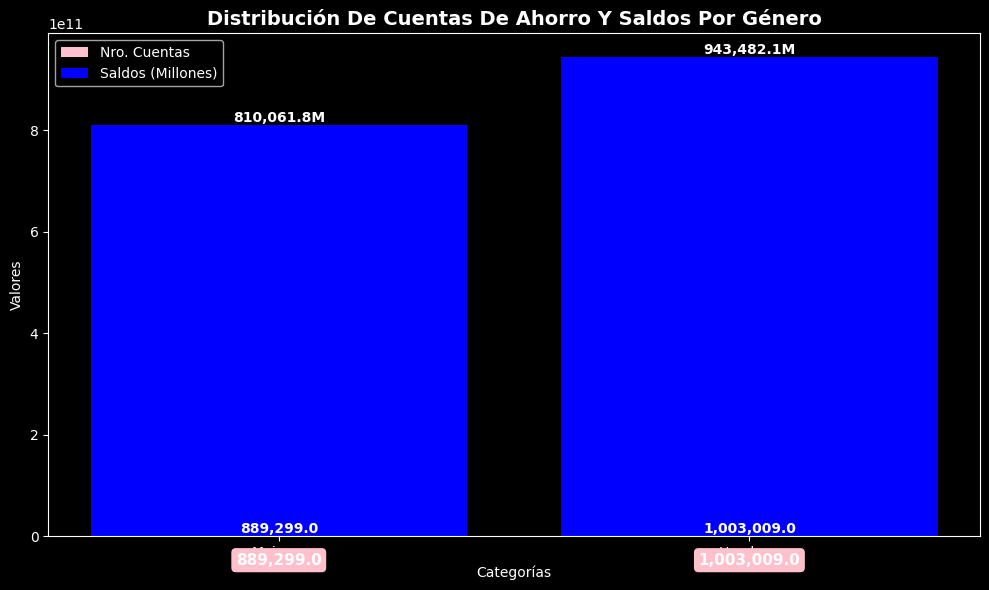


Suma total de cada columna:
_54_monto_cr_dito_vivienda: 68,305,314,697.59
_55_nro_cr_dito_vivienda: 626.00
_56_monto_cr_dito_vivienda: 99,259,293,287.35
_57_nro_cr_dito_vivienda: 1,141.00
_58_monto_cr_dito_vivienda: 167,564,607,984.94
_59_nro_microcr_dito_hasta: 609.00
_10_monto_giros_recibidos: 2,089,089,650.00
_12_monto_pagos_corresponsales: 1,729,085,400,367.48
_6_monto_dep_sitos: 2,312,002,640,572.50
_7_nro_giros_enviados: 3,047.00
_8_monto_giros_enviados: 573,761,255.00
_91_nro_pagos_corresponsales: 0.00
_92_monto_pagos_corresponsales: 0.00
_93_nro_retiros_corresponsales: 0.00
_94_monto_retiros: 0.00
_95_nro_transferencias: 0.00
_96_monto_transferencias: 0.00
_97_nro_transacciones_tr: 0.00
_98_monto_transacciones: 0.00
_27_nro_ctas_ahorro_mujeres: 889,299.00
_28_saldo_ctas_ahorro_mujeres: 810,061,758,990.07
_29_nro_ctas_ahorro_hombres: 1,003,009.00
_30_saldo_ctas_ahorro_hombres: 943,482,113,340.41


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# -------------------- DESCARGA Y LIMPIEZA DE DATOS -------------------- #
# URL de la API OData
url = "https://www.datos.gov.co/api/odata/v4/kx2f-xjdq"

try:
    # Realizar la solicitud GET a la API OData
    response = requests.get(url)
    response.raise_for_status()  # Verificar si hubo algún error en la solicitud

    # Convertir la respuesta JSON a un diccionario
    data = response.json()

    if 'value' in data:
        # Crear un DataFrame con los datos
        df_cards = pd.DataFrame(data['value'])

        # Convertir todas las columnas relevantes a numéricas
        numeric_columns = [
            '_54_monto_cr_dito_vivienda', '_55_nro_cr_dito_vivienda',
            '_56_monto_cr_dito_vivienda', '_57_nro_cr_dito_vivienda',
            '_58_monto_cr_dito_vivienda', '_59_nro_microcr_dito_hasta',
            '_10_monto_giros_recibidos', '_12_monto_pagos_corresponsales',
            '_6_monto_dep_sitos', '_7_nro_giros_enviados',
            '_8_monto_giros_enviados', '_91_nro_pagos_corresponsales',
            '_92_monto_pagos_corresponsales', '_93_nro_retiros_corresponsales',
            '_94_monto_retiros', '_95_nro_transferencias', '_96_monto_transferencias',
            '_97_nro_transacciones_tr', '_98_monto_transacciones',
            '_27_nro_ctas_ahorro_mujeres', '_28_saldo_ctas_ahorro_mujeres',
            '_29_nro_ctas_ahorro_hombres', '_30_saldo_ctas_ahorro_hombres'
        ]
        for col in numeric_columns:
            if col in df_cards.columns:
                df_cards[col] = pd.to_numeric(df_cards[col], errors='coerce').fillna(0)

        # Sumar todas las columnas numéricas
        totals = df_cards[numeric_columns].sum()

        # -------------------- SUMAR VALORES ESPECÍFICOS -------------------- #
        total_cuentas_mujeres = df_cards['_27_nro_ctas_ahorro_mujeres'].sum()
        saldo_total_mujeres = df_cards['_28_saldo_ctas_ahorro_mujeres'].sum()

        total_cuentas_hombres = df_cards['_29_nro_ctas_ahorro_hombres'].sum()
        saldo_total_hombres = df_cards['_30_saldo_ctas_ahorro_hombres'].sum()

        # -------------------- GRÁFICO PRINCIPAL -------------------- #
        fig, ax = plt.subplots(figsize=(10, 6))
        categorias = ['Mujeres', 'Hombres']
        nro_cuentas = [total_cuentas_mujeres, total_cuentas_hombres]
        saldos = [saldo_total_mujeres, saldo_total_hombres]

        # Crear barras
        bar1 = ax.bar(categorias, nro_cuentas, color='pink', label='Nro. Cuentas')
        bar2 = ax.bar(categorias, saldos, color='blue', label='Saldos (Millones)')

        # Etiquetas de valores en las barras
        for b1, b2, nro, saldo in zip(bar1, bar2, nro_cuentas, saldos):
            ax.text(b1.get_x() + b1.get_width() / 2, b1.get_height() + 20000, f"{nro:,}",
                    ha='center', va='bottom', fontweight='bold', fontsize=10)
            ax.text(b2.get_x() + b2.get_width() / 2, b2.get_height() + 20000, f"{saldo / 1e6:,.1f}M",
                    ha='center', va='bottom', fontweight='bold', fontsize=10)

        # Configuración del gráfico
        ax.set_title('Distribución De Cuentas De Ahorro Y Saldos Por Género', fontsize=14, fontweight='bold')
        ax.set_ylabel('Valores')
        ax.set_xlabel('Categorías')
        ax.legend(loc='upper left')

        # -------------------- RESALTAR DATOS DE ABAJO CON FONDO -------------------- #
        for i, (categoria, total) in enumerate(zip(categorias, nro_cuentas)):
            ax.text(i, -saldo_total_hombres * 0.05,  # Posición debajo del gráfico
                    f"{total:,}",
                    fontsize=11, fontweight='bold', ha='center', va='center',
                    bbox=dict(facecolor='pink', edgecolor='none', boxstyle='round,pad=0.3'))

        plt.tight_layout()

        # Guardar el gráfico
        plt.savefig("grafico_cuentas_saldos_resaltado.png", bbox_inches='tight')
        plt.show()

        # -------------------- MOSTRAR TOTALES DE TODAS LAS COLUMNAS -------------------- #
        print("\nSuma total de cada columna:")
        for col, total in totals.items():
            print(f"{col}: {total:,.2f}")

    else:
        print("No se encontró la clave 'value' en el archivo JSON.")

except requests.exceptions.RequestException as e:
    print(f"Error al realizar la solicitud HTTP: {e}")
except Exception as e:
    print(f"Error al procesar los datos: {e}")
    plt.savefig(os.path.join(output_folder, "nombre_del_grafico.png"))


Observaciones:
Número de cuentas de ahorro:

Los hombres tienen un mayor número de cuentas de ahorro (1,003,009) en comparación con las mujeres (889,299).
Saldos acumulados en cuentas de ahorro:

Aunque los hombres tienen más cuentas de ahorro, los saldos totales de las mujeres son también elevados (810,061.8M vs. 943,482.1M).


### ¿Cuáles son los factores que influyen en la decisión de tener o no tener productos financieros entre hombres 
y mujeres en el departamento de Antioquia? 
Análisis y conclusiones iniciales:
Total y proporciones por género: Los valores muestran las diferencias en la tenencia de productos financieros entre hombres y mujeres en los distintos renglones (áreas geográficas del departamento de Antioquia). La proporción varía significativamente entre renglones, indicando posibles brechas de inclusión financiera.

Distribución desigual: Algunos renglones tienen una distribución más equilibrada, mientras que en otros hay una mayor concentración de productos financieros en hombres. Estos datos son claves para entender los factores locales que podrían influir en estas desigualdades.

Renglones sin datos: Algunos renglones no presentan datos significativos, lo que puede ser indicativo de falta de inclusión financiera o ausencia de información en esas áreas específicas.

Posibles factores influyentes:

Accesibilidad geográfica: Renglones con menor proporción de mujeres podrían estar ubicados en zonas rurales con menos acceso a servicios financieros.
Niveles de educación y empleo: Las diferencias observadas pueden estar correlacionadas con el nivel educativo y las oportunidades de empleo entre hombres y mujeres en estas áreas.

In [2]:
df_cards

,__id,tipo_entidad,codigo_entidad,nombre_entidad,fecha_corte,unicap,descrip_uc,renglon,desc_renglon,tipo,...,_89_nro_giros_recibidos,_90_monto_giros_recibidos,_91_nro_pagos_corresponsales,_92_monto_pagos_corresponsales,_93_nro_retiros_corresponsales,_94_monto_retiros,_95_nro_transferencias,_96_monto_transferencias,_97_nro_transacciones_tr,_98_monto_transacciones
0,row-fqfd-wpsi.6sps,1,7,Bancolombia,2021-03-31T00:00:00.000,1,ANTIOQUIA,360,ITAGUI,Transacciones y tramites a traves de correspon...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,row-j7bz~qvjb_w8iu,1,39,Banco Davivienda,2021-03-31T00:00:00.000,1,ANTIOQUIA,91,BETANIA,Corresponsales fisicos,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,row-7wz6.3v87_bgxg,1,30,Banco Caja Social S.A.,2021-03-31T00:00:00.000,1,ANTIOQUIA,1,MEDELLIN,Microcredito por rango,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,row-kru8_b98n.didf,1,42,Scotiabank Colpatria S.A.,2021-03-31T00:00:00.000,1,ANTIOQUIA,154,CAUCASIA,Corresponsales fisicos,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,row-62cg_n27d~gisu,1,43,Banagrario,2021-03-31T00:00:00.000,1,ANTIOQUIA,649,SAN CARLOS,Credito de consumo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,row-rean.yhj2-wa4d,1,6,Itau,2021-03-31T00:00:00.000,1,ANTIOQUIA,789,TAMESIS,Corresponsales físicos,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,row-achc~33uh_7xpm,1,39,Banco Davivienda,2021-03-31T00:00:00.000,1,ANTIOQUIA,495,NECHI,Transacciones y tramites a traves de correspon...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,row-d8hn-m38k_pkwm,1,52,Bancamia S.A.,2021-03-31T00:00:00.000,1,ANTIOQUIA,1,MEDELLIN,Microcredito por rango,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,row-pusw~c9cg~wga6,1,56,Banco Falabella S.A.,2021-03-31T00:00:00.000,1,ANTIOQUIA,842,URAMITA,Corresponsales fisicos,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Información sobre el uso de productos financieros y cobertura
incluyendo la desagregación por género en la tenencia de los diferentes productos financieros.

La inclusión financiera se refiere al acceso que tienen las personas y 
las familias a servicios financieros como cuentas bancarias, préstamos, 
seguros y otros productos financieros. La información sobre el uso de productos financieros 
y cobertura es importante para un país porque muestra cómo La Inclusión Financiera y su Importancia

La inclusión financiera se refiere al acceso que tienen las personas y las familias 
a servicios financieros como cuentas bancarias, préstamos, seguros y otros productos financieros. 
La información sobre el uso de productos financieros y cobertura es importante para 
un país porque muestra cómo se están utilizando estos servicios y quiénes tienen acceso a ellos.

¿Por qué es importante saber esto?

Ayuda a identificar áreas de mejora en la inclusión financiera y a desarrollar políticas para abordarlas.
Permite evaluar el impacto de las políticas y programas de inclusión financiera en la población.
Facilita la comparación con otros países y la identificación de mejores prácticas.
Ayuda a promover la igualdad de género y la reducción de la pobreza.
La Desagregación por Género

La desagregación por género en la tenencia de los diferentes productos financieros 
es importante porque muestra cómo se están utilizando estos servicios de manera diferente entre 
hombres y mujeres. Esto puede ayudar a identificar áreas de mejora en la inclusión financiera 
para las mujeres y a desarrollar políticas para abordarlas.

Ejemplos de Datos

Porcentaje de hombres y mujeres que tienen cuentas bancarias.
Número de préstamos otorgados a hombres y mujeres.
Porcentaje de hombres y mujeres que tienen seguros de salud.
Número de mujeres que tienen acceso a servicios financieros en comparación con los hombres.
Conclusión

La inclusión financiera es un elemento clave para reducir la pobreza y promover la prosperidad en un país. 
La información sobre el uso de productos financieros y cobertura es importante para evaluar el impacto 
de las políticas y programas de inclusión financiera y para identificar áreas de mejora. 
La desagregación por género es fundamental para promover la igualdad de género y la reducción de la pobreza.

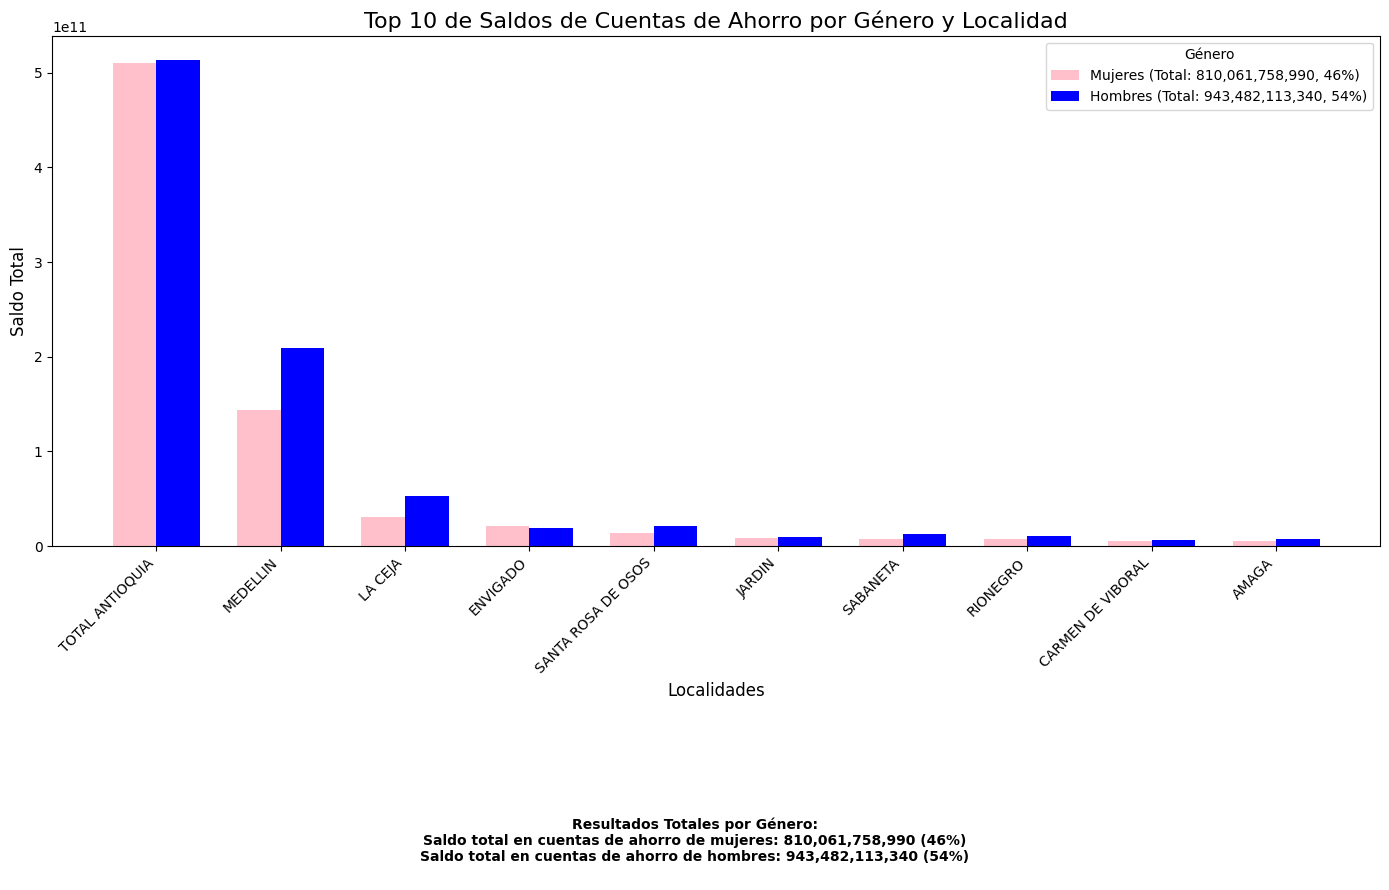

Resultados Totales por Género:
Saldo total en cuentas de ahorro de mujeres: 810,061,758,990 (46%)
Saldo total en cuentas de ahorro de hombres: 943,482,113,340 (54%)

Conclusiones basadas en los saldos totales por género y localidad:
Localidad con mayor saldo en cuentas de ahorro de mujeres: TOTAL ANTIOQUIA
Localidad con mayor saldo en cuentas de ahorro de hombres: TOTAL ANTIOQUIA


In [3]:
# -------------------- DATOS -------------------- #
# Cargar datos (suponiendo que ya los tienes en df_cards)
# Asegúrate de reemplazar esto con la carga de datos real si es necesario

# -------------------- CONFIGURAR COLUMNAS -------------------- #
cols_relevantes = ['desc_renglon', '_28_saldo_ctas_ahorro_mujeres', '_30_saldo_ctas_ahorro_hombres']

# Filtrar columnas relevantes
df_selected = df_cards[cols_relevantes].copy()

# Convertir columnas numéricas
for col in ['_28_saldo_ctas_ahorro_mujeres', '_30_saldo_ctas_ahorro_hombres']:
    df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce').fillna(0)

# Agrupar datos por localidad
grouped_df = df_selected.groupby('desc_renglon').sum()

# Calcular totales generales para hombres y mujeres
suma_mujeres = grouped_df['_28_saldo_ctas_ahorro_mujeres'].sum()
suma_hombres = grouped_df['_30_saldo_ctas_ahorro_hombres'].sum()

total_saldos = suma_mujeres + suma_hombres
porcentaje_mujeres = (suma_mujeres / total_saldos) * 100
porcentaje_hombres = (suma_hombres / total_saldos) * 100

# Obtener las 10 localidades más importantes
top_10 = grouped_df.nlargest(10, ['_28_saldo_ctas_ahorro_mujeres', '_30_saldo_ctas_ahorro_hombres'])

# -------------------- GRAFICAR -------------------- #
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.35  # Ancho de las barras

# Posición de las barras
x = np.arange(len(top_10))

# Crear barras para Mujeres y Hombres
bars_mujeres = ax.bar(x - bar_width/2, top_10['_28_saldo_ctas_ahorro_mujeres'], width=bar_width, color='pink', label='Mujeres')
bars_hombres = ax.bar(x + bar_width/2, top_10['_30_saldo_ctas_ahorro_hombres'], width=bar_width, color='blue', label='Hombres')

# Configurar título y etiquetas
ax.set_title('Top 10 de Saldos de Cuentas de Ahorro por Género y Localidad', fontsize=16)
ax.set_xlabel('Localidades', fontsize=12)
ax.set_ylabel('Saldo Total', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(top_10.index, rotation=45, ha='right')



# Leyenda ajustada
legend_labels = [
    f"Mujeres (Total: {suma_mujeres:,.0f}, {porcentaje_mujeres:.0f}%)",
    f"Hombres (Total: {suma_hombres:,.0f}, {porcentaje_hombres:.0f}%)"
]

ax.legend([bars_mujeres, bars_hombres], legend_labels, title='Género', loc='upper right', fontsize=10)

# Mostrar totales debajo del gráfico
total_text = f"\nResultados Totales por Género:\n"
total_text += f"Saldo total en cuentas de ahorro de mujeres: {suma_mujeres:,.0f} ({porcentaje_mujeres:.0f}%)\n"
total_text += f"Saldo total en cuentas de ahorro de hombres: {suma_hombres:,.0f} ({porcentaje_hombres:.0f}%)\n"

# Mostrar leyenda extendida debajo del gráfico
plt.figtext(0.5, -0.1, total_text, wrap=True, horizontalalignment='center', fontsize=10, fontweight='bold')

# Ajustar diseño para evitar sobreposición
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Mostrar gráfico
plt.show()

# -------------------- RESULTADOS -------------------- #
print("Resultados Totales por Género:")
print(f"Saldo total en cuentas de ahorro de mujeres: {suma_mujeres:,.0f} ({porcentaje_mujeres:.0f}%)")
print(f"Saldo total en cuentas de ahorro de hombres: {suma_hombres:,.0f} ({porcentaje_hombres:.0f}%)")

print("\nConclusiones basadas en los saldos totales por género y localidad:")
print(f"Localidad con mayor saldo en cuentas de ahorro de mujeres: {top_10['_28_saldo_ctas_ahorro_mujeres'].idxmax()}")
print(f"Localidad con mayor saldo en cuentas de ahorro de hombres: {top_10['_30_saldo_ctas_ahorro_hombres'].idxmax()}")

In [4]:


# -------------------- DATOS -------------------- #
# Cargar datos (suponiendo que ya los tienes en df_cards)
# Configurar columnas relevantes
cols_relevantes = ['desc_renglon', '_28_saldo_ctas_ahorro_mujeres', '_30_saldo_ctas_ahorro_hombres']
df_selected = df_cards[cols_relevantes].copy()

# Convertir columnas numéricas
for col in ['_28_saldo_ctas_ahorro_mujeres', '_30_saldo_ctas_ahorro_hombres']:
    df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce').fillna(0)

# Agrupar datos por localidad
grouped_df = df_selected.groupby('desc_renglon').sum()

# Filtrar solo la localidad de Envigado
saldo_mujeres_envigado = grouped_df.loc['ENVIGADO', '_28_saldo_ctas_ahorro_mujeres']
saldo_hombres_envigado = grouped_df.loc['ENVIGADO', '_30_saldo_ctas_ahorro_hombres']

# Calcular totales y diferencia
saldo_total_envigado = saldo_mujeres_envigado + saldo_hombres_envigado
porcentaje_mujeres = (saldo_mujeres_envigado / saldo_total_envigado) * 100
porcentaje_hombres = (saldo_hombres_envigado / saldo_total_envigado) * 100
diferencia_envigado = abs(saldo_hombres_envigado - saldo_mujeres_envigado)

# -------------------- RESULTADOS -------------------- #
print("Diferencia de saldos entre Mujeres y Hombres en Envigado:")
print(f"Saldo total de Mujeres en Envigado: {saldo_mujeres_envigado:,.0f} ({porcentaje_mujeres:.0f}%)")
print(f"Saldo total de Hombres en Envigado: {saldo_hombres_envigado:,.0f} ({porcentaje_hombres:.0f}%)")
print(f"Diferencia total: {diferencia_envigado:,.0f}")
print(f"Saldo total combinado en Envigado: {saldo_total_envigado:,.0f}")


Diferencia de saldos entre Mujeres y Hombres en Envigado:
Saldo total de Mujeres en Envigado: 21,065,642,649 (53%)
Saldo total de Hombres en Envigado: 18,483,543,262 (47%)
Diferencia total: 2,582,099,387
Saldo total combinado en Envigado: 39,549,185,910


Datos corregidos guardados en 'cards_corrected.csv' y 'cards_corrected.xlsx'.

Total _21_nro_ctas_ahorro_1smmlv: 70,228.0
Total _23_nro_ctas_ahorr_3smmlv: 25,174.0



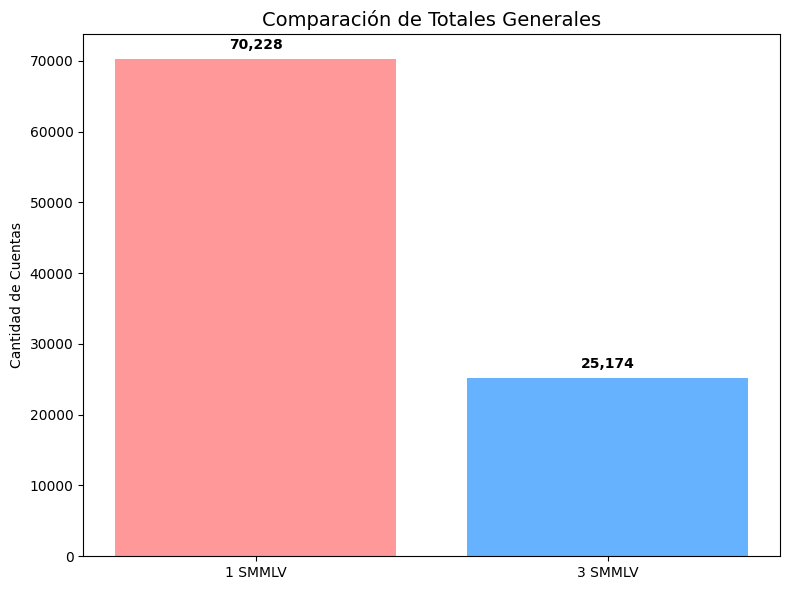

Error al procesar los datos: name 'bars1' is not defined


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os

# -------------------- DESCARGA Y LIMPIEZA DE DATOS -------------------- #
url = "https://www.datos.gov.co/api/odata/v4/kx2f-xjdq"

try:
    response = requests.get(url)
    response.raise_for_status()

    data = response.json()

    if 'value' in data:
        df_cards = pd.DataFrame(data['value'])

        # Convertir columnas numéricas a float
        numeric_columns = [
            '_54_monto_cr_dito_vivienda', '_55_nro_cr_dito_vivienda',
            '_56_monto_cr_dito_vivienda', '_57_nro_cr_dito_vivienda',
            '_58_monto_cr_dito_vivienda', '_59_nro_microcr_dito_hasta',
            '_10_monto_giros_recibidos', '_12_monto_pagos_corresponsales',
            '_6_monto_dep_sitos', '_7_nro_giros_enviados',
            '_8_monto_giros_enviados', '_91_nro_pagos_corresponsales',
            '_92_monto_pagos_corresponsales', '_93_nro_retiros_corresponsales',
            '_94_monto_retiros', '_95_nro_transferencias', '_96_monto_transferencias',
            '_97_nro_transacciones_tr', '_98_monto_transacciones',
            '_21_nro_ctas_ahorro_1smmlv', '_23_nro_ctas_ahorr_3smmlv'
        ]
        for col in numeric_columns:
            if col in df_cards.columns:
                df_cards[col] = pd.to_numeric(df_cards[col], errors='coerce').fillna(0)

        # Guardar datos corregidos
        df_cards.to_csv("cards_corrected.csv", index=False)
        df_cards.to_excel("cards_corrected.xlsx", index=False, engine='openpyxl')

        print("Datos corregidos guardados en 'cards_corrected.csv' y 'cards_corrected.xlsx'.\n")

        # -------------------- ANÁLISIS Y VISUALIZACIÓN -------------------- #
        # Crear carpeta si no existe
        save_dir = "graficos_resultados"
        os.makedirs(save_dir, exist_ok=True)

        # Filtrar columnas relevantes
        cols = ['desc_renglon', '_21_nro_ctas_ahorro_1smmlv', '_23_nro_ctas_ahorr_3smmlv']
        data_selected = df_cards[cols]

        # Agrupar por 'desc_renglon' y sumar
        grouped_data = data_selected.groupby('desc_renglon').sum()

        # Totales Generales
        total_1smmlv = grouped_data['_21_nro_ctas_ahorro_1smmlv'].sum()
        total_3smmlv = grouped_data['_23_nro_ctas_ahorr_3smmlv'].sum()

        print(f"Total _21_nro_ctas_ahorro_1smmlv: {total_1smmlv:,}")
        print(f"Total _23_nro_ctas_ahorr_3smmlv: {total_3smmlv:,}\n")

        # Top 10 más representativas
        top_10_1smmlv = grouped_data['_21_nro_ctas_ahorro_1smmlv'].nlargest(10)
        top_10_3smmlv = grouped_data['_23_nro_ctas_ahorr_3smmlv'].nlargest(10)

        # Gráfico de Totales Generales
        plt.figure(figsize=(8, 6))
        bars = plt.bar(['1 SMMLV', '3 SMMLV'], [total_1smmlv, total_3smmlv], color=['#FF9999', '#66B2FF'])
        plt.title('Comparación de Totales Generales', fontsize=14)
        plt.ylabel('Cantidad de Cuentas')

        # Anotar los valores sobre las barras
        for bar in bars:
            height = bar.get_height()
            plt.annotate(f'{int(height):,}',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 5),  # Desplazamiento hacia arriba
                         textcoords="offset points",
                         ha='center', va='bottom', fontsize=10, fontweight='bold')

        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, 'total_comparacion.png'))
        plt.show()

        
        # Añadir valores a las barras
        for bar in bars1:
            ax[0].text(bar.get_width() - bar.get_width() * 0.05, bar.get_y() + bar.get_height()/2,
                       f'{int(bar.get_width()):,}', va='center', ha='right', fontsize=10, fontweight='bold')

        

        print(f"Gráficos guardados en la carpeta '{save_dir}'.")

    else:
        print("No se encontró la clave 'value' en el archivo JSON.")

except requests.exceptions.RequestException as e:
    print(f"Error al realizar la solicitud HTTP: {e}")
except Exception as e:
    print(f"Error al procesar los datos: {e}")


Datos corregidos guardados en 'cards_corrected.csv'.



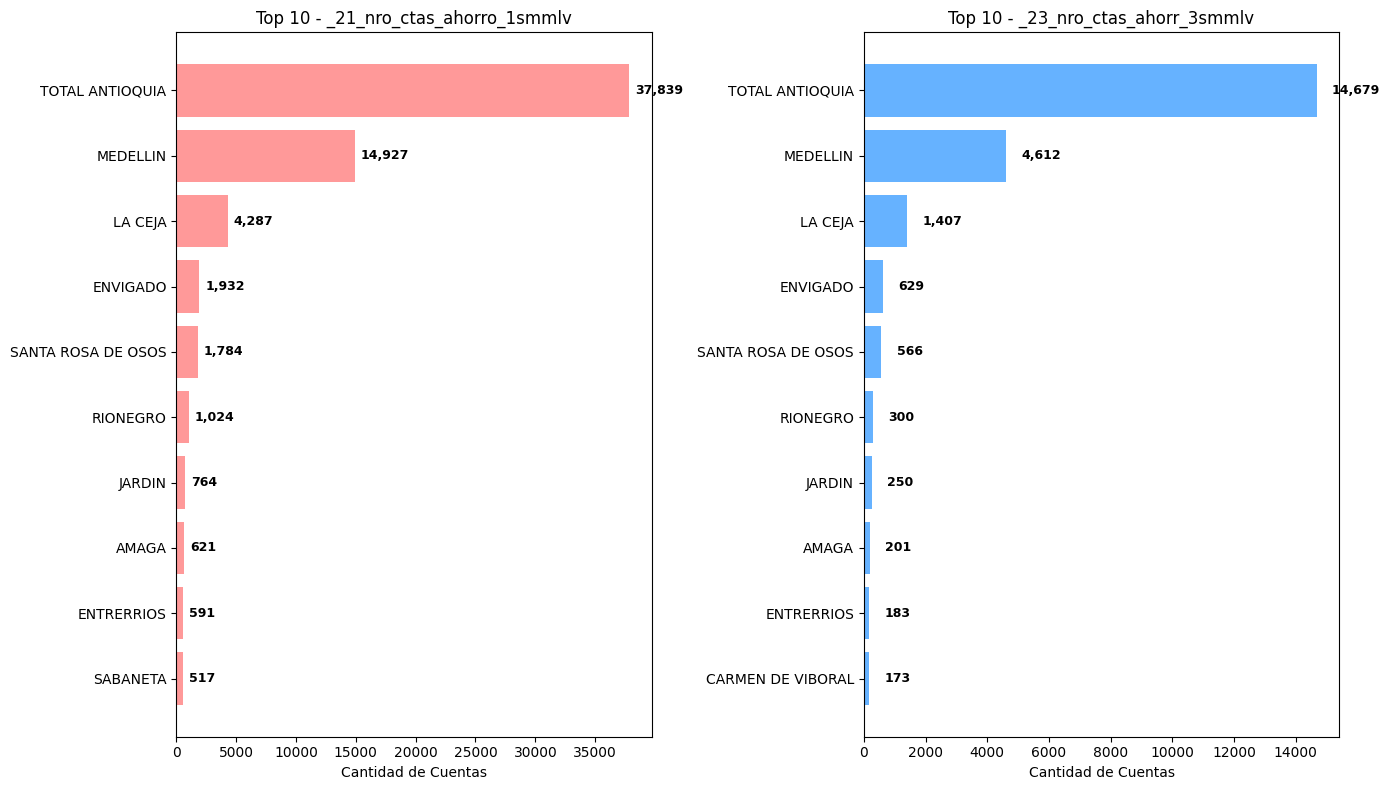


--- Leyenda de Datos ---
Top 10 _21_nro_ctas_ahorro_1smmlv:
1. TOTAL ANTIOQUIA: 37,839
2. MEDELLIN: 14,927
3. LA CEJA: 4,287
4. ENVIGADO: 1,932
5. SANTA ROSA DE OSOS: 1,784
6. RIONEGRO: 1,024
7. JARDIN: 764
8. AMAGA: 621
9. ENTRERRIOS: 591
10. SABANETA: 517

Top 10 _23_nro_ctas_ahorr_3smmlv:
1. TOTAL ANTIOQUIA: 14,679
2. MEDELLIN: 4,612
3. LA CEJA: 1,407
4. ENVIGADO: 629
5. SANTA ROSA DE OSOS: 566
6. RIONEGRO: 300
7. JARDIN: 250
8. AMAGA: 201
9. ENTRERRIOS: 183
10. CARMEN DE VIBORAL: 173


In [6]:


# -------------------- DESCARGA Y LIMPIEZA DE DATOS -------------------- #
url = "https://www.datos.gov.co/api/odata/v4/kx2f-xjdq"

try:
    response = requests.get(url)
    response.raise_for_status()

    data = response.json()

    if 'value' in data:
        df_cards = pd.DataFrame(data['value'])

        # Convertir columnas numéricas a float
        numeric_columns = [
            '_21_nro_ctas_ahorro_1smmlv', '_23_nro_ctas_ahorr_3smmlv'
        ]
        for col in numeric_columns:
            if col in df_cards.columns:
                df_cards[col] = pd.to_numeric(df_cards[col], errors='coerce').fillna(0)

        # Guardar datos corregidos
        df_cards.to_csv("cards_corrected.csv", index=False)
        print("Datos corregidos guardados en 'cards_corrected.csv'.\n")

        # -------------------- ANÁLISIS Y VISUALIZACIÓN -------------------- #
        # Crear carpeta si no existe
        save_dir = "graficos_resultados"
        os.makedirs(save_dir, exist_ok=True)

        # Filtrar columnas relevantes
        cols = ['desc_renglon', '_21_nro_ctas_ahorro_1smmlv', '_23_nro_ctas_ahorr_3smmlv']
        data_selected = df_cards[cols]

        # Agrupar por 'desc_renglon' y sumar
        grouped_data = data_selected.groupby('desc_renglon').sum()

        # Top 10 más representativas
        top_10_1smmlv = grouped_data['_21_nro_ctas_ahorro_1smmlv'].nlargest(10)
        top_10_3smmlv = grouped_data['_23_nro_ctas_ahorr_3smmlv'].nlargest(10)

        # Gráfico comparativo con ajuste dinámico de etiquetas
        fig, ax = plt.subplots(1, 2, figsize=(14, 8))

        # Gráfico 1: Top 10 - _21_nro_ctas_ahorro_1smmlv
        bars1 = ax[0].barh(top_10_1smmlv.index, top_10_1smmlv.values, color='#FF9999')
        ax[0].invert_yaxis()
        ax[0].set_title('Top 10 - _21_nro_ctas_ahorro_1smmlv')
        ax[0].set_xlabel('Cantidad de Cuentas')

        for bar in bars1:
            ax[0].text(bar.get_width() + 500, bar.get_y() + bar.get_height() / 2,
                       f'{int(bar.get_width()):,}', va='center', ha='left',
                       fontsize=9, fontweight='bold')

        # Gráfico 2: Top 10 - _23_nro_ctas_ahorr_3smmlv
        bars2 = ax[1].barh(top_10_3smmlv.index, top_10_3smmlv.values, color='#66B2FF')
        ax[1].invert_yaxis()
        ax[1].set_title('Top 10 - _23_nro_ctas_ahorr_3smmlv')
        ax[1].set_xlabel('Cantidad de Cuentas')

        for bar in bars2:
            ax[1].text(bar.get_width() + 500, bar.get_y() + bar.get_height() / 2,
                       f'{int(bar.get_width()):,}', va='center', ha='left',
                       fontsize=9, fontweight='bold')

        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, 'top_10_comparacion.png'))
        plt.show()

        # -------------------- LEYENDA DE DATOS -------------------- #
        # Crear una leyenda con valores totales
        print("\n--- Leyenda de Datos ---")
        print("Top 10 _21_nro_ctas_ahorro_1smmlv:")
        for i, (name, value) in enumerate(top_10_1smmlv.items(), 1):
            print(f"{i}. {name}: {int(value):,}")

        print("\nTop 10 _23_nro_ctas_ahorr_3smmlv:")
        for i, (name, value) in enumerate(top_10_3smmlv.items(), 1):
            print(f"{i}. {name}: {int(value):,}")

    else:
        print("No se encontró la clave 'value' en el archivo JSON.")

except requests.exceptions.RequestException as e:
    print(f"Error al realizar la solicitud HTTP: {e}")
except Exception as e:
    print(f"Error al procesar los datos: {e}")


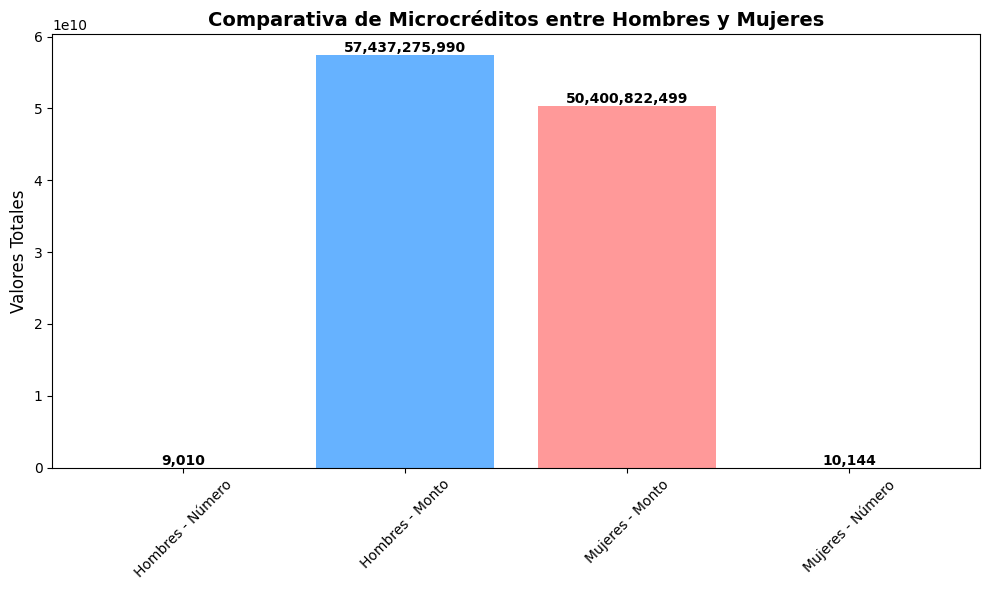

In [7]:


# -------------------- DESCARGA Y LIMPIEZA DE DATOS -------------------- #
# URL de la API OData
url = "https://www.datos.gov.co/api/odata/v4/kx2f-xjdq"

try:
    # Realizar la solicitud GET a la API OData
    response = requests.get(url)
    response.raise_for_status()  # Verificar si hubo algún error en la solicitud

    # Convertir la respuesta JSON a un diccionario
    data = response.json()

    if 'value' in data:
        # Crear un DataFrame con los datos
        df_cards = pd.DataFrame(data['value'])

        # Convertir las columnas numéricas relevantes
        numeric_columns = [
            '_73_nro_microcr_dito_hombres', '_74_monto_microcr_dito_hombres',
            '_72_monto_microcr_dito_mujeres', '_71_nro_microcr_dito_mujeres'
        ]
        
        # Convertir a tipo numérico y manejar errores
        for col in numeric_columns:
            if col in df_cards.columns:
                df_cards[col] = pd.to_numeric(df_cards[col], errors='coerce').fillna(0)

        # -------------------- GRAFICO COMPARATIVO -------------------- #
        # Crear un DataFrame con las columnas relevantes
        comparativa = pd.DataFrame({
            'Categoría': ['Hombres - Número', 'Hombres - Monto', 'Mujeres - Monto', 'Mujeres - Número'],
            'Valores': [
                df_cards['_73_nro_microcr_dito_hombres'].sum(),
                df_cards['_74_monto_microcr_dito_hombres'].sum(),
                df_cards['_72_monto_microcr_dito_mujeres'].sum(),
                df_cards['_71_nro_microcr_dito_mujeres'].sum()
            ]
        })

        # Gráfico de barras comparativo
        plt.figure(figsize=(10, 6))
        colors = ['#66B2FF', '#66B2FF', '#FF9999', '#FF9999']
        bars = plt.bar(comparativa['Categoría'], comparativa['Valores'], color=colors)

        # Añadir etiquetas de valores encima de las barras
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                     f"{int(bar.get_height()):,}", ha='center', va='bottom', fontsize=10, weight='bold')

        # Títulos y etiquetas
        plt.title("Comparativa de Microcréditos entre Hombres y Mujeres", fontsize=14, weight='bold')
        plt.ylabel("Valores Totales", fontsize=12)
        plt.xticks(rotation=45)

        # Ajustar diseño y mostrar gráfico
        plt.tight_layout()
        plt.show()

    else:
        print("La clave 'value' no se encuentra en los datos.")

except requests.exceptions.RequestException as e:
    print(f"Error al realizar la solicitud HTTP: {e}")
except Exception as e:
    print(f"Error al procesar los datos: {e}")



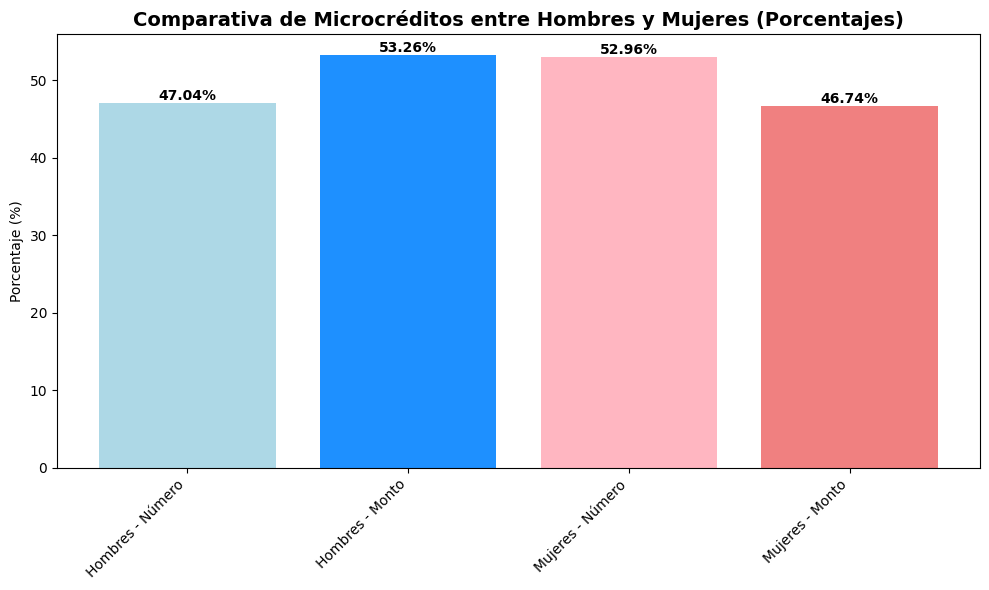

In [8]:


# -------------------- DESCARGA Y LIMPIEZA DE DATOS -------------------- #
# URL de la API OData
url = "https://www.datos.gov.co/api/odata/v4/kx2f-xjdq"

try:
    # Descargar los datos desde la API
    response = requests.get(url)
    response.raise_for_status()
    data = response.json()

    if 'value' in data:
        # Crear DataFrame con los datos
        df = pd.DataFrame(data['value'])

        # Seleccionar las columnas necesarias
        cols = [
            '_73_nro_microcr_dito_hombres', '_74_monto_microcr_dito_hombres',
            '_72_monto_microcr_dito_mujeres', '_71_nro_microcr_dito_mujeres'
        ]
        df_selected = df[cols].astype(float).fillna(0)

        # Calcular totales
        total_nro_hombres = df_selected['_73_nro_microcr_dito_hombres'].sum()
        total_monto_hombres = df_selected['_74_monto_microcr_dito_hombres'].sum()
        total_nro_mujeres = df_selected['_71_nro_microcr_dito_mujeres'].sum()
        total_monto_mujeres = df_selected['_72_monto_microcr_dito_mujeres'].sum()

        # Calcular porcentajes por separado
        total_nro = total_nro_hombres + total_nro_mujeres
        total_monto = total_monto_hombres + total_monto_mujeres

        pct_nro_hombres = (total_nro_hombres / total_nro) * 100 if total_nro else 0
        pct_nro_mujeres = (total_nro_mujeres / total_nro) * 100 if total_nro else 0
        pct_monto_hombres = (total_monto_hombres / total_monto) * 100 if total_monto else 0
        pct_monto_mujeres = (total_monto_mujeres / total_monto) * 100 if total_monto else 0

        # Crear DataFrame de resumen
        data = {
            "Categoría": ["Hombres - Número", "Hombres - Monto", "Mujeres - Número", "Mujeres - Monto"],
            "Porcentaje": [pct_nro_hombres, pct_monto_hombres, pct_nro_mujeres, pct_monto_mujeres]
        }
        df_summary = pd.DataFrame(data)

        # -------------------- GRÁFICO -------------------- #
        # Crear gráfico de barras
        plt.figure(figsize=(10, 6))
        colors = ['lightblue', 'dodgerblue', 'lightpink', 'lightcoral']
        bars = plt.bar(df_summary['Categoría'], df_summary['Porcentaje'], color=colors)

        # Añadir etiquetas con porcentajes
        for bar, pct in zip(bars, df_summary['Porcentaje']):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                     f"{pct:.2f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

        # Configurar títulos y etiquetas
        plt.title("Comparativa de Microcréditos entre Hombres y Mujeres (Porcentajes)", fontsize=14, fontweight='bold')
        plt.ylabel("Porcentaje (%)")
        plt.xticks(rotation=45, ha='right')

        # Mostrar gráfico
        plt.tight_layout()
        plt.show()

except requests.exceptions.RequestException as e:
    print(f"Error al realizar la solicitud HTTP: {e}")
except Exception as e:
    print(f"Error al procesar los datos: {e}")


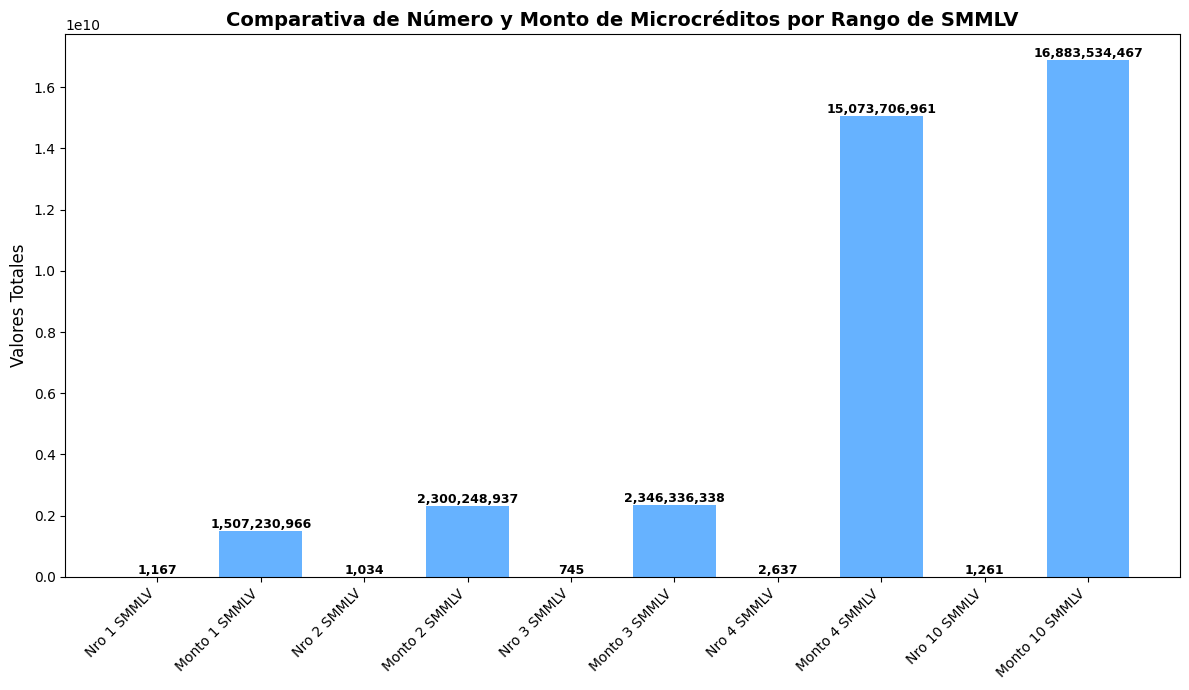

In [9]:


# -------------------- DESCARGA Y LIMPIEZA DE DATOS -------------------- #
# URL de la API OData
url = "https://www.datos.gov.co/api/odata/v4/kx2f-xjdq"

try:
    # Realizar la solicitud GET a la API OData
    response = requests.get(url)
    response.raise_for_status()  # Verificar si hubo algún error en la solicitud

    # Convertir la respuesta JSON a un diccionario
    data = response.json()

    if 'value' in data:
        # Crear un DataFrame con los datos
        df_cards = pd.DataFrame(data['value'])

        # Seleccionar las columnas relevantes
        columnas_relevantes = [
            '_61_nro_microcr_dito_1smmlv', '_62_monto_microcr_dito_1smmlv',
            '_63_nro_microcr_dito_2smmlv', '_64_monto_microcr_dito_2smmlv',
            '_65_nro_microcr_dito_3smmlv', '_66_monto_microcr_dito_3smmlv',
            '_67_nro_microcr_dito_4smmlv', '_68_monto_microcr_dito_4smmlv',
            '_69_nro_microcr_dito_10smmlv', '_70_monto_microcr_dito_10smmlv'
        ]

        # Convertir a tipo numérico (manejar errores y valores nulos)
        for col in columnas_relevantes:
            if col in df_cards.columns:
                df_cards[col] = pd.to_numeric(df_cards[col], errors='coerce').fillna(0)

        # Sumar los totales de las columnas
        comparativa = pd.DataFrame({
            'Categoría': [
                'Nro 1 SMMLV', 'Monto 1 SMMLV',
                'Nro 2 SMMLV', 'Monto 2 SMMLV',
                'Nro 3 SMMLV', 'Monto 3 SMMLV',
                'Nro 4 SMMLV', 'Monto 4 SMMLV',
                'Nro 10 SMMLV', 'Monto 10 SMMLV'
            ],
            'Valores': [
                df_cards['_61_nro_microcr_dito_1smmlv'].sum(),
                df_cards['_62_monto_microcr_dito_1smmlv'].sum(),
                df_cards['_63_nro_microcr_dito_2smmlv'].sum(),
                df_cards['_64_monto_microcr_dito_2smmlv'].sum(),
                df_cards['_65_nro_microcr_dito_3smmlv'].sum(),
                df_cards['_66_monto_microcr_dito_3smmlv'].sum(),
                df_cards['_67_nro_microcr_dito_4smmlv'].sum(),
                df_cards['_68_monto_microcr_dito_4smmlv'].sum(),
                df_cards['_69_nro_microcr_dito_10smmlv'].sum(),
                df_cards['_70_monto_microcr_dito_10smmlv'].sum()
            ]
        })

        # -------------------- GRÁFICO -------------------- #
        # Crear gráfico de barras comparativo
        plt.figure(figsize=(12, 7))
        colors = ['#FF9999', '#66B2FF'] * 5  # Alternar colores
        bars = plt.bar(comparativa['Categoría'], comparativa['Valores'], color=colors)

        # Añadir etiquetas de valores en las barras
        for bar, valor in zip(bars, comparativa['Valores']):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                     f"{int(valor):,}", ha='center', va='bottom', fontsize=9, weight='bold')

        # Títulos y etiquetas
        plt.title("Comparativa de Número y Monto de Microcréditos por Rango de SMMLV", fontsize=14, weight='bold')
        plt.ylabel("Valores Totales", fontsize=12)
        plt.xticks(rotation=45, ha='right')

        # Ajustar diseño y mostrar gráfico
        plt.tight_layout()
        plt.show()

    else:
        print("La clave 'value' no se encuentra en los datos.")

except requests.exceptions.RequestException as e:
    print(f"Error al realizar la solicitud HTTP: {e}")
except Exception as e:
    print(f"Error al procesar los datos: {e}")


C:\Users\hp\AppData\Local\Temp\ipykernel_10184\2691330634.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(grouped_data.index, valores, label=f"{tipos_transacciones[idx]} ({round(porcentajes_totales[idx])}%)",


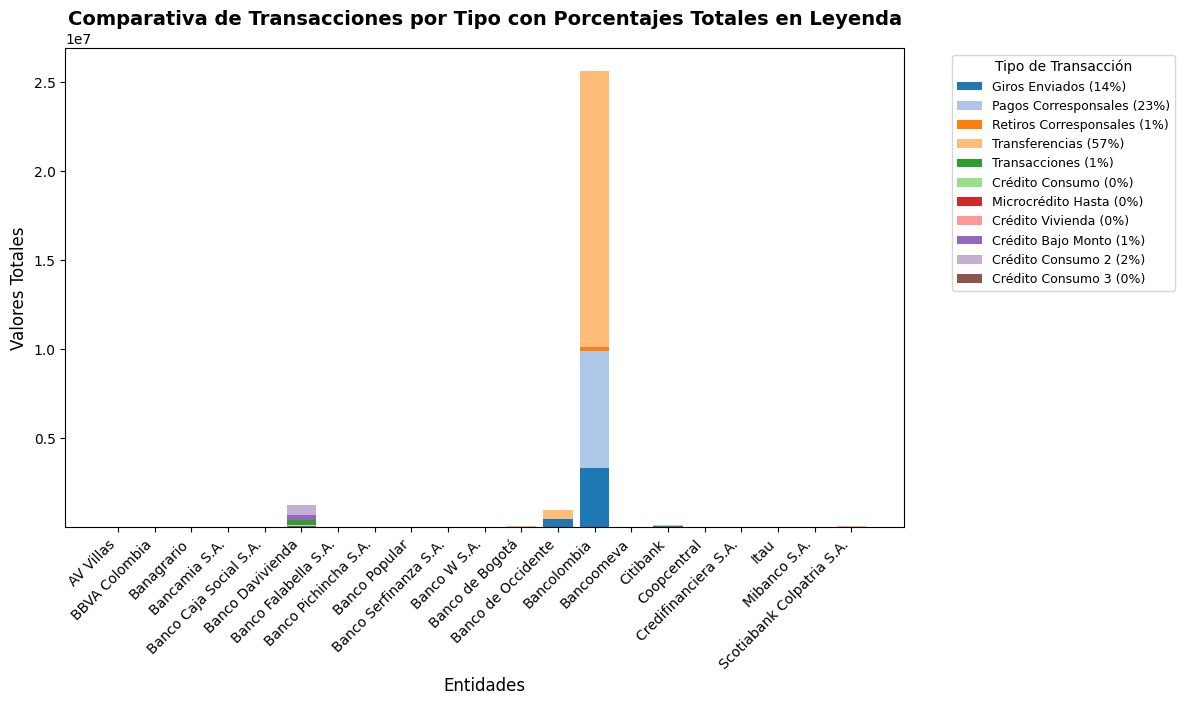

In [10]:


# -------------------- DESCARGA Y LIMPIEZA DE DATOS -------------------- #
# URL de la API OData
url = "https://www.datos.gov.co/api/odata/v4/kx2f-xjdq"

try:
    # Realizar la solicitud GET a la API OData
    response = requests.get(url)
    response.raise_for_status()

    # Convertir la respuesta JSON a un diccionario
    data = response.json()

    if 'value' in data:
        # Crear un DataFrame con los datos
        df_cards = pd.DataFrame(data['value'])

        # Renombrar columnas relevantes
        column_mapping = {
            'Suma de _7_nro_giros_enviados': '_7_nro_giros_enviados',
            'Suma de _11_nro_pagos_corresponsales': '_11_nro_pagos_corresponsales',
            'Suma de _13_nro_retiros_corresponsales': '_13_nro_retiros_corresponsales',
            'Suma de _15_nro_transferencias': '_15_nro_transferencias',
            'Suma de _17_nro_transacciones_tr': '_17_nro_transacciones_tr',
            'Suma de _43_nro_cr_dito_consumo': '_43_nro_cr_dito_consumo',
            'Suma de _59_nro_microcr_dito_hasta': '_59_nro_microcr_dito_hasta',
            'Suma de _57_nro_cr_dito_vivienda': '_57_nro_cr_dito_vivienda',
            'Suma de _49_nro_cred_cons_bajo_monto': '_49_nro_cred_cons_bajo_monto',
            'Suma de _41_nro_cr_dito_consumo': '_41_nro_cr_dito_consumo',
            'Suma de _45_nro_cr_dito_consumo': '_45_nro_cr_dito_consumo',
            'Suma de _9_nro_giros_recibidos': '_9_nro_giros_recibidos',
            'nombre_entidad': 'nombre_entidad'
        }
        df_cards.rename(columns=column_mapping, inplace=True)

        # Seleccionar las columnas necesarias
        cols = list(column_mapping.values())
        df = df_cards[cols]
        df = df.fillna(0)  # Llenar NaN con 0

        # Agrupar por entidad y sumar los valores
        grouped_data = df.groupby('nombre_entidad').sum()

        # Calcular el total general y porcentajes por tipo de transacción
        total_por_tipo = grouped_data.sum().iloc[1:]
        porcentajes_totales = (total_por_tipo / total_por_tipo.sum()) * 100

        # Configurar tipos de transacción
        tipos_transacciones = [
            'Giros Enviados', 'Pagos Corresponsales', 'Retiros Corresponsales',
            'Transferencias', 'Transacciones', 'Crédito Consumo', 'Microcrédito Hasta',
            'Crédito Vivienda', 'Crédito Bajo Monto', 'Crédito Consumo 2',
            'Crédito Consumo 3', 'Giros Recibidos'
        ]

        # Crear gráfico de barras apiladas
        fig, ax = plt.subplots(figsize=(12, 7))
        bottom = np.zeros(len(grouped_data))
        colors = plt.cm.tab20.colors

        for idx, col in enumerate(grouped_data.columns[1:]):
            valores = grouped_data[col]
            plt.bar(grouped_data.index, valores, label=f"{tipos_transacciones[idx]} ({round(porcentajes_totales[idx])}%)",
                    bottom=bottom, color=colors[idx])
            bottom += valores

        # Personalización del gráfico
        plt.title('Comparativa de Transacciones por Tipo con Porcentajes Totales en Leyenda', fontsize=14, weight='bold')
        plt.ylabel('Valores Totales', fontsize=12)
        plt.xlabel('Entidades', fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.legend(title='Tipo de Transacción', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
        plt.tight_layout()

        # Mostrar gráfico
        plt.show()

    else:
        print("No se encontró la clave 'value' en el archivo JSON.")

except requests.exceptions.RequestException as e:
    print(f"Error al realizar la solicitud HTTP: {e}")
except Exception as e:
    print(f"Error al procesar los datos: {e}")


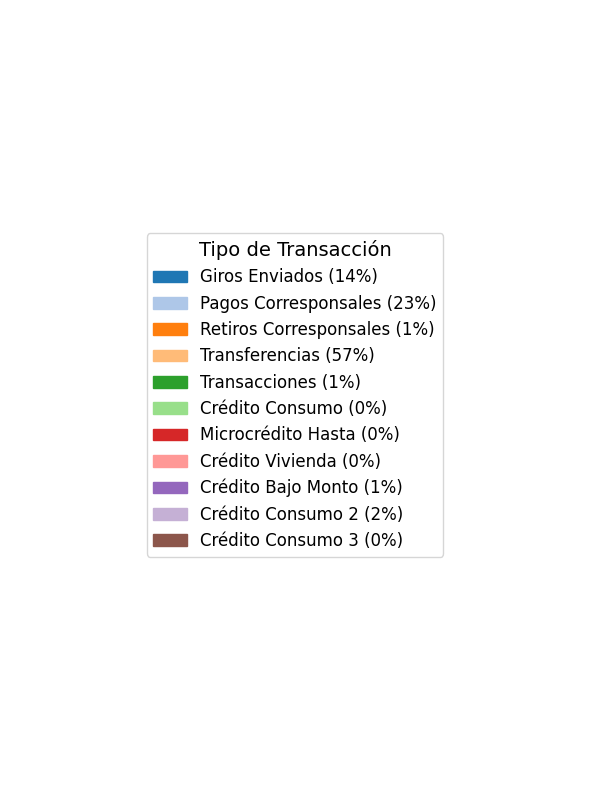

In [11]:
import matplotlib.pyplot as plt

# Tipos de Transacciones y Porcentajes
transacciones = [
    "Giros Enviados (14%)",
    "Pagos Corresponsales (23%)",
    "Retiros Corresponsales (1%)",
    "Transferencias (57%)",
    "Transacciones (1%)",
    "Crédito Consumo (0%)",
    "Microcrédito Hasta (0%)",
    "Crédito Vivienda (0%)",
    "Crédito Bajo Monto (1%)",
    "Crédito Consumo 2 (2%)",
    "Crédito Consumo 3 (0%)"
]

# Colores asignados (usando tab20 de Matplotlib)
colores = [
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78',
    '#2ca02c', '#98df8a', '#d62728', '#ff9896',
    '#9467bd', '#c5b0d5', '#8c564b'
]

# Crear figura para solo la leyenda
fig, ax = plt.subplots(figsize=(6, 8))  # Ajustar el tamaño para ser más grande
fig.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=colores[i]) for i in range(len(transacciones))],
    labels=transacciones,
    title="Tipo de Transacción",
    loc="center",
    fontsize=12,
    title_fontsize=14
)

# Ocultar los ejes
ax.axis('off')

# Guardar la imagen más grande
plt.tight_layout()
plt.savefig("leyenda_ampliada.png", dpi=300, bbox_inches='tight')
plt.show()


In [12]:
# URL de la API OData
url = "https://www.datos.gov.co/api/odata/v4/kx2f-xjdq"

try:
    # Realizar la solicitud GET a la API OData
    response = requests.get(url)
    response.raise_for_status()  # Verificar si hubo algún error en la solicitud

    # Convertir la respuesta JSON a un diccionario
    data = response.json()

    # Verificar si la clave 'value' está presente en el JSON
    if 'value' in data:
        # Crear un DataFrame con los datos
        df_cards = pd.DataFrame(data['value'])

        # Verificar columnas que deberían ser numéricas
        numeric_columns = [
            '_54_monto_cr_dito_vivienda', '_55_nro_cr_dito_vivienda',
            '_56_monto_cr_dito_vivienda', '_57_nro_cr_dito_vivienda',
            '_58_monto_cr_dito_vivienda', '_59_nro_microcr_dito_hasta',
            '_10_monto_giros_recibidos', '_12_monto_pagos_corresponsales',
            '_6_monto_dep_sitos', '_7_nro_giros_enviados',
            '_8_monto_giros_enviados', '_91_nro_pagos_corresponsales',
            '_92_monto_pagos_corresponsales', '_93_nro_retiros_corresponsales',
            '_94_monto_retiros', '_95_nro_transferencias', '_96_monto_transferencias',
            '_97_nro_transacciones_tr', '_98_monto_transacciones'
        ]

        # Convertir las columnas numéricas (que existan en el DataFrame) a float
        for col in numeric_columns:
            if col in df_cards.columns:
                df_cards[col] = pd.to_numeric(df_cards[col], errors='coerce').fillna(0)

        # Sumar todas las columnas numéricas y guardar resultados
        totals = df_cards[numeric_columns].sum()

        # Imprimir la suma total de cada columna
        print("Suma total de cada columna:")
        for col, total in totals.items():
            print(f"{col}: {total}")

        # Guardar el DataFrame corregido en un archivo Excel y CSV
        df_cards.to_csv("cards_corrected.csv", index=False)
        df_cards.to_excel("cards_corrected.xlsx", index=False, engine='openpyxl')

        print("\nDatos corregidos guardados en 'cards_corrected.csv' y 'cards_corrected.xlsx'.")
    else:
        print("No se encontró la clave 'value' en el archivo JSON.")

except requests.exceptions.RequestException as e:
    print(f"Error al realizar la solicitud HTTP: {e}")
except Exception as e:
    print(f"Error al procesar los datos: {e}")

Suma total de cada columna:
_54_monto_cr_dito_vivienda: 68305314697.59
_55_nro_cr_dito_vivienda: 626.0
_56_monto_cr_dito_vivienda: 99259293287.35
_57_nro_cr_dito_vivienda: 1141.0
_58_monto_cr_dito_vivienda: 167564607984.94
_59_nro_microcr_dito_hasta: 609.0
_10_monto_giros_recibidos: 2089089650.0
_12_monto_pagos_corresponsales: 1729085400367.48
_6_monto_dep_sitos: 2312002640572.5
_7_nro_giros_enviados: 3047.0
_8_monto_giros_enviados: 573761255.0
_91_nro_pagos_corresponsales: 0.0
_92_monto_pagos_corresponsales: 0.0
_93_nro_retiros_corresponsales: 0.0
_94_monto_retiros: 0.0
_95_nro_transferencias: 0.0
_96_monto_transferencias: 0.0
_97_nro_transacciones_tr: 0.0
_98_monto_transacciones: 0.0

Datos corregidos guardados en 'cards_corrected.csv' y 'cards_corrected.xlsx'.


In [13]:
# Identificar las columnas numéricas automáticamente
numeric_columns = df_cards.select_dtypes(include=['number']).columns

# Sumar cada columna numérica
totals = df_cards[numeric_columns].sum()

# Imprimir los totales para cada columna
print("Suma total de cada columna numérica:")
for col, total in totals.items():
    print(f"{col}: {total}")

# Opcional: Exportar los totales a un archivo Excel o CSV
totals_df = totals.reset_index()
totals_df.columns = ['Columna', 'Total']
totals_df.to_excel("column_totals.xlsx", index=False, engine='openpyxl')
print("\nTotales guardados en 'column_totals.xlsx'.")

Suma total de cada columna numérica:
tipo_entidad: 1000.0
codigo_entidad: 30738.0
unicap: 1000.0
renglon: 419102.0
_1_nro_corresponsales_f_sicos: 682.0
_2_nro_corresponsales_f_sicos: 6922.0
_3_nro_corresponsales_f_sicos: 6272.0
_4_nro_corresponsales_f_sicos: 7604.0
_5_nro_dep_sitos: 5325869.0
_6_monto_dep_sitos: 2312002640572.5
_7_nro_giros_enviados: 3047.0
_8_monto_giros_enviados: 573761255.0
_9_nro_giros_recibidos: 5559.0
_10_monto_giros_recibidos: 2089089650.0
_11_nro_pagos_corresponsales: 4004785.0
_12_monto_pagos_corresponsales: 1729085400367.48
_13_nro_retiros_corresponsales: 6633143.0
_14_monto_retiros: 2488776303830.0
_15_nro_transferencias: 245811.0
_16_monto_transferencias: 134534804756.0
_17_nro_transacciones_tr: 16218214.0
_18_monto_transacciones: 6667062000430.9795
_19_nro_ctas_ahorro_hasta: 1561525.0
_20_saldo_ctas_ahorro_hasta: 95664144627.69
_21_nro_ctas_ahorro_1smmlv: 70228.0
_22_saldo_ctas_ahorro_1smmlv: 117816968267.33
_23_nro_ctas_ahorr_3smmlv: 25174.0
_24_saldo_cta

In [14]:
print("\nValores nulos por columna:")
print(df_cards.isnull().sum())


Valores nulos por columna:
__id                        0
tipo_entidad                0
codigo_entidad              0
nombre_entidad              0
fecha_corte                 0
                           ..
_94_monto_retiros           0
_95_nro_transferencias      0
_96_monto_transferencias    0
_97_nro_transacciones_tr    0
_98_monto_transacciones     0
Length: 100, dtype: int64


In [15]:
print("\nNúmero de filas duplicadas:")
print(df_cards.duplicated().sum())

# Eliminar duplicados
df_cards = df_cards.drop_duplicates()


Número de filas duplicadas:
0


In [16]:
#Convertir fechas:
df_cards['fecha_corte'] = pd.to_datetime(df_cards['fecha_corte'], errors='coerce')

In [17]:
df_cards.rename(columns={"_1_nro_corresponsales_f_sicos": "nro_corresponsales_fisicos"}, inplace=True)

In [18]:
# Asegúra que no haya espacios adicionales en los nombres de las columnas
df_cards.columns = df_cards.columns.str.strip()

# Verifica que las columnas existen en el DataFrame
print("Columnas disponibles:", df_cards.columns)



Columnas disponibles: Index(['__id', 'tipo_entidad', 'codigo_entidad', 'nombre_entidad',
       'fecha_corte', 'unicap', 'descrip_uc', 'renglon', 'desc_renglon',
       'tipo', 'nro_corresponsales_fisicos', '_2_nro_corresponsales_f_sicos',
       '_3_nro_corresponsales_f_sicos', '_4_nro_corresponsales_f_sicos',
       '_5_nro_dep_sitos', '_6_monto_dep_sitos', '_7_nro_giros_enviados',
       '_8_monto_giros_enviados', '_9_nro_giros_recibidos',
       '_10_monto_giros_recibidos', '_11_nro_pagos_corresponsales',
       '_12_monto_pagos_corresponsales', '_13_nro_retiros_corresponsales',
       '_14_monto_retiros', '_15_nro_transferencias',
       '_16_monto_transferencias', '_17_nro_transacciones_tr',
       '_18_monto_transacciones', '_19_nro_ctas_ahorro_hasta',
       '_20_saldo_ctas_ahorro_hasta', '_21_nro_ctas_ahorro_1smmlv',
       '_22_saldo_ctas_ahorro_1smmlv', '_23_nro_ctas_ahorr_3smmlv',
       '_24_saldo_ctas_ahorr_3smmlv', '_25_nro_ctas_ahorro_activas',
       '_26_saldo_ctas_ah

In [19]:
import matplotlib.pyplot as plt

# Configuración del estilo del gráfico
plt.style.use('dark_background')

In [20]:
df_cards

,__id,tipo_entidad,codigo_entidad,nombre_entidad,fecha_corte,unicap,descrip_uc,renglon,desc_renglon,tipo,...,_89_nro_giros_recibidos,_90_monto_giros_recibidos,_91_nro_pagos_corresponsales,_92_monto_pagos_corresponsales,_93_nro_retiros_corresponsales,_94_monto_retiros,_95_nro_transferencias,_96_monto_transferencias,_97_nro_transacciones_tr,_98_monto_transacciones
0,row-fqfd-wpsi.6sps,1,7,Bancolombia,2021-03-31,1,ANTIOQUIA,360,ITAGUI,Transacciones y tramites a traves de correspon...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,row-j7bz~qvjb_w8iu,1,39,Banco Davivienda,2021-03-31,1,ANTIOQUIA,91,BETANIA,Corresponsales fisicos,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,row-7wz6.3v87_bgxg,1,30,Banco Caja Social S.A.,2021-03-31,1,ANTIOQUIA,1,MEDELLIN,Microcredito por rango,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,row-kru8_b98n.didf,1,42,Scotiabank Colpatria S.A.,2021-03-31,1,ANTIOQUIA,154,CAUCASIA,Corresponsales fisicos,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,row-62cg_n27d~gisu,1,43,Banagrario,2021-03-31,1,ANTIOQUIA,649,SAN CARLOS,Credito de consumo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,row-rean.yhj2-wa4d,1,6,Itau,2021-03-31,1,ANTIOQUIA,789,TAMESIS,Corresponsales físicos,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,row-achc~33uh_7xpm,1,39,Banco Davivienda,2021-03-31,1,ANTIOQUIA,495,NECHI,Transacciones y tramites a traves de correspon...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,row-d8hn-m38k_pkwm,1,52,Bancamia S.A.,2021-03-31,1,ANTIOQUIA,1,MEDELLIN,Microcredito por rango,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,row-pusw~c9cg~wga6,1,56,Banco Falabella S.A.,2021-03-31,1,ANTIOQUIA,842,URAMITA,Corresponsales fisicos,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:


# Lista de columnas a analizar
columns_to_analyze = [
    '_90_monto_giros_recibidos', '_91_nro_pagos_corresponsales', 
    '_92_monto_pagos_corresponsales', '_93_nro_retiros_corresponsales', 
    '_94_monto_retiros', '_95_nro_transferencias', '_96_monto_transferencias', 
    '_97_nro_transacciones_tr', '_98_monto_transacciones'
]

# Asegurar que 'fecha_corte' y 'nombre_entidad' existen
if 'fecha_corte' not in df_cards.columns or 'nombre_entidad' not in df_cards.columns:
    raise KeyError("Las columnas 'fecha_corte' o 'nombre_entidad' no existen en el DataFrame.")

# Convertir 'fecha_corte' a tipo datetime
if not pd.api.types.is_datetime64_any_dtype(df_cards['fecha_corte']):
    df_cards['fecha_corte'] = pd.to_datetime(df_cards['fecha_corte'], errors='coerce')

# Validar existencia de columnas
existing_columns = [col for col in columns_to_analyze if col in df_cards.columns]
if not existing_columns:
    raise KeyError("Ninguna de las columnas especificadas existe en el DataFrame.")

# Verificar si las columnas tienen datos útiles
print("Resumen de las columnas seleccionadas:")
for col in existing_columns:
    print(f"{col}: Valores únicos = {df_cards[col].nunique()}, Total no ceros = {(df_cards[col] != 0).sum()}")

# Inspeccionar estadísticas de las columnas
print("\nEstadísticas de las columnas seleccionadas:")
print(df_cards[existing_columns].describe())

# Filtrar valores diferentes de cero
filtered_df = df_cards[(df_cards[existing_columns] != 0).any(axis=1)]

if filtered_df.empty:
    print("No hay datos válidos en las columnas seleccionadas. Verifica el origen de los datos.")
else:
    # Agrupar por fecha_corte y nombre_entidad, y calcular la sumatoria
    df_res_totales_entidad = (
        filtered_df.groupby(['fecha_corte', 'nombre_entidad'])[existing_columns]
        .sum()
        .reset_index()
    )

    # Mostrar el DataFrame resultante
    print("Resultados Totales por Entidad y Fecha:")
    print(df_res_totales_entidad)


Resumen de las columnas seleccionadas:
_90_monto_giros_recibidos: Valores únicos = 1, Total no ceros = 0
_91_nro_pagos_corresponsales: Valores únicos = 1, Total no ceros = 0
_92_monto_pagos_corresponsales: Valores únicos = 1, Total no ceros = 0
_93_nro_retiros_corresponsales: Valores únicos = 1, Total no ceros = 0
_94_monto_retiros: Valores únicos = 1, Total no ceros = 0
_95_nro_transferencias: Valores únicos = 1, Total no ceros = 0
_96_monto_transferencias: Valores únicos = 1, Total no ceros = 0
_97_nro_transacciones_tr: Valores únicos = 1, Total no ceros = 0
_98_monto_transacciones: Valores únicos = 1, Total no ceros = 0

Estadísticas de las columnas seleccionadas:
       _90_monto_giros_recibidos  _91_nro_pagos_corresponsales  \
count                     1000.0                        1000.0   
mean                         0.0                           0.0   
std                          0.0                           0.0   
min                          0.0                           0

In [22]:
print(df_cards.describe())

       tipo_entidad  codigo_entidad          fecha_corte  unicap      renglon  \
count        1000.0     1000.000000                 1000  1000.0  1000.000000   
mean            1.0       30.738000  2021-03-31 00:00:00     1.0   419.102000   
min             1.0        1.000000  2021-03-31 00:00:00     1.0     1.000000   
25%             1.0        9.000000  2021-03-31 00:00:00     1.0   148.000000   
50%             1.0       39.000000  2021-03-31 00:00:00     1.0   368.000000   
75%             1.0       49.000000  2021-03-31 00:00:00     1.0   660.000000   
max             1.0       63.000000  2021-03-31 00:00:00     1.0   999.000000   
std             0.0       20.059854                  NaN     0.0   288.565396   

       nro_corresponsales_fisicos  _2_nro_corresponsales_f_sicos  \
count                 1000.000000                      1000.0000   
mean                     0.682000                         6.9220   
min                      0.000000                         0.0000  

In [23]:
columns_to_check = [
    '_90_monto_giros_recibidos', '_91_nro_pagos_corresponsales',
    '_92_monto_pagos_corresponsales', '_93_nro_retiros_corresponsales',
    '_94_monto_retiros', '_95_nro_transferencias', '_96_monto_transferencias',
    '_97_nro_transacciones_tr', '_98_monto_transacciones'
]

for col in columns_to_check:
    if col in df_cards.columns:
        total_zeros = (df_cards[col] == 0).sum()
        print(f"Columna: {col}, Total de ceros: {total_zeros}, Total de valores: {len(df_cards[col])}")
    else:
        print(f"Columna: {col} no encontrada en el DataFrame.")

Columna: _90_monto_giros_recibidos, Total de ceros: 1000, Total de valores: 1000
Columna: _91_nro_pagos_corresponsales, Total de ceros: 1000, Total de valores: 1000
Columna: _92_monto_pagos_corresponsales, Total de ceros: 1000, Total de valores: 1000
Columna: _93_nro_retiros_corresponsales, Total de ceros: 1000, Total de valores: 1000
Columna: _94_monto_retiros, Total de ceros: 1000, Total de valores: 1000
Columna: _95_nro_transferencias, Total de ceros: 1000, Total de valores: 1000
Columna: _96_monto_transferencias, Total de ceros: 1000, Total de valores: 1000
Columna: _97_nro_transacciones_tr, Total de ceros: 1000, Total de valores: 1000
Columna: _98_monto_transacciones, Total de ceros: 1000, Total de valores: 1000


In [24]:
filtered_df = df_cards[(df_cards[columns_to_check] != 0).any(axis=1)]
print(filtered_df)

Empty DataFrame
Columns: [__id, tipo_entidad, codigo_entidad, nombre_entidad, fecha_corte, unicap, descrip_uc, renglon, desc_renglon, tipo, nro_corresponsales_fisicos, _2_nro_corresponsales_f_sicos, _3_nro_corresponsales_f_sicos, _4_nro_corresponsales_f_sicos, _5_nro_dep_sitos, _6_monto_dep_sitos, _7_nro_giros_enviados, _8_monto_giros_enviados, _9_nro_giros_recibidos, _10_monto_giros_recibidos, _11_nro_pagos_corresponsales, _12_monto_pagos_corresponsales, _13_nro_retiros_corresponsales, _14_monto_retiros, _15_nro_transferencias, _16_monto_transferencias, _17_nro_transacciones_tr, _18_monto_transacciones, _19_nro_ctas_ahorro_hasta, _20_saldo_ctas_ahorro_hasta, _21_nro_ctas_ahorro_1smmlv, _22_saldo_ctas_ahorro_1smmlv, _23_nro_ctas_ahorr_3smmlv, _24_saldo_ctas_ahorr_3smmlv, _25_nro_ctas_ahorro_activas, _26_saldo_ctas_ahorro_activas, _27_nro_ctas_ahorro_mujeres, _28_saldo_ctas_ahorro_mujeres, _29_nro_ctas_ahorro_hombres, _30_saldo_ctas_ahorro_hombres, _31_nro_ctas_ahorro, _32_saldo_ctas_ah

In [25]:
print(df_cards.head(20))  # Muestra las primeras 20 filas

                  __id  tipo_entidad  codigo_entidad  \
0   row-fqfd-wpsi.6sps             1               7   
1   row-j7bz~qvjb_w8iu             1              39   
2   row-7wz6.3v87_bgxg             1              30   
3   row-kru8_b98n.didf             1              42   
4   row-62cg_n27d~gisu             1              43   
5   row-rp7y~xsca_dvgf             1               9   
6   row-fgb3~d7ki.vbjb             1              13   
7   row-nm6s.ywxj.n4h9             1               7   
8   row-4ar7_48tm~s5jz             1              54   
9   row-9b8m~xs7u-bdyg             1              57   
10  row-xbch~ghns.vd7i             1              52   
11  row-j75v_dgq5.3txj             1              30   
12  row-nsgp_ibtc~p45k             1              52   
13  row-7ery~3wqb~ab5a             1               7   
14  row-6tab~hxxm.zpbf             1              43   
15  row-in3s~778h~z7n6             1              56   
16  row-cx2u-mavi~hfrq             1            

In [26]:
print(df_cards.isnull().sum())  # Cantidad de valores nulos por columna
print((df_cards == 0).all())   # Verifica si todas las filas de cada columna son cero

__id                        0
tipo_entidad                0
codigo_entidad              0
nombre_entidad              0
fecha_corte                 0
                           ..
_94_monto_retiros           0
_95_nro_transferencias      0
_96_monto_transferencias    0
_97_nro_transacciones_tr    0
_98_monto_transacciones     0
Length: 100, dtype: int64
__id                        False
tipo_entidad                False
codigo_entidad              False
nombre_entidad              False
fecha_corte                 False
                            ...  
_94_monto_retiros            True
_95_nro_transferencias       True
_96_monto_transferencias     True
_97_nro_transacciones_tr     True
_98_monto_transacciones      True
Length: 100, dtype: bool


In [27]:
!pip install openpyxl

In [28]:
pip install --force-reinstall openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
  Attempting uninstall: et-xmlfile
    Found existing installation: et_xmlfile 2.0.0
    Uninstalling et_xmlfile-2.0.0:
      Successfully uninstalled et_xmlfile-2.0.0
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.1.5
    Uninstalling openpyxl-3.1.5:
      Successfully uninstalled openpyxl-3.1.5
Note: you may need to restart the kernel to use updated packages.


In [29]:
import sys
print(sys.executable)

c:\Users\hp\AppData\Local\Programs\Python\Python312\python.exe


C:\Users\hp\AppData\Local\Temp\ipykernel_10184\902393353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


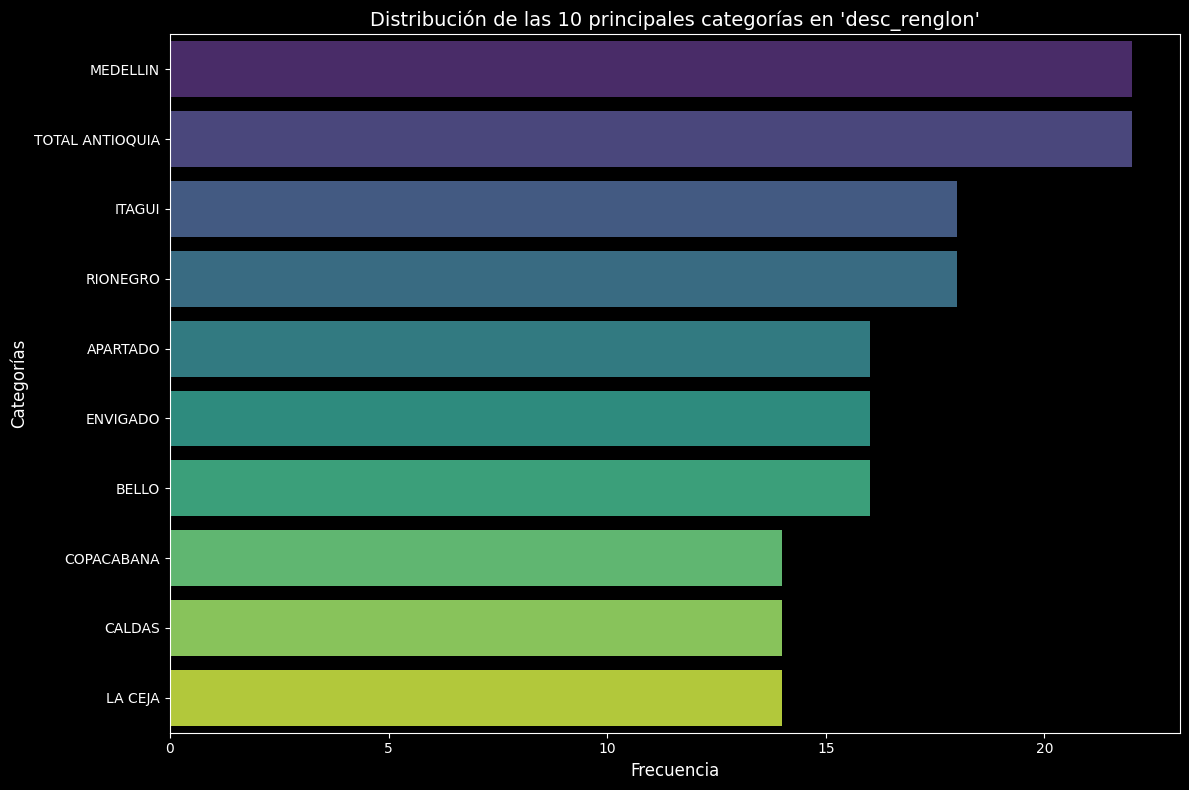

Resultados del Gráfico:
         Categoría  Frecuencia
0         MEDELLIN          22
1  TOTAL ANTIOQUIA          22
2           ITAGUI          18
3         RIONEGRO          18
4         APARTADO          16
5         ENVIGADO          16
6            BELLO          16
7       COPACABANA          14
8           CALDAS          14
9          LA CEJA          14


In [30]:



# Seleccionar las 10 categorías más frecuentes
top_categories = df_cards['desc_renglon'].value_counts().nlargest(10)

# Crear un DataFrame con solo las categorías más frecuentes
df_top_categories = df_cards[df_cards['desc_renglon'].isin(top_categories.index)]

# Crear el gráfico de las 10 categorías más frecuentes
plt.figure(figsize=(12, 8))
ax = sns.countplot(
    y='desc_renglon',
    data=df_top_categories,
    order=top_categories.index,
    palette="viridis",
    hue=None,  # Especificar explícitamente que no se usará `hue`
    legend=False  # No mostrar leyenda para evitar conflicto con `palette`
)

# Agregar etiquetas a las barras
for i, count in enumerate(top_categories.values):
    ax.text(
        count + 0.5,  # Posición en el eje x (justo después de la barra)
        i,            # Posición en el eje y (índice de la barra)
        f"{count}",   # Texto a mostrar (conteo)
        va='center',  # Alineación vertical
        fontsize=10,  # Tamaño de fuente
        color='black' # Color del texto
    )

# Personalizar el gráfico
plt.title("Distribución de las 10 principales categorías en 'desc_renglon'", fontsize=14)
plt.xlabel("Frecuencia", fontsize=12)
plt.ylabel("Categorías", fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Generar un DataFrame con los resultados
result_df = top_categories.reset_index()
result_df.columns = ['Categoría', 'Frecuencia']

# Mostrar el DataFrame debajo del gráfico
print("Resultados del Gráfico:")
print(result_df)


C:\Users\hp\AppData\Local\Temp\ipykernel_10184\111109296.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


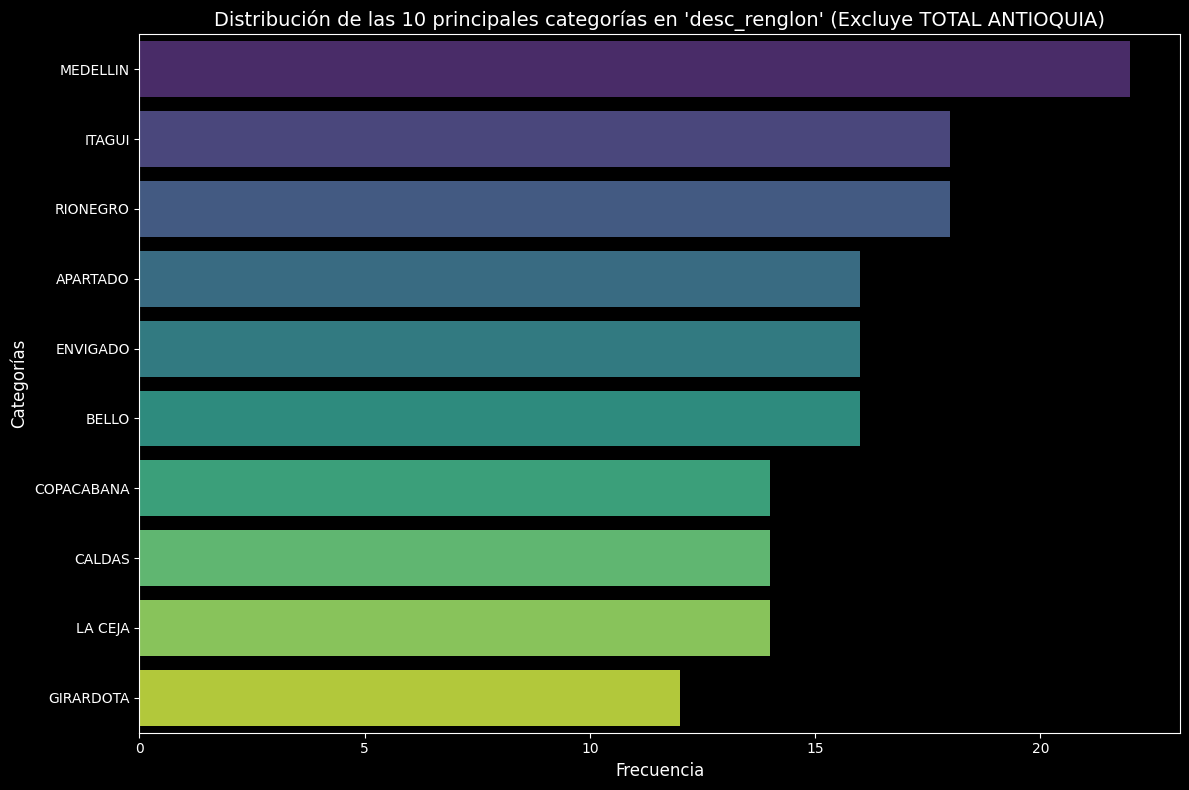

Resultados del Gráfico (sin TOTAL ANTIOQUIA):
    Categoría  Frecuencia
0    MEDELLIN          22
1      ITAGUI          18
2    RIONEGRO          18
3    APARTADO          16
4    ENVIGADO          16
5       BELLO          16
6  COPACABANA          14
7      CALDAS          14
8     LA CEJA          14
9   GIRARDOTA          12


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Excluir "TOTAL ANTIOQUIA" y seleccionar las 10 categorías más frecuentes
top_categories = (
    df_cards[df_cards['desc_renglon'] != 'TOTAL ANTIOQUIA']['desc_renglon']
    .value_counts()
    .nlargest(10)
)

# Crear un DataFrame con solo las categorías más frecuentes
df_top_categories = df_cards[df_cards['desc_renglon'].isin(top_categories.index)]

# Crear el gráfico de las 10 categorías más frecuentes
plt.figure(figsize=(12, 8))
ax = sns.countplot(
    y='desc_renglon',
    data=df_top_categories,
    order=top_categories.index,
    palette="viridis",
    hue=None,  # No usar 'hue'
    legend=False  # No mostrar leyenda
)

# Agregar etiquetas a las barras
for i, count in enumerate(top_categories.values):
    ax.text(
        count + 0.5,  # Posición en el eje x (después de la barra)
        i,            # Posición en el eje y (índice de la barra)
        f"{count}",   # Texto (conteo)
        va='center',  # Alineación vertical
        fontsize=10,
        color='black'
    )

# Personalizar el gráfico
plt.title("Distribución de las 10 principales categorías en 'desc_renglon' (Excluye TOTAL ANTIOQUIA)", fontsize=14)
plt.xlabel("Frecuencia", fontsize=12)
plt.ylabel("Categorías", fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Generar un DataFrame con los resultados
result_df = top_categories.reset_index()
result_df.columns = ['Categoría', 'Frecuencia']

# Mostrar el DataFrame debajo del gráfico
print("Resultados del Gráfico (sin TOTAL ANTIOQUIA):")
print(result_df)


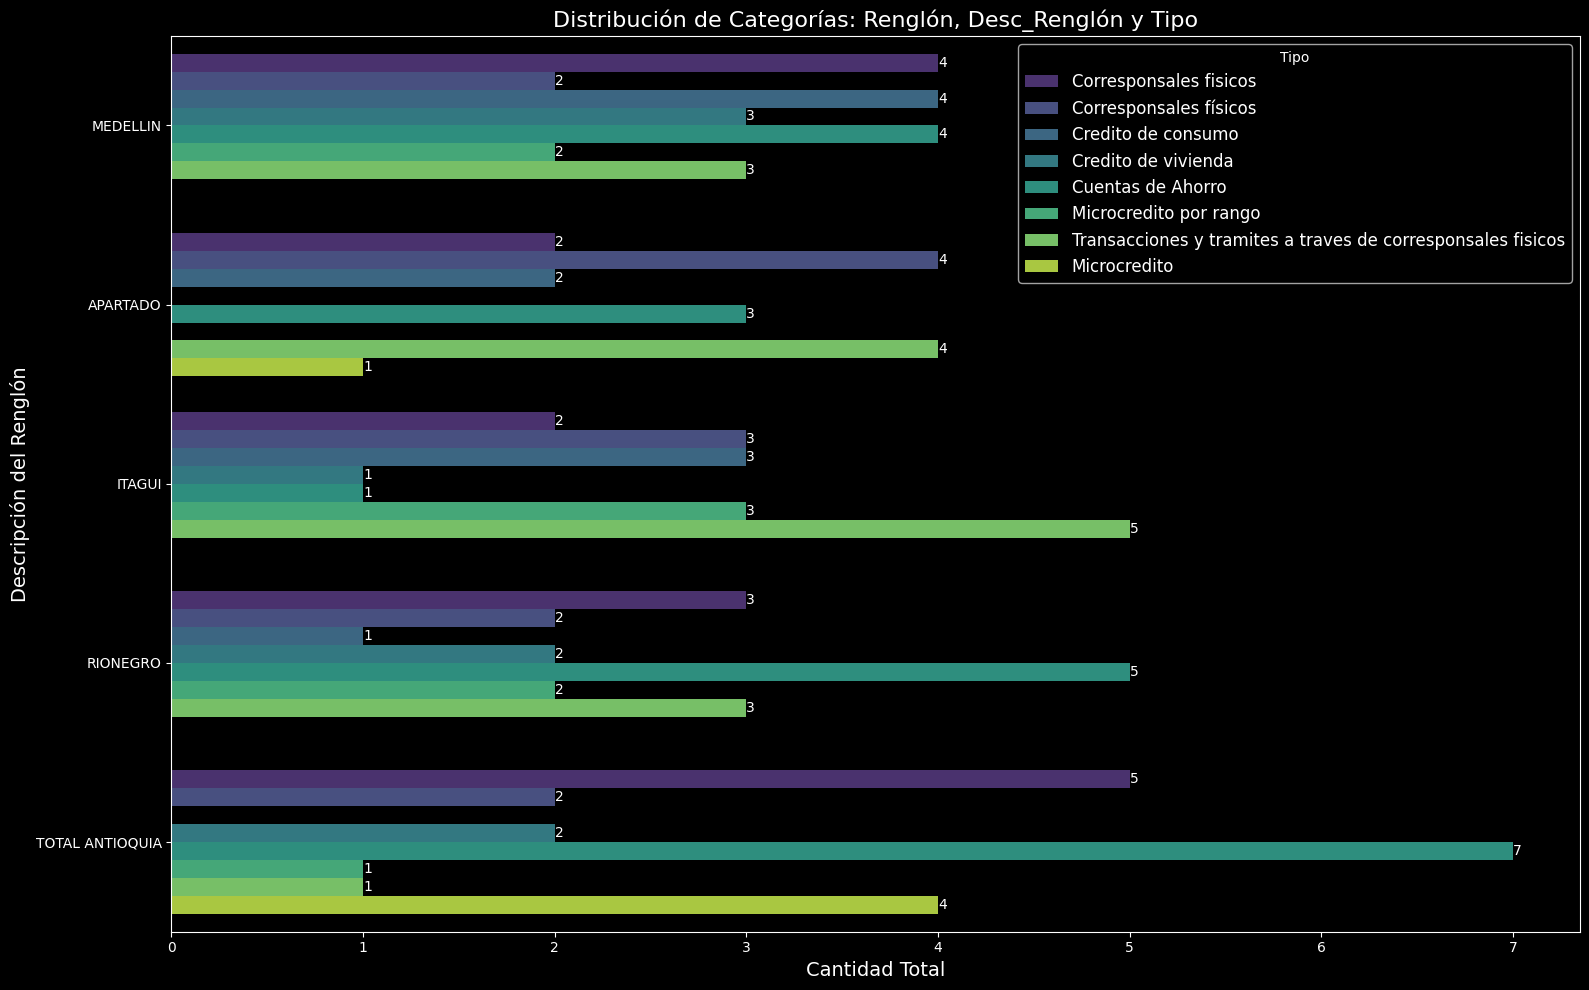

Resultados del Gráfico:
    renglon     desc_renglon  \
0         1         MEDELLIN   
1         1         MEDELLIN   
2         1         MEDELLIN   
3         1         MEDELLIN   
4         1         MEDELLIN   
5         1         MEDELLIN   
6         1         MEDELLIN   
7        45         APARTADO   
8        45         APARTADO   
9        45         APARTADO   
10       45         APARTADO   
11       45         APARTADO   
12       45         APARTADO   
13      360           ITAGUI   
14      360           ITAGUI   
15      360           ITAGUI   
16      360           ITAGUI   
17      360           ITAGUI   
18      360           ITAGUI   
19      360           ITAGUI   
20      615         RIONEGRO   
21      615         RIONEGRO   
22      615         RIONEGRO   
23      615         RIONEGRO   
24      615         RIONEGRO   
25      615         RIONEGRO   
26      615         RIONEGRO   
27      999  TOTAL ANTIOQUIA   
28      999  TOTAL ANTIOQUIA   
29      999  TOT

In [32]:

# Agrupar por las categorías y sumar los valores por tipo
df_grouped = df_cards.groupby(['renglon', 'desc_renglon', 'tipo']).size().reset_index(name='count')

# Seleccionar las categorías principales por cantidad total de renglones
top_renglones = df_grouped.groupby('renglon')['count'].sum().nlargest(5).index
df_filtered = df_grouped[df_grouped['renglon'].isin(top_renglones)]

# Crear un gráfico de barras agrupadas
plt.figure(figsize=(16, 10))
barplot = sns.barplot(
    data=df_filtered,
    x='count',
    y='desc_renglon',
    hue='tipo',
    palette='viridis'
)

# Añadir los números sobre las barras
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10)

# Personalizar el gráfico
plt.title("Distribución de Categorías: Renglón, Desc_Renglón y Tipo", fontsize=16)
plt.xlabel("Cantidad Total", fontsize=14)
plt.ylabel("Descripción del Renglón", fontsize=14)
plt.legend(title="Tipo", fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Generar un DataFrame con los resultados
result_df = df_filtered.groupby(['renglon', 'desc_renglon', 'tipo'])['count'].sum().reset_index()

# Mostrar el DataFrame debajo del gráfico
print("Resultados del Gráfico:")
print(result_df)

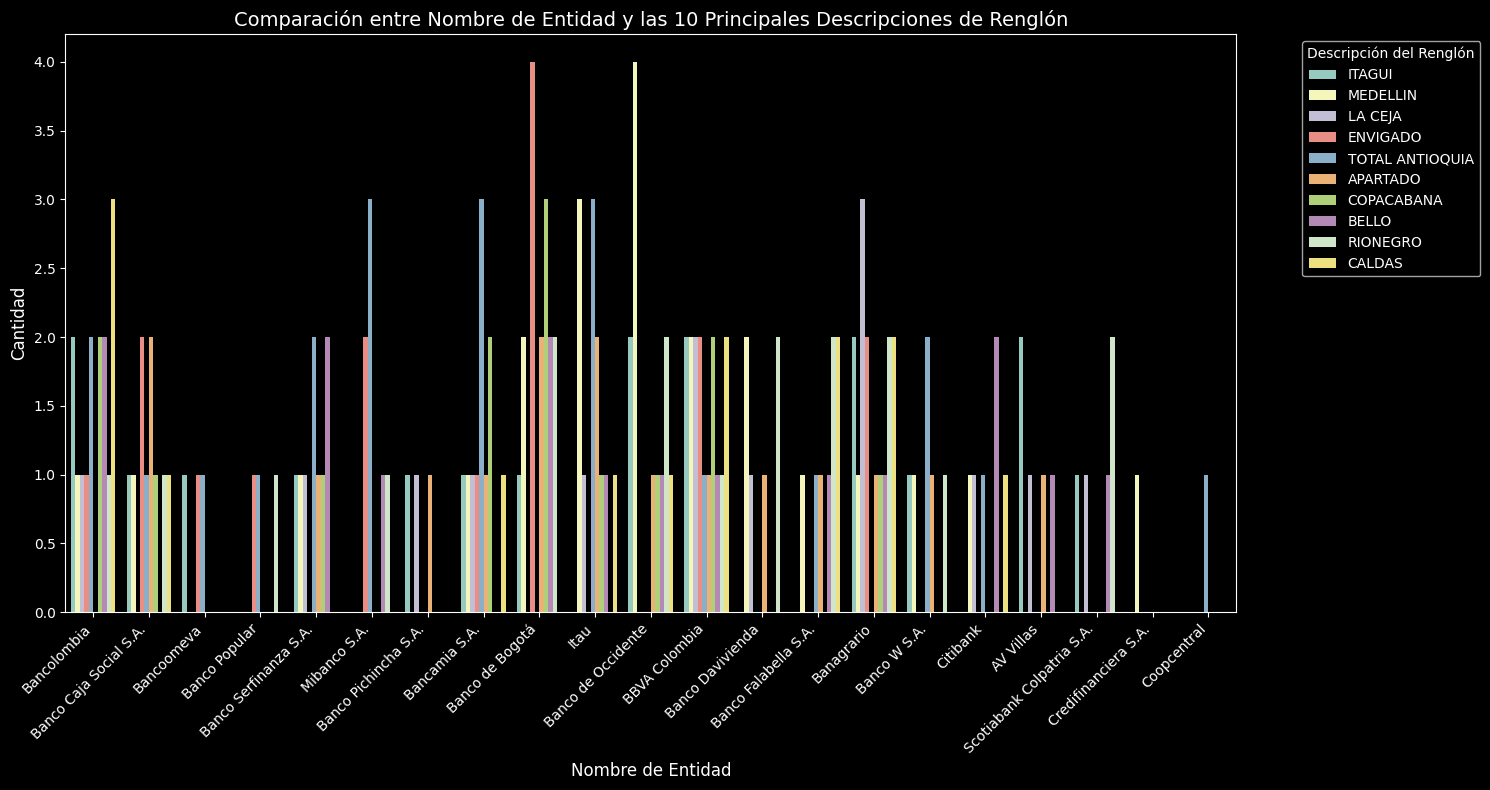

Resultados del Gráfico:
                nombre_entidad     desc_renglon  Cantidad
0                    AV Villas         APARTADO         1
1                    AV Villas            BELLO         1
2                    AV Villas           ITAGUI         2
3                    AV Villas          LA CEJA         1
4                BBVA Colombia         APARTADO         1
..                         ...              ...       ...
110               Mibanco S.A.  TOTAL ANTIOQUIA         3
111  Scotiabank Colpatria S.A.            BELLO         1
112  Scotiabank Colpatria S.A.           ITAGUI         1
113  Scotiabank Colpatria S.A.          LA CEJA         1
114  Scotiabank Colpatria S.A.         RIONEGRO         2

[115 rows x 3 columns]


In [33]:


# Filtrar las 10 primeras categorías de desc_renglon
top_10_renglones = df_cards['desc_renglon'].value_counts().head(10).index
filtered_df = df_cards[df_cards['desc_renglon'].isin(top_10_renglones)]

# Crear un gráfico de barras agrupadas por nombre_entidad
plt.figure(figsize=(15, 8))
barplot = sns.countplot(
    data=filtered_df, 
    x='nombre_entidad', 
    hue='desc_renglon', 
    dodge=True
)

# Ajustar el diseño del gráfico
plt.title("Comparación entre Nombre de Entidad y las 10 Principales Descripciones de Renglón", fontsize=14)
plt.xlabel("Nombre de Entidad", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Descripción del Renglón", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Generar un DataFrame con los resultados
result_df = filtered_df.groupby(['nombre_entidad', 'desc_renglon']).size().reset_index(name='Cantidad')

# Mostrar el DataFrame debajo del gráfico
print("Resultados del Gráfico:")
print(result_df)


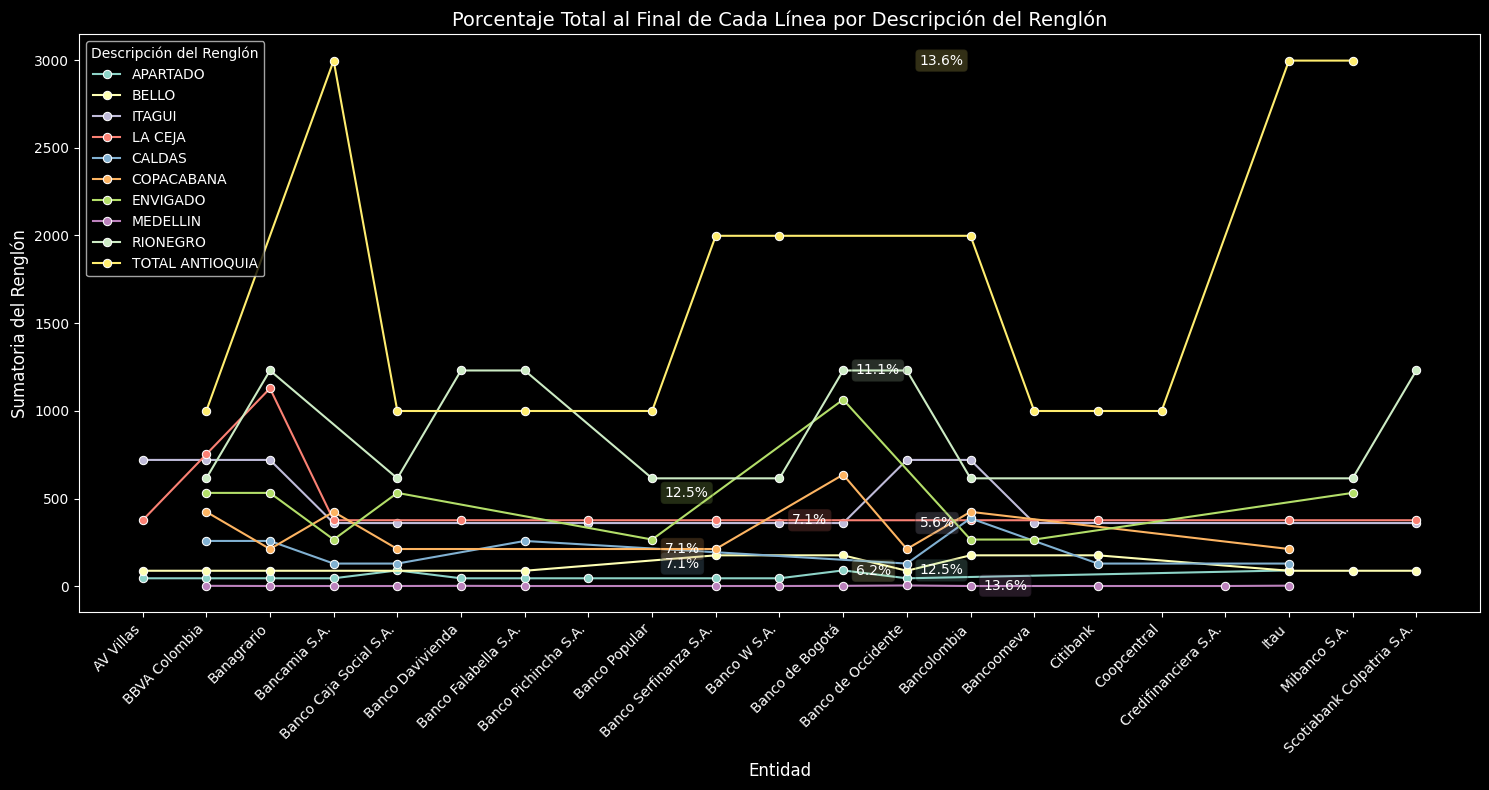

Resultados del Gráfico:
                nombre_entidad     desc_renglon  renglon  porcentaje
0                    AV Villas         APARTADO       45        6.25
1                    AV Villas            BELLO       88        6.25
2                    AV Villas           ITAGUI      720       11.11
3                    AV Villas          LA CEJA      376        7.14
4                BBVA Colombia         APARTADO       45        6.25
..                         ...              ...      ...         ...
110               Mibanco S.A.  TOTAL ANTIOQUIA     2997       13.64
111  Scotiabank Colpatria S.A.            BELLO       88        6.25
112  Scotiabank Colpatria S.A.           ITAGUI      360        5.56
113  Scotiabank Colpatria S.A.          LA CEJA      376        7.14
114  Scotiabank Colpatria S.A.         RIONEGRO     1230       11.11

[115 rows x 4 columns]


In [34]:

# Filtrar las 10 descripciones de renglón más frecuentes
top_10_renglones = df_cards['desc_renglon'].value_counts().head(10).index

# Filtrar el DataFrame para incluir solo las filas correspondientes a los renglones más frecuentes
filtered_df = df_cards[df_cards['desc_renglon'].isin(top_10_renglones)]

# Calcular la sumatoria de las cantidades
sum_df = filtered_df.groupby(['nombre_entidad', 'desc_renglon'])['renglon'].sum().reset_index()

# Calcular el porcentaje total por descripción del renglón
total_per_renglon = sum_df.groupby('desc_renglon')['renglon'].transform('sum')
sum_df['porcentaje'] = (sum_df['renglon'] / total_per_renglon) * 100

# Crear el gráfico
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=sum_df, x='nombre_entidad', y='renglon', hue='desc_renglon', marker='o')

# Agregar etiquetas de porcentaje al final de cada línea
for line, desc_renglon in zip(ax.lines, sum_df['desc_renglon'].unique()):
    subset = sum_df[sum_df['desc_renglon'] == desc_renglon]
    final_x = subset['nombre_entidad'].iloc[-1]
    final_y = subset['renglon'].iloc[-1]
    final_pct = subset['porcentaje'].iloc[-1]
    ax.text(
        x=subset['nombre_entidad'].tolist().index(final_x) + 0.2,  # Ajustar posición para evitar superposición
        y=final_y,
        s=f"{final_pct:.1f}%",  # Etiqueta de porcentaje
        fontsize=10,
        ha='left',
        va='center',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor=line.get_color(), alpha=0.2)  # Cuadro de color
    )

# Mejorar las etiquetas y la presentación
graph_title = "Porcentaje Total al Final de Cada Línea por Descripción del Renglón"
plt.title(graph_title, fontsize=14)
plt.xlabel("Entidad", fontsize=12)
plt.ylabel("Sumatoria del Renglón", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Descripción del Renglón", fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Mostrar el DataFrame con los resultados
print("Resultados del Gráfico:")
print(sum_df[['nombre_entidad', 'desc_renglon', 'renglon', 'porcentaje']].round(2))


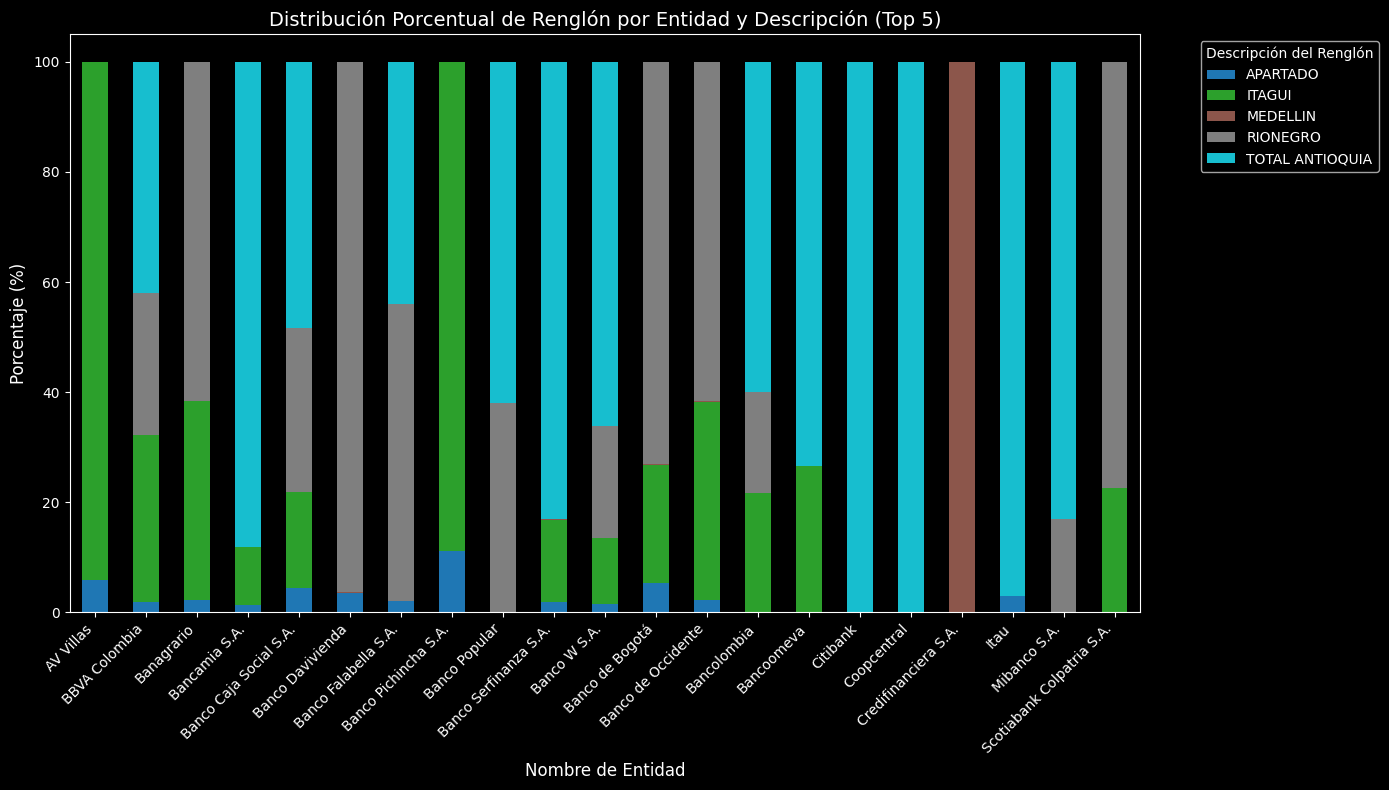

Resultados Porcentuales del Gráfico Apilado:
desc_renglon               APARTADO  ITAGUI  MEDELLIN  RIONEGRO  \
nombre_entidad                                                    
AV Villas                      5.88   94.12      0.00      0.00   
BBVA Colombia                  1.89   30.24      0.08     25.83   
Banagrario                     2.25   36.07      0.05     61.62   
Bancamia S.A.                  1.32   10.58      0.03      0.00   
Banco Caja Social S.A.         4.36   17.43      0.05     29.78   
Banco Davivienda               3.52    0.00      0.16     96.32   
Banco Falabella S.A.           1.98    0.00      0.04     54.07   
Banco Pichincha S.A.          11.11   88.89      0.00      0.00   
Banco Popular                  0.00    0.00      0.00     38.10   
Banco Serfinanza S.A.          1.87   14.98      0.04      0.00   
Banco W S.A.                   1.49   11.92      0.03     20.37   
Banco de Bogotá                5.35   21.40      0.12     73.13   
Banco de Occident

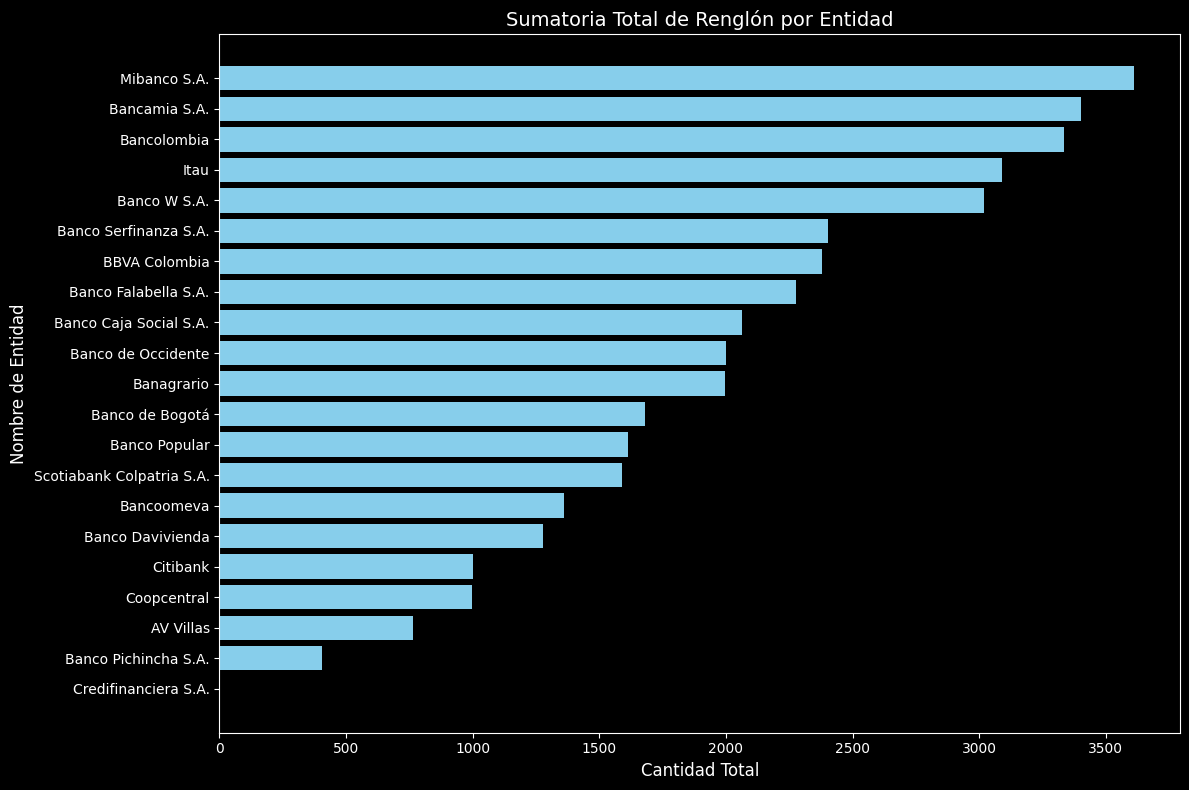

Resultados Totales del Gráfico de Barras Horizontales:
               nombre_entidad  renglon
0                Mibanco S.A.     3612
1               Bancamia S.A.     3403
2                 Bancolombia     3334
3                        Itau     3090
4                Banco W S.A.     3019
5       Banco Serfinanza S.A.     2404
6               BBVA Colombia     2381
7        Banco Falabella S.A.     2275
8      Banco Caja Social S.A.     2065
9          Banco de Occidente     1999
10                 Banagrario     1996
11            Banco de Bogotá     1682
12              Banco Popular     1614
13  Scotiabank Colpatria S.A.     1590
14                 Bancoomeva     1359
15           Banco Davivienda     1277
16                   Citibank     1000
17                Coopcentral      999
18                  AV Villas      765
19       Banco Pichincha S.A.      405
20       Credifinanciera S.A.        1


In [35]:


# Filtrar las 5 descripciones de renglón más frecuentes
top_5_renglones = df_cards['desc_renglon'].value_counts().head(5).index
filtered_df = df_cards[df_cards['desc_renglon'].isin(top_5_renglones)]

# Calcular la sumatoria de los valores y porcentajes
sum_df = (
    filtered_df.groupby(['nombre_entidad', 'desc_renglon'])['renglon']
    .sum()
    .reset_index()
)
sum_df['percentage'] = (
    sum_df.groupby('nombre_entidad')['renglon']
    .transform(lambda x: (x / x.sum()) * 100)
)

# Pivotear para gráfico apilado
pivot_df = sum_df.pivot(index='nombre_entidad', columns='desc_renglon', values='percentage').fillna(0)

# Crear gráfico apilado
fig, ax = plt.subplots(figsize=(14, 8))
pivot_df.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

# Mejorar etiquetas y título
ax.set_title("Distribución Porcentual de Renglón por Entidad y Descripción (Top 5)", fontsize=14)
ax.set_xlabel("Nombre de Entidad", fontsize=12)
ax.set_ylabel("Porcentaje (%)", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title="Descripción del Renglón", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Mostrar gráfico
plt.show()

# Mostrar el DataFrame debajo del gráfico
print("Resultados Porcentuales del Gráfico Apilado:")
print(pivot_df.round(2))

# Gráfico de barras horizontales para totales
total_df = (
    filtered_df.groupby('nombre_entidad')['renglon']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(12, 8))
plt.barh(total_df['nombre_entidad'], total_df['renglon'], color='skyblue')
plt.title("Sumatoria Total de Renglón por Entidad", fontsize=14)
plt.xlabel("Cantidad Total", fontsize=12)
plt.ylabel("Nombre de Entidad", fontsize=12)
plt.gca().invert_yaxis()  # Invertir el eje para mejor lectura
plt.tight_layout()

# Mostrar gráfico
plt.show()

# Mostrar el DataFrame debajo del gráfico
print("Resultados Totales del Gráfico de Barras Horizontales:")
print(total_df)

Resultados Totales del Gráfico de Barras Horizontales:

| nombre_entidad         | ciudad |
|-------------------------|--------|
| Mibanco S.A.           | 3612   |
| Bancamia S.A.          | 3403   |
| Bancolombia            | 3334   |
| Itau                   | 3090   |
| Banco W S.A.           | 3019   |
| Banco Serfinanza S.A.  | 2404   |
| BBVA Colombia          | 2381   |
| Banco Falabella S.A.   | 2275   |
| Banco Caja Social S.A. | 2065   |
| Banco de Occidente     | 1999   |
| Banagrario             | 1996   |
| Banco de Bogotá        | 1682   |
| Banco Popular          | 1614  


In [38]:
df_top_categories

,__id,tipo_entidad,codigo_entidad,nombre_entidad,fecha_corte,unicap,descrip_uc,renglon,desc_renglon,tipo,...,_89_nro_giros_recibidos,_90_monto_giros_recibidos,_91_nro_pagos_corresponsales,_92_monto_pagos_corresponsales,_93_nro_retiros_corresponsales,_94_monto_retiros,_95_nro_transferencias,_96_monto_transferencias,_97_nro_transacciones_tr,_98_monto_transacciones
0,row-fqfd-wpsi.6sps,1,7,Bancolombia,2021-03-31,1,ANTIOQUIA,360,ITAGUI,Transacciones y tramites a traves de correspon...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,row-7wz6.3v87_bgxg,1,30,Banco Caja Social S.A.,2021-03-31,1,ANTIOQUIA,1,MEDELLIN,Microcredito por rango,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,row-4ar7_48tm~s5jz,1,54,Bancoomeva,2021-03-31,1,ANTIOQUIA,360,ITAGUI,Cuentas de Ahorro,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,row-visr-kaxp-98iz,1,7,Bancolombia,2021-03-31,1,ANTIOQUIA,376,LA CEJA,Cuentas de Ahorro,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,row-h63u_eqyf_rvab,1,2,Banco Popular,2021-03-31,1,ANTIOQUIA,266,ENVIGADO,Credito de consumo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,row-iqy6~bhud~yzpa,1,63,Banco Serfinanza S.A.,2021-03-31,1,ANTIOQUIA,1,MEDELLIN,Corresponsales fisicos,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
970,row-fwzq_69v9.y2sd,1,49,AV Villas,2021-03-31,1,ANTIOQUIA,376,LA CEJA,Corresponsales fisicos,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
972,row-p76e~waj3~vef5,1,13,BBVA Colombia,2021-03-31,1,ANTIOQUIA,360,ITAGUI,Transacciones y tramites a traves de correspon...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
987,row-vmxw.cbra-36qj,1,43,Banagrario,2021-03-31,1,ANTIOQUIA,360,ITAGUI,Credito de consumo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


SMMLV significa Salario Mínimo Mensual Legal Vigente.

In [39]:
df_cards.columns

Index(['__id', 'tipo_entidad', 'codigo_entidad', 'nombre_entidad',
       'fecha_corte', 'unicap', 'descrip_uc', 'renglon', 'desc_renglon',
       'tipo', 'nro_corresponsales_fisicos', '_2_nro_corresponsales_f_sicos',
       '_3_nro_corresponsales_f_sicos', '_4_nro_corresponsales_f_sicos',
       '_5_nro_dep_sitos', '_6_monto_dep_sitos', '_7_nro_giros_enviados',
       '_8_monto_giros_enviados', '_9_nro_giros_recibidos',
       '_10_monto_giros_recibidos', '_11_nro_pagos_corresponsales',
       '_12_monto_pagos_corresponsales', '_13_nro_retiros_corresponsales',
       '_14_monto_retiros', '_15_nro_transferencias',
       '_16_monto_transferencias', '_17_nro_transacciones_tr',
       '_18_monto_transacciones', '_19_nro_ctas_ahorro_hasta',
       '_20_saldo_ctas_ahorro_hasta', '_21_nro_ctas_ahorro_1smmlv',
       '_22_saldo_ctas_ahorro_1smmlv', '_23_nro_ctas_ahorr_3smmlv',
       '_24_saldo_ctas_ahorr_3smmlv', '_25_nro_ctas_ahorro_activas',
       '_26_saldo_ctas_ahorro_activas', '_27_nr

C:\Users\hp\AppData\Local\Temp\ipykernel_10184\369701466.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce').fillna(0)
C:\Users\hp\AppData\Local\Temp\ipykernel_10184\369701466.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


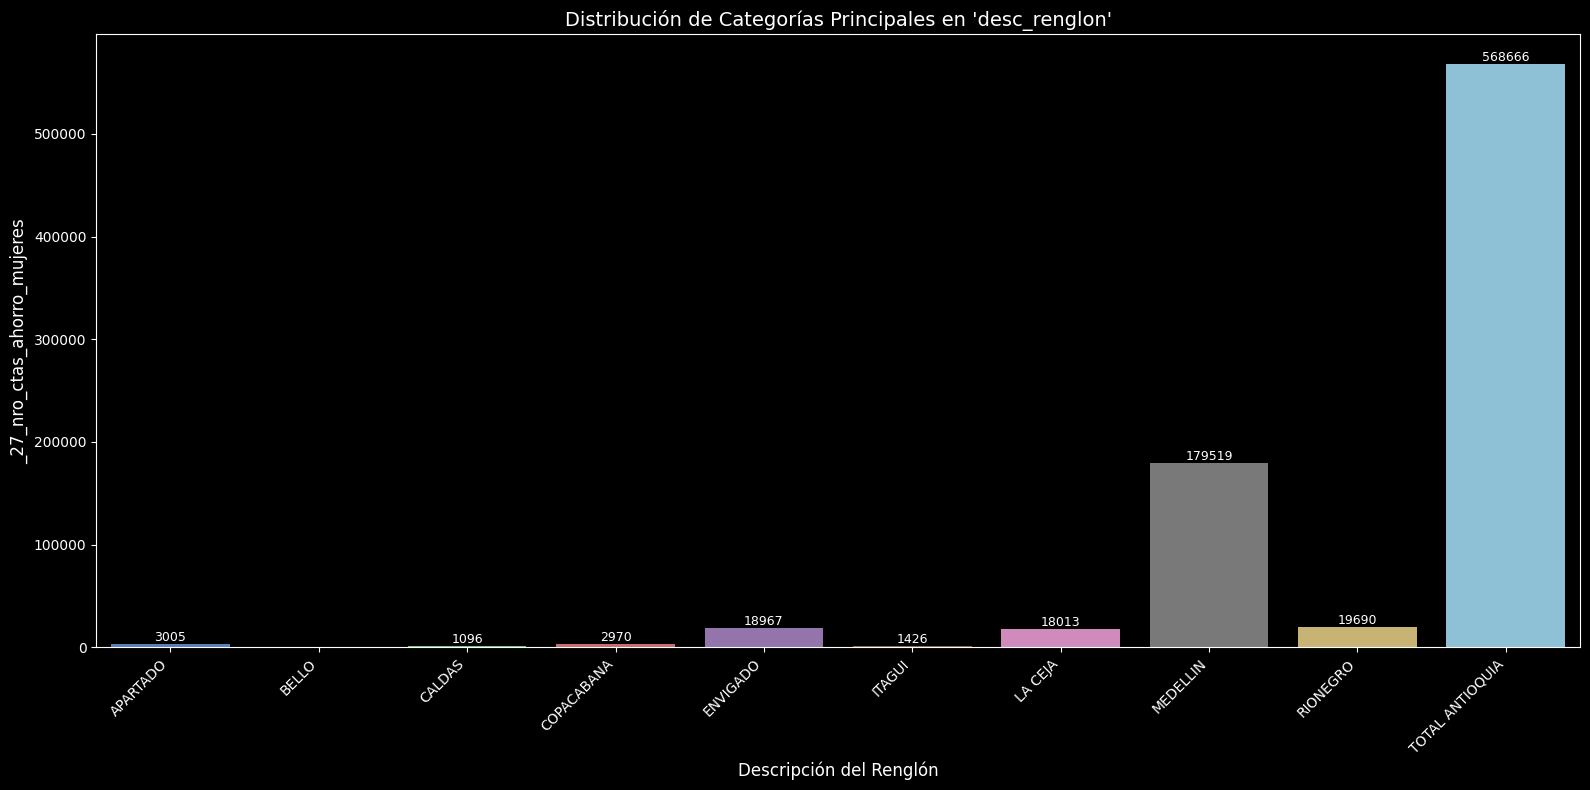


Resultados Gráfico:
      desc_renglon  _27_nro_ctas_ahorro_mujeres
0         APARTADO                       3005.0
1            BELLO                          0.0
2           CALDAS                       1096.0
3       COPACABANA                       2970.0
4         ENVIGADO                      18967.0
5           ITAGUI                       1426.0
6          LA CEJA                      18013.0
7         MEDELLIN                     179519.0
8         RIONEGRO                      19690.0
9  TOTAL ANTIOQUIA                     568666.0


In [79]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la carpeta de salida si no existe
output_folder = "grafico_resultados"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# -------------------- CONFIGURAR DATOS -------------------- #
# Filtrar las 10 categorías más frecuentes
top_categories = df_cards['desc_renglon'].value_counts().nlargest(10).index

# Crear un DataFrame con solo las categorías más frecuentes
df_top_categories = df_cards[df_cards['desc_renglon'].isin(top_categories)]

# Seleccionar la columna a graficar
column_to_plot = '_27_nro_ctas_ahorro_mujeres'  # Cambia por la columna que quieras graficar

# Asegurarte de que la columna sea numérica
df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce').fillna(0)

# Agrupar por 'desc_renglon' y sumar los valores
sum_data = df_top_categories.groupby('desc_renglon')[column_to_plot].sum().reset_index()

# -------------------- GRÁFICO -------------------- #
# Función para guardar y mostrar gráficos
def save_and_show_plot(fig, filename):
    save_path = os.path.join(output_folder, filename)
    fig.savefig(save_path, format='png')
    plt.show()

# Crear el gráfico mejorado
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='desc_renglon',
    y=column_to_plot,  # Columna que estás graficando
    data=sum_data,
    palette='muted'
)

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45, ha='right', fontsize=10)

# Agregar etiquetas y título
plt.title("Distribución de Categorías Principales en 'desc_renglon'", fontsize=14)
plt.xlabel("Descripción del Renglón", fontsize=12)
plt.ylabel(column_to_plot, fontsize=12)

# Agregar los valores encima de las barras
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Evitar etiquetas de valor 0
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha='center',
            va='bottom',
            fontsize=9
        )

# Ajustar espaciado
plt.tight_layout()

# Guardar y mostrar el gráfico
save_and_show_plot(plt.gcf(), "grafico_nro_ctas_ahorro_mujeres.png")

# -------------------- MOSTRAR RESULTADOS -------------------- #
print("\nResultados Gráfico:")
print(sum_data)


C:\Users\hp\AppData\Local\Temp\ipykernel_10184\3051260767.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce')
C:\Users\hp\AppData\Local\Temp\ipykernel_10184\3051260767.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


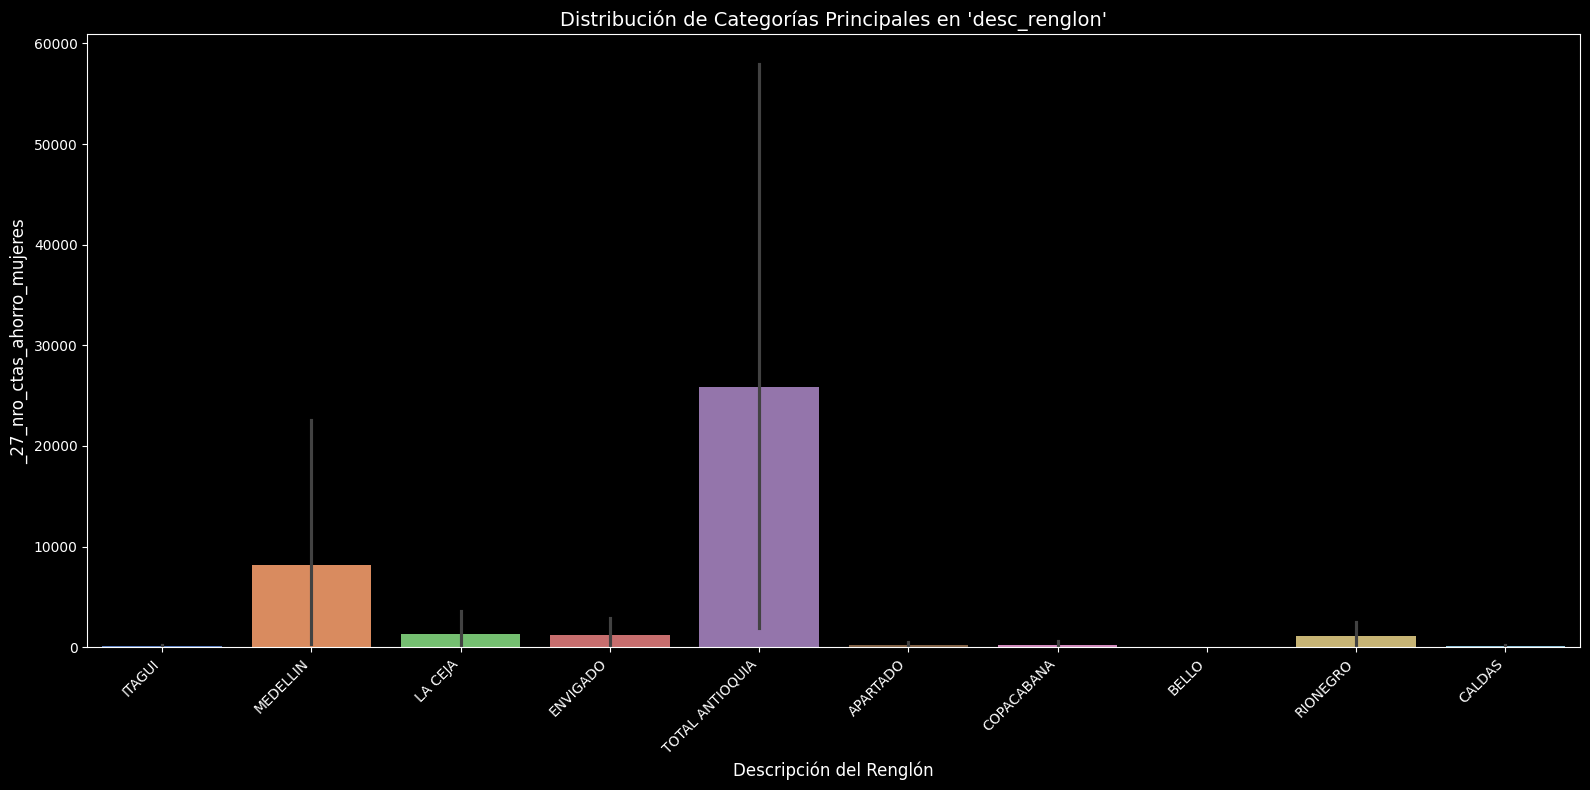

In [40]:
# Filtrar las 10 categorías más frecuentes
top_categories = df_cards['desc_renglon'].value_counts().nlargest(10).index

# Crear un DataFrame con solo las categorías más frecuentes
df_top_categories = df_cards[df_cards['desc_renglon'].isin(top_categories)]

# Seleccionar la columna a graficar
column_to_plot = '_27_nro_ctas_ahorro_mujeres'  # Cambia por la columna que quieras graficar

# Asegurarte de que la columna sea numérica
df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce')

# Crear el gráfico mejorado
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='desc_renglon',
    y=column_to_plot,  # Columna que estás graficando
    data=df_top_categories,
    palette='muted'
)

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45, ha='right', fontsize=10)

# Agregar etiquetas y título
plt.title("Distribución de Categorías Principales en 'desc_renglon'", fontsize=14)
plt.xlabel("Descripción del Renglón", fontsize=12)
plt.ylabel(column_to_plot, fontsize=12)

# Ajustar espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_10184\3084132011.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce').fillna(0)
C:\Users\hp\AppData\Local\Temp\ipykernel_10184\3084132011.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


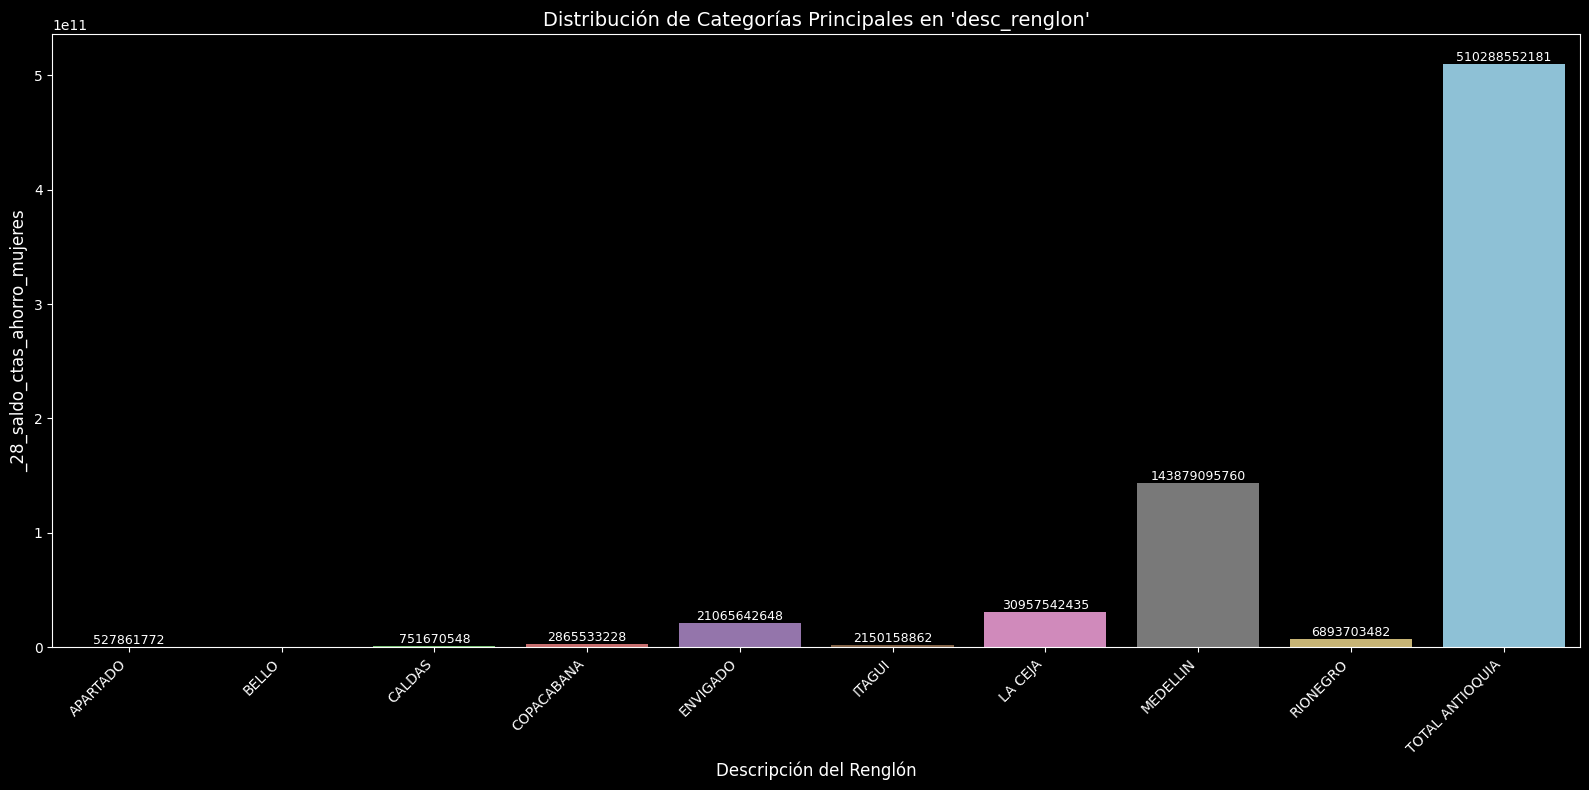


Resultados Gráfico:
      desc_renglon  _28_saldo_ctas_ahorro_mujeres
0         APARTADO                   5.278618e+08
1            BELLO                   0.000000e+00
2           CALDAS                   7.516705e+08
3       COPACABANA                   2.865533e+09
4         ENVIGADO                   2.106564e+10
5           ITAGUI                   2.150159e+09
6          LA CEJA                   3.095754e+10
7         MEDELLIN                   1.438791e+11
8         RIONEGRO                   6.893703e+09
9  TOTAL ANTIOQUIA                   5.102886e+11


In [78]:


# Crear la carpeta de salida si no existe
output_folder = "grafico_resultados"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# -------------------- CONFIGURAR DATOS -------------------- #
# Filtrar las 10 categorías más frecuentes
top_categories = df_cards['desc_renglon'].value_counts().nlargest(10).index

# Crear un DataFrame con solo las categorías más frecuentes
df_top_categories = df_cards[df_cards['desc_renglon'].isin(top_categories)]

# Seleccionar la columna a graficar
column_to_plot = '_28_saldo_ctas_ahorro_mujeres'  # Cambia por la columna que quieras graficar

# Asegurarte de que la columna sea numérica
df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce').fillna(0)

# Agrupar por 'desc_renglon' y sumar los valores
sum_data = df_top_categories.groupby('desc_renglon')[column_to_plot].sum().reset_index()

# -------------------- GRÁFICO -------------------- #
# Función para guardar y mostrar gráficos
def save_and_show_plot(fig, filename):
    save_path = os.path.join(output_folder, filename)
    fig.savefig(save_path, format='png')
    plt.show()

# Crear el gráfico mejorado
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='desc_renglon',
    y=column_to_plot,  # Columna que estás graficando
    data=sum_data,
    palette='muted'
)

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45, ha='right', fontsize=10)

# Agregar etiquetas y título
plt.title("Distribución de Categorías Principales en 'desc_renglon'", fontsize=14)
plt.xlabel("Descripción del Renglón", fontsize=12)
plt.ylabel(column_to_plot, fontsize=12)

# Agregar los valores encima de las barras
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Evitar etiquetas de valor 0
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha='center',
            va='bottom',
            fontsize=9
        )

# Ajustar espaciado
plt.tight_layout()

# Guardar y mostrar el gráfico
save_and_show_plot(plt.gcf(), "grafico_saldo_ctas_ahorro_mujeres.png")

# -------------------- MOSTRAR RESULTADOS -------------------- #
print("\nResultados Gráfico:")
print(sum_data)


C:\Users\hp\AppData\Local\Temp\ipykernel_10184\1791287849.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce')
C:\Users\hp\AppData\Local\Temp\ipykernel_10184\1791287849.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


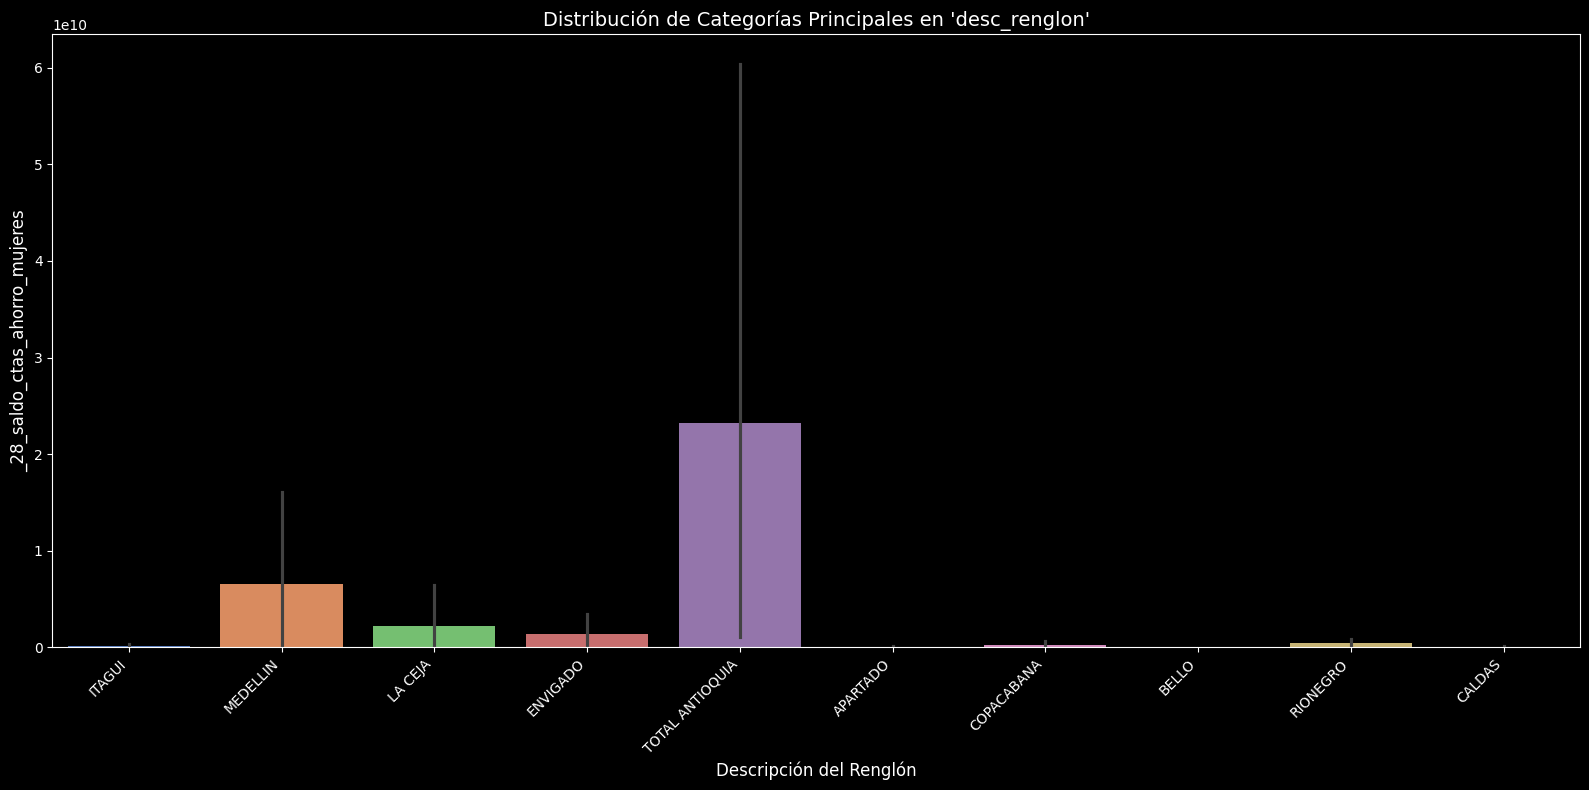

In [41]:
# Filtrar las 10 categorías más frecuentes
top_categories = df_cards['desc_renglon'].value_counts().nlargest(10).index

# Crear un DataFrame con solo las categorías más frecuentes
df_top_categories = df_cards[df_cards['desc_renglon'].isin(top_categories)]

# Seleccionar la columna a graficar
column_to_plot = '_28_saldo_ctas_ahorro_mujeres'  # Cambia por la columna que quieras graficar

# Asegurarte de que la columna sea numérica
df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce')

# Crear el gráfico mejorado
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='desc_renglon',
    y=column_to_plot,  # Columna que estás graficando
    data=df_top_categories,
    palette='muted'
)

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45, ha='right', fontsize=10)

# Agregar etiquetas y título
plt.title("Distribución de Categorías Principales en 'desc_renglon'", fontsize=14)
plt.xlabel("Descripción del Renglón", fontsize=12)
plt.ylabel(column_to_plot, fontsize=12)

# Ajustar espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_10184\555237395.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce').fillna(0)
C:\Users\hp\AppData\Local\Temp\ipykernel_10184\555237395.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


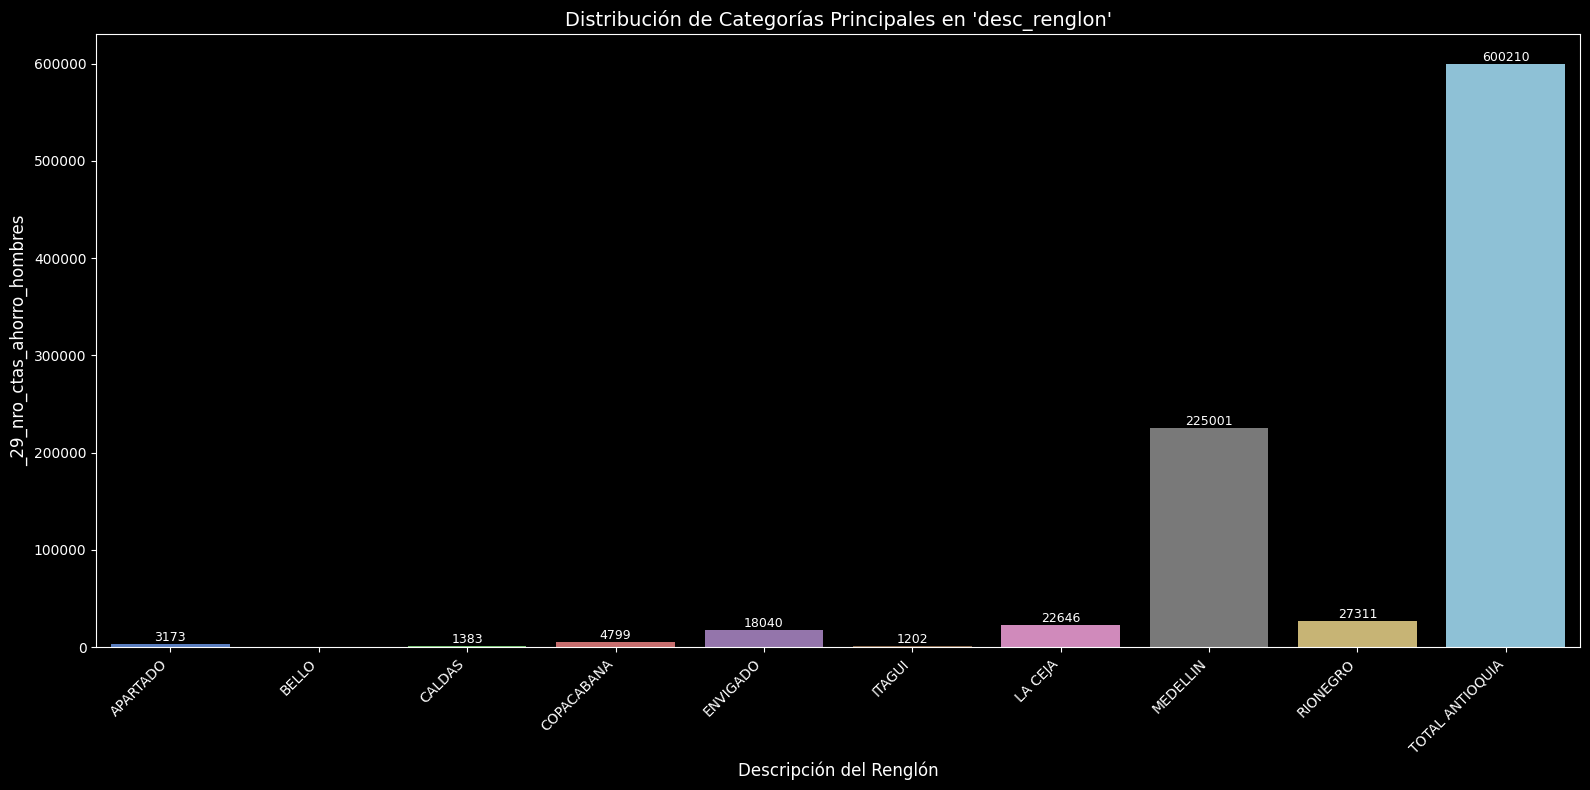


Resultados Gráfico:
      desc_renglon  _29_nro_ctas_ahorro_hombres
0         APARTADO                       3173.0
1            BELLO                          0.0
2           CALDAS                       1383.0
3       COPACABANA                       4799.0
4         ENVIGADO                      18040.0
5           ITAGUI                       1202.0
6          LA CEJA                      22646.0
7         MEDELLIN                     225001.0
8         RIONEGRO                      27311.0
9  TOTAL ANTIOQUIA                     600210.0


In [75]:


# Crear la carpeta de salida si no existe
output_folder = "grafico_resultados"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# -------------------- CONFIGURAR DATOS -------------------- #
# Filtrar las 10 categorías más frecuentes
top_categories = df_cards['desc_renglon'].value_counts().nlargest(10).index

# Crear un DataFrame con solo las categorías más frecuentes
df_top_categories = df_cards[df_cards['desc_renglon'].isin(top_categories)]

# Seleccionar la columna a graficar
column_to_plot = '_29_nro_ctas_ahorro_hombres'  # Cambia por la columna que quieras graficar

# Asegurarte de que la columna sea numérica
df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce').fillna(0)

# Agrupar por 'desc_renglon' y sumar los valores
sum_data = df_top_categories.groupby('desc_renglon')[column_to_plot].sum().reset_index()

# -------------------- GRÁFICO -------------------- #
# Función para guardar y mostrar gráficos
def save_and_show_plot(fig, filename):
    save_path = os.path.join(output_folder, filename)
    fig.savefig(save_path, format='png')
    plt.show()

# Crear el gráfico mejorado
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='desc_renglon',
    y=column_to_plot,  # Columna que estás graficando
    data=sum_data,
    palette='muted'
)

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45, ha='right', fontsize=10)

# Agregar etiquetas y título
plt.title("Distribución de Categorías Principales en 'desc_renglon'", fontsize=14)
plt.xlabel("Descripción del Renglón", fontsize=12)
plt.ylabel(column_to_plot, fontsize=12)

# Agregar los valores encima de las barras
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Evitar etiquetas de valor 0
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha='center',
            va='bottom',
            fontsize=9
        )

# Ajustar espaciado
plt.tight_layout()

# Guardar y mostrar el gráfico
save_and_show_plot(plt.gcf(), "grafico_categorias_principales.png")

# -------------------- MOSTRAR RESULTADOS -------------------- #
print("\nResultados Gráfico:")
print(sum_data)


C:\Users\hp\AppData\Local\Temp\ipykernel_10184\2932276919.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce')
C:\Users\hp\AppData\Local\Temp\ipykernel_10184\2932276919.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


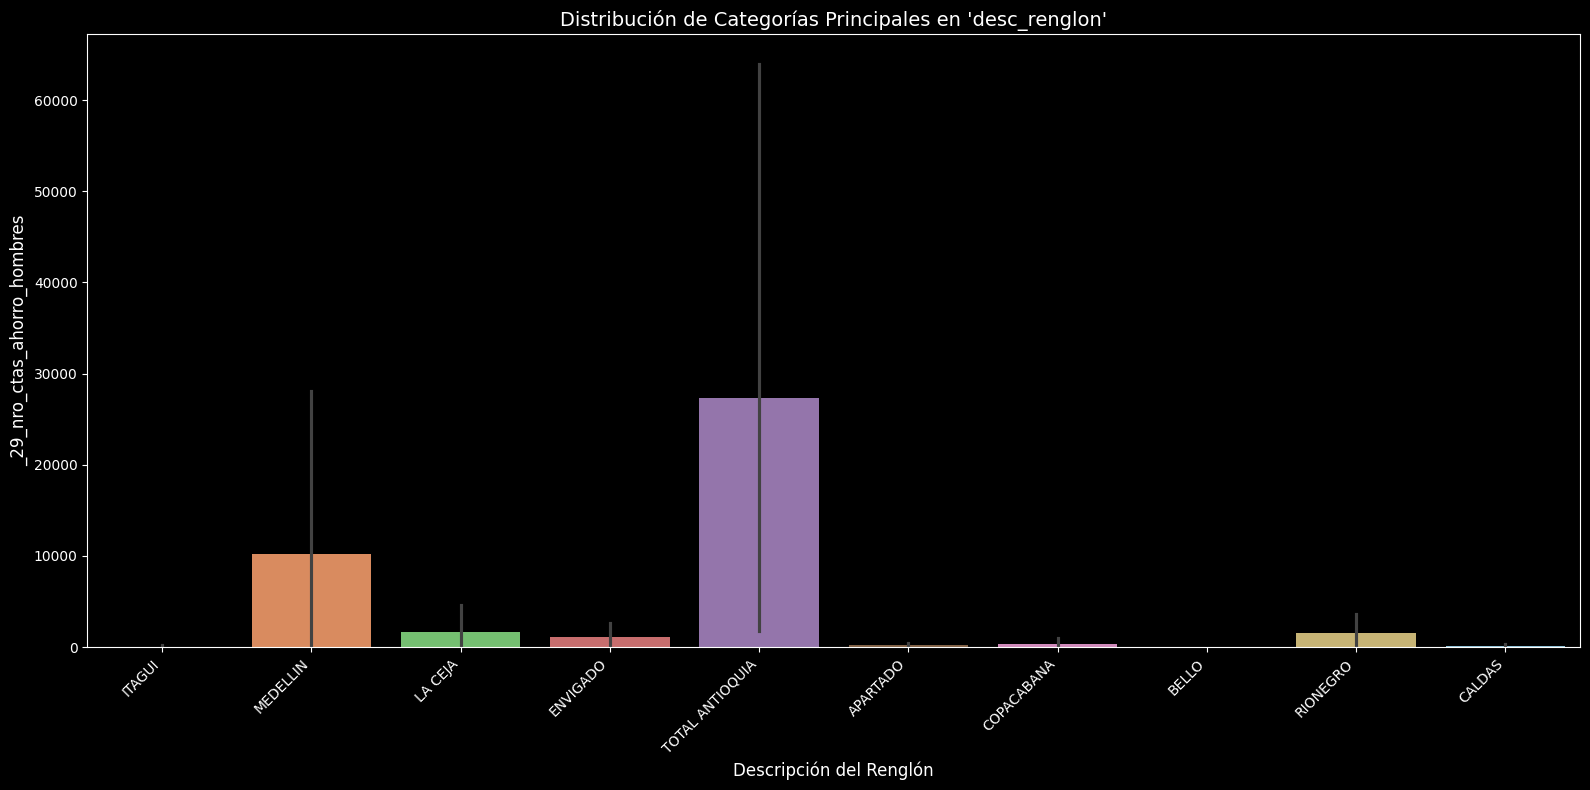

In [42]:
# Filtrar las 10 categorías más frecuentes
top_categories = df_cards['desc_renglon'].value_counts().nlargest(10).index

# Crear un DataFrame con solo las categorías más frecuentes
df_top_categories = df_cards[df_cards['desc_renglon'].isin(top_categories)]

# Seleccionar la columna a graficar
column_to_plot = '_29_nro_ctas_ahorro_hombres' # Cambia por la columna que quieras graficar

# Asegurarte de que la columna sea numérica
df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce')

# Crear el gráfico mejorado
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='desc_renglon',
    y=column_to_plot,  # Columna que estás graficando
    data=df_top_categories,
    palette='muted'
)

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45, ha='right', fontsize=10)

# Agregar etiquetas y título
plt.title("Distribución de Categorías Principales en 'desc_renglon'", fontsize=14)
plt.xlabel("Descripción del Renglón", fontsize=12)
plt.ylabel(column_to_plot, fontsize=12)

# Ajustar espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_10184\3042828998.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce').fillna(0)
C:\Users\hp\AppData\Local\Temp\ipykernel_10184\3042828998.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


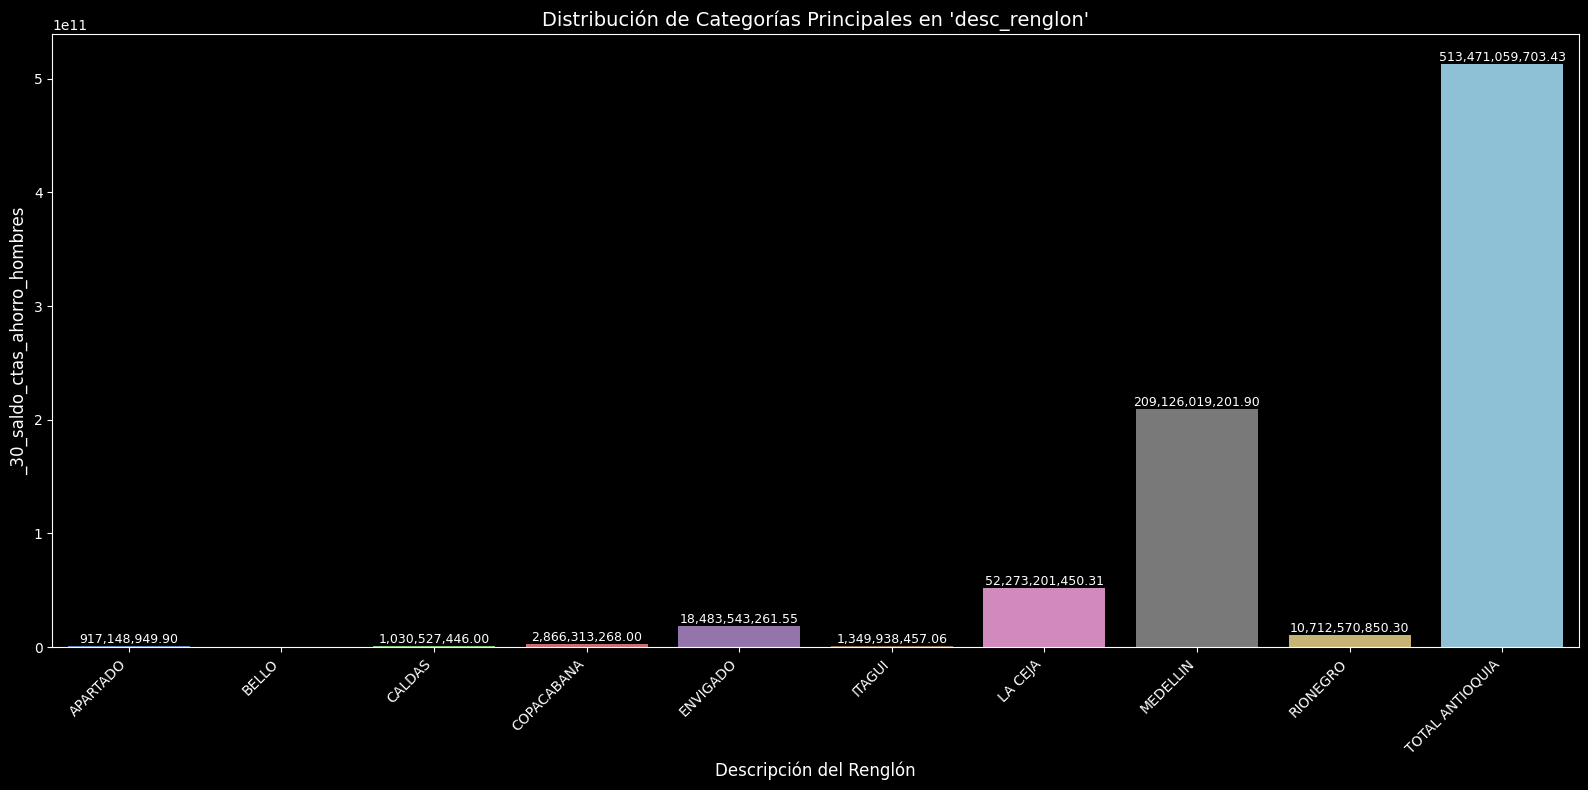


Resultados Gráfico:
      desc_renglon  _30_saldo_ctas_ahorro_hombres
0         APARTADO                   9.171489e+08
1            BELLO                   0.000000e+00
2           CALDAS                   1.030527e+09
3       COPACABANA                   2.866313e+09
4         ENVIGADO                   1.848354e+10
5           ITAGUI                   1.349938e+09
6          LA CEJA                   5.227320e+10
7         MEDELLIN                   2.091260e+11
8         RIONEGRO                   1.071257e+10
9  TOTAL ANTIOQUIA                   5.134711e+11


In [76]:

# Crear la carpeta de salida si no existe
output_folder = "grafico_resultados"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# -------------------- CONFIGURAR DATOS -------------------- #
# Filtrar las 10 categorías más frecuentes
top_categories = df_cards['desc_renglon'].value_counts().nlargest(10).index

# Crear un DataFrame con solo las categorías más frecuentes
df_top_categories = df_cards[df_cards['desc_renglon'].isin(top_categories)]

# Seleccionar la columna a graficar
column_to_plot = '_30_saldo_ctas_ahorro_hombres'  # Cambia por la columna que quieras graficar

# Asegurarte de que la columna sea numérica
df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce').fillna(0)

# Agrupar por categoría y sumar los valores
sum_data = df_top_categories.groupby('desc_renglon')[column_to_plot].sum().reset_index()

# -------------------- GRÁFICO -------------------- #
# Función para guardar y mostrar gráficos
def save_and_show_plot(fig, filename):
    save_path = os.path.join(output_folder, filename)
    fig.savefig(save_path, format='png')
    plt.show()

# Crear el gráfico mejorado
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='desc_renglon',
    y=column_to_plot,  # Columna que estás graficando
    data=sum_data,
    palette='muted'
)

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45, ha='right', fontsize=10)

# Agregar etiquetas y título
plt.title("Distribución de Categorías Principales en 'desc_renglon'", fontsize=14)
plt.xlabel("Descripción del Renglón", fontsize=12)
plt.ylabel(column_to_plot, fontsize=12)

# Agregar los valores encima de las barras
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Evitar etiquetas de valor 0
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:,.2f}",
            ha='center',
            va='bottom',
            fontsize=9
        )

# Ajustar espaciado
plt.tight_layout()

# Guardar y mostrar el gráfico
save_and_show_plot(plt.gcf(), "grafico_distribucion_categorias.png")

# -------------------- MOSTRAR RESULTADOS -------------------- #
print("\nResultados Gráfico:")
print(sum_data)


C:\Users\hp\AppData\Local\Temp\ipykernel_10184\3033396315.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce')
C:\Users\hp\AppData\Local\Temp\ipykernel_10184\3033396315.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


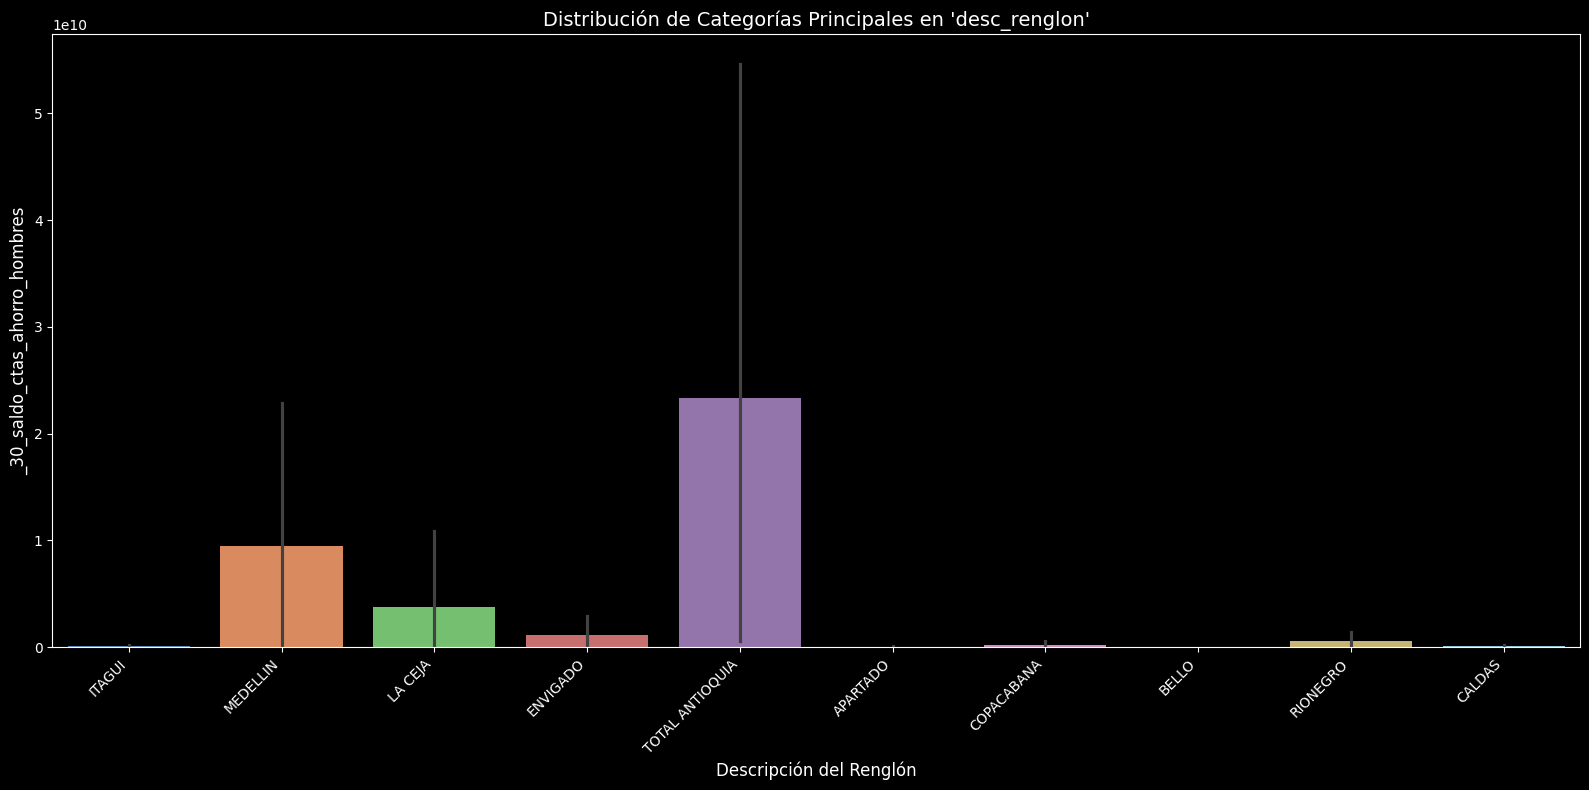

In [43]:

# Filtrar las 10 categorías más frecuentes
top_categories = df_cards['desc_renglon'].value_counts().nlargest(10).index

# Crear un DataFrame con solo las categorías más frecuentes
df_top_categories = df_cards[df_cards['desc_renglon'].isin(top_categories)]

# Seleccionar la columna a graficar
column_to_plot = '_30_saldo_ctas_ahorro_hombres'  # Cambia por la columna que quieras graficar

# Asegurarte de que la columna sea numérica
df_top_categories[column_to_plot] = pd.to_numeric(df_top_categories[column_to_plot], errors='coerce')

# Crear el gráfico mejorado
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='desc_renglon',
    y=column_to_plot,  # Columna que estás graficando
    data=df_top_categories,
    palette='muted'
)

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45, ha='right', fontsize=10)

# Agregar etiquetas y título
plt.title("Distribución de Categorías Principales en 'desc_renglon'", fontsize=14)
plt.xlabel("Descripción del Renglón", fontsize=12)
plt.ylabel(column_to_plot, fontsize=12)

# Ajustar espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10184\771324306.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[selected_columns] = filtered_df[selected_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
C:\Users\hp\AppData\Local\Temp\ipykernel_10184\771324306.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Variables", bbox_to_anchor=(1.05, 1), loc='upper left')


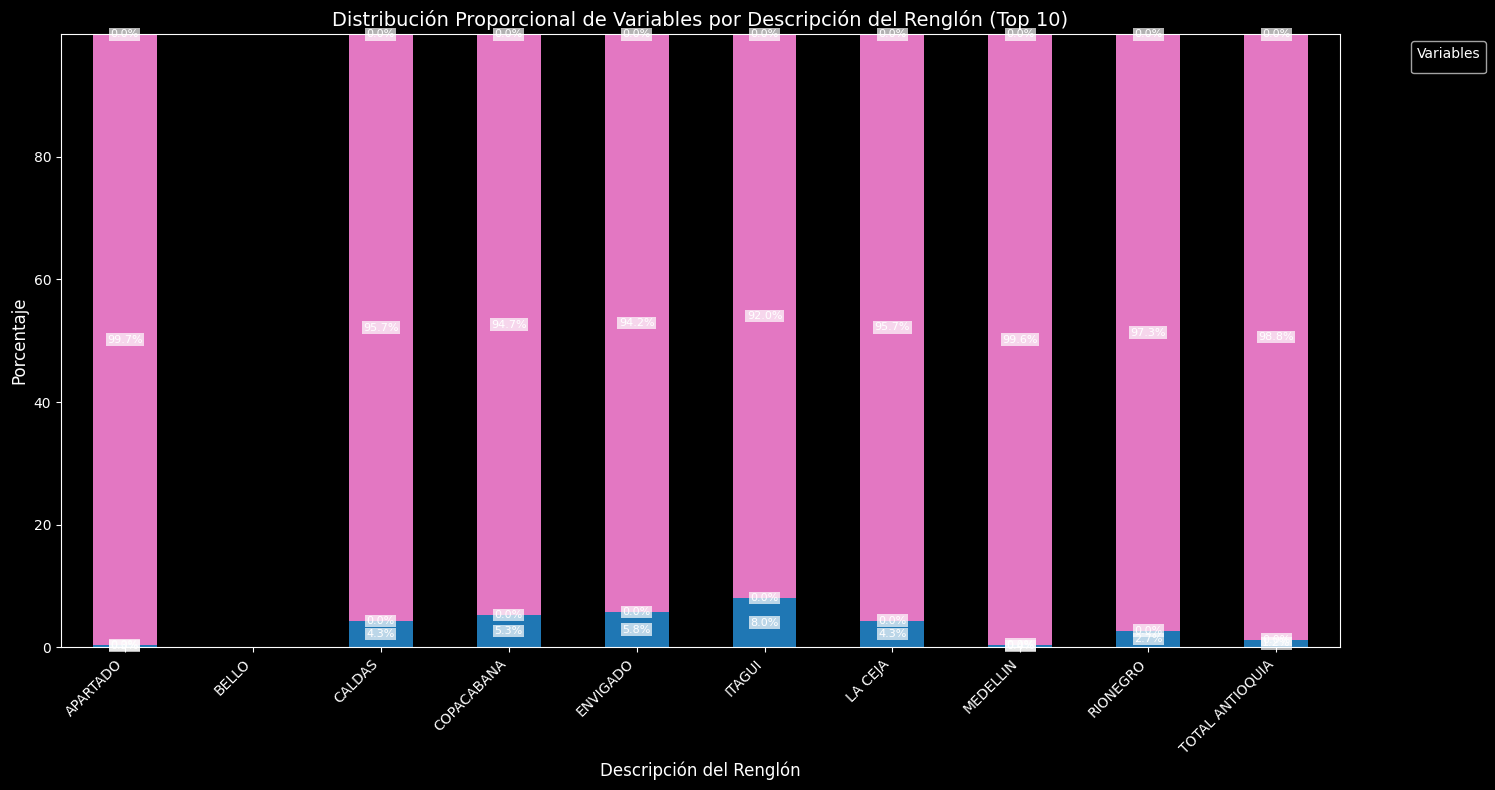


Resultados Gráfico en Porcentaje:
                 _24_saldo_ctas_ahorr_3smmlv  _25_nro_ctas_ahorro_activas  \
desc_renglon                                                                
APARTADO                                0.35                          0.0   
BELLO                                    NaN                          NaN   
CALDAS                                  4.25                          0.0   
COPACABANA                              5.26                          0.0   
ENVIGADO                                5.75                          0.0   
ITAGUI                                  8.02                          0.0   
LA CEJA                                 4.32                          0.0   
MEDELLIN                                0.38                          0.0   
RIONEGRO                                2.68                          0.0   
TOTAL ANTIOQUIA                         1.21                          0.0   

                 _26_saldo_ctas_ahorro_a

In [77]:


# Crear la carpeta de salida si no existe
output_folder = "grafico_resultados"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# -------------------- CONFIGURAR DATOS -------------------- #
# Filtrar las 10 descripciones de renglón más frecuentes
top_10_renglones = df_cards['desc_renglon'].value_counts().head(10).index

# Filtrar el DataFrame para incluir solo las filas correspondientes a los renglones más frecuentes
filtered_df = df_cards[df_cards['desc_renglon'].isin(top_10_renglones)]

# Seleccionar las columnas necesarias y convertirlas a numéricas si no lo son
selected_columns = [
    '_24_saldo_ctas_ahorr_3smmlv',
    '_25_nro_ctas_ahorro_activas',
    '_26_saldo_ctas_ahorro_activas',
    '_27_nro_ctas_ahorro_mujeres'
]
filtered_df[selected_columns] = filtered_df[selected_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Calcular la suma de cada variable por desc_renglon
sum_df = filtered_df.groupby('desc_renglon')[selected_columns].sum()

# Calcular los porcentajes para cada variable por desc_renglon
percentage_df = sum_df.div(sum_df.sum(axis=1), axis=0) * 100

# -------------------- GRÁFICO -------------------- #
# Función para guardar y mostrar gráficos
def save_and_show_plot(fig, filename):
    save_path = os.path.join(output_folder, filename)
    fig.savefig(save_path, format='png')
    plt.show()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 8))
percentage_df.plot(kind='bar', stacked=True, colormap='tab10', ax=ax)

# Agregar títulos y etiquetas
ax.set_title("Distribución Proporcional de Variables por Descripción del Renglón (Top 10)", fontsize=14)
ax.set_xlabel("Descripción del Renglón", fontsize=12)
ax.set_ylabel("Porcentaje", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.legend(title="Variables", bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar los porcentajes encima de las barras
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Evitar etiquetas de valor 0
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.1f}%",
                ha='center',
                va='center',
                fontsize=8,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
            )

plt.tight_layout()
save_and_show_plot(fig, "grafico_distribucion_proporcional_variables.png")

# -------------------- MOSTRAR RESULTADOS -------------------- #
print("\nResultados Gráfico en Porcentaje:")
print(percentage_df.round(2))


C:\Users\hp\AppData\Local\Temp\ipykernel_10184\244787804.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[columns_to_sum] = df_filtered[columns_to_sum].apply(pd.to_numeric, errors='coerce').fillna(0)


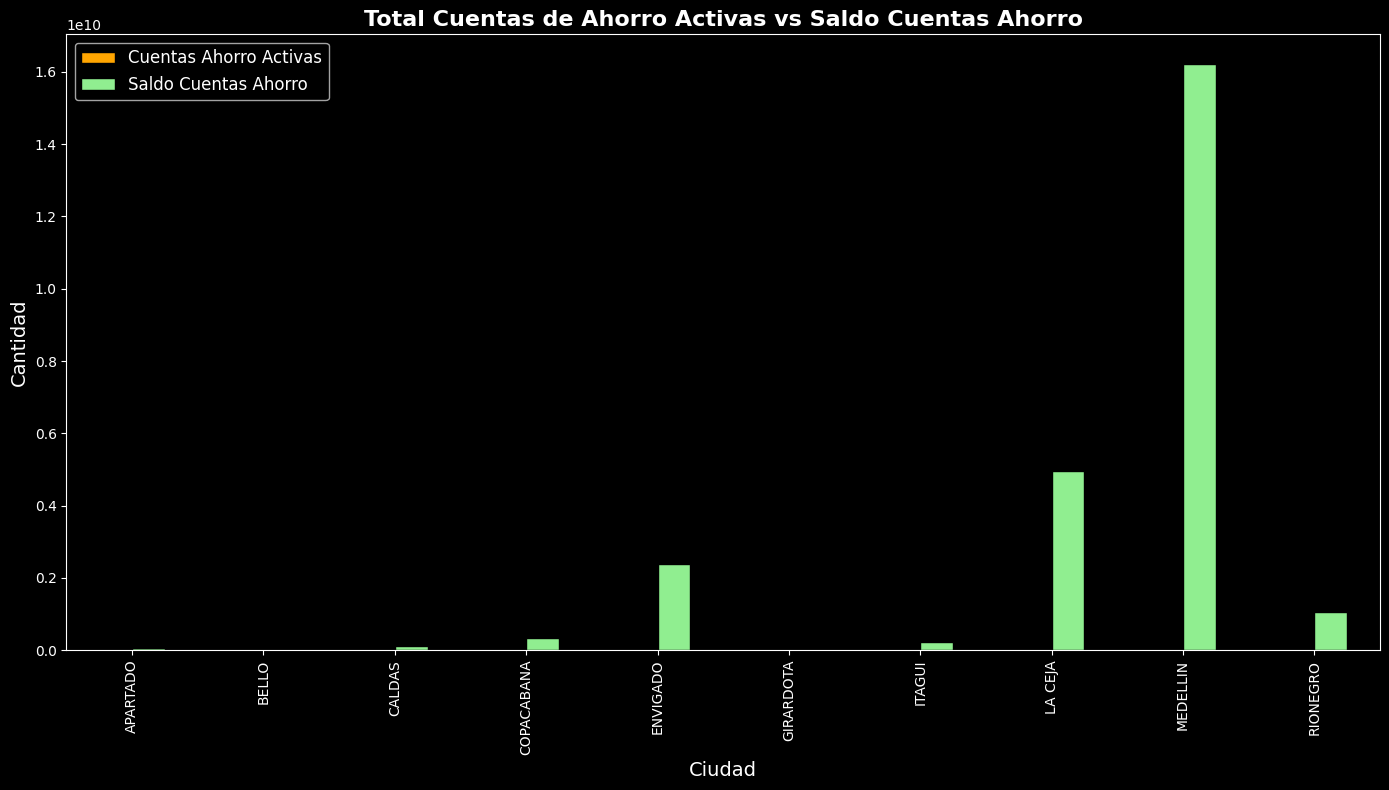

Resultados Gráfico 1:
    Ciudad  Cuentas Ahorro Activas  Saldo Cuentas Ahorro
  APARTADO                  2641.0          4.473441e+07
     BELLO                     0.0          0.000000e+00
    CALDAS                  1683.0          1.175443e+08
COPACABANA                  2324.0          3.372053e+08
  ENVIGADO                 11244.0          2.373570e+09
 GIRARDOTA                     0.0          0.000000e+00
    ITAGUI                   625.0          2.118129e+08
   LA CEJA                 30282.0          4.956490e+09
  MEDELLIN                128729.0          1.622996e+10
  RIONEGRO                 12557.0          1.045113e+09


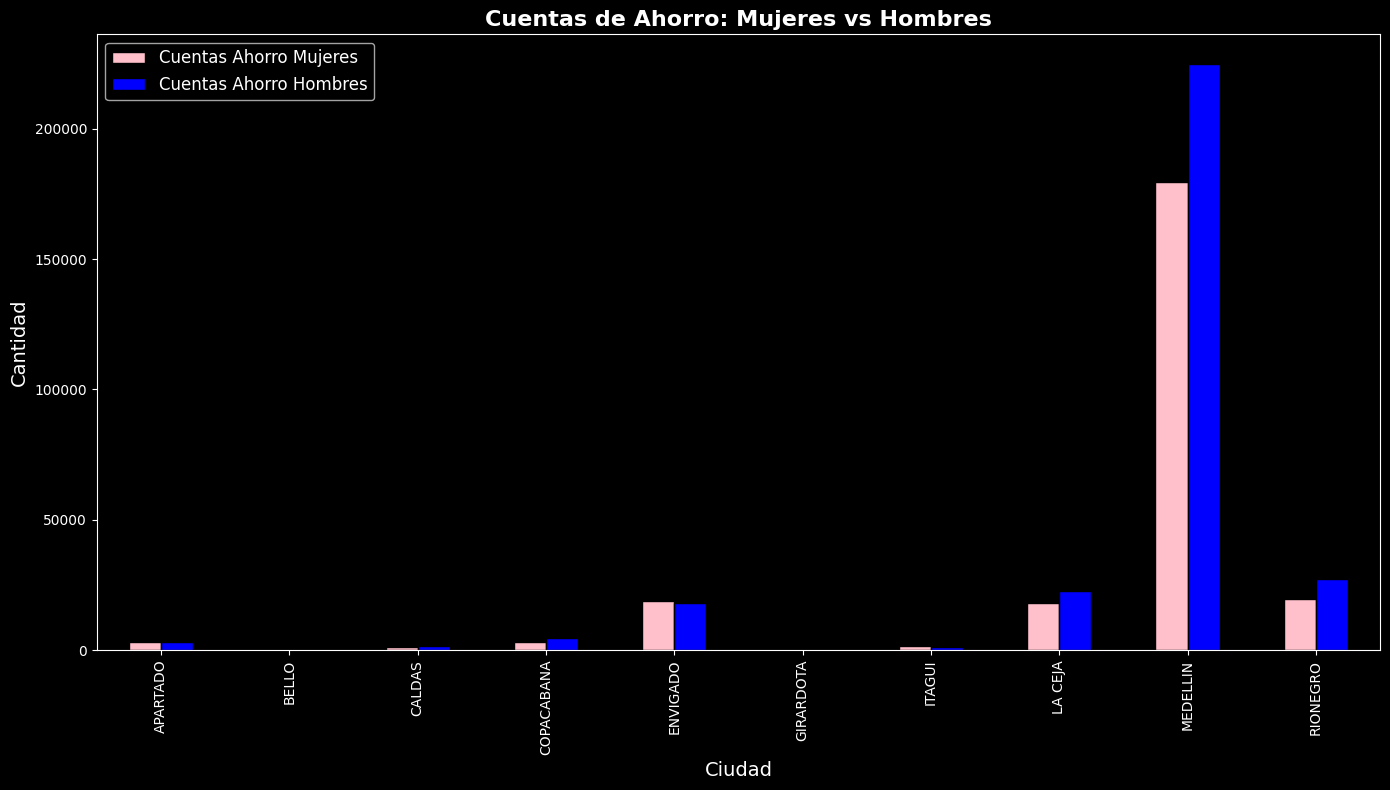

Resultados Gráfico 2:
    Ciudad  Cuentas Ahorro Mujeres  Cuentas Ahorro Hombres
  APARTADO                  3005.0                  3173.0
     BELLO                     0.0                     0.0
    CALDAS                  1096.0                  1383.0
COPACABANA                  2970.0                  4799.0
  ENVIGADO                 18967.0                 18040.0
 GIRARDOTA                     0.0                     0.0
    ITAGUI                  1426.0                  1202.0
   LA CEJA                 18013.0                 22646.0
  MEDELLIN                179519.0                225001.0
  RIONEGRO                 19690.0                 27311.0


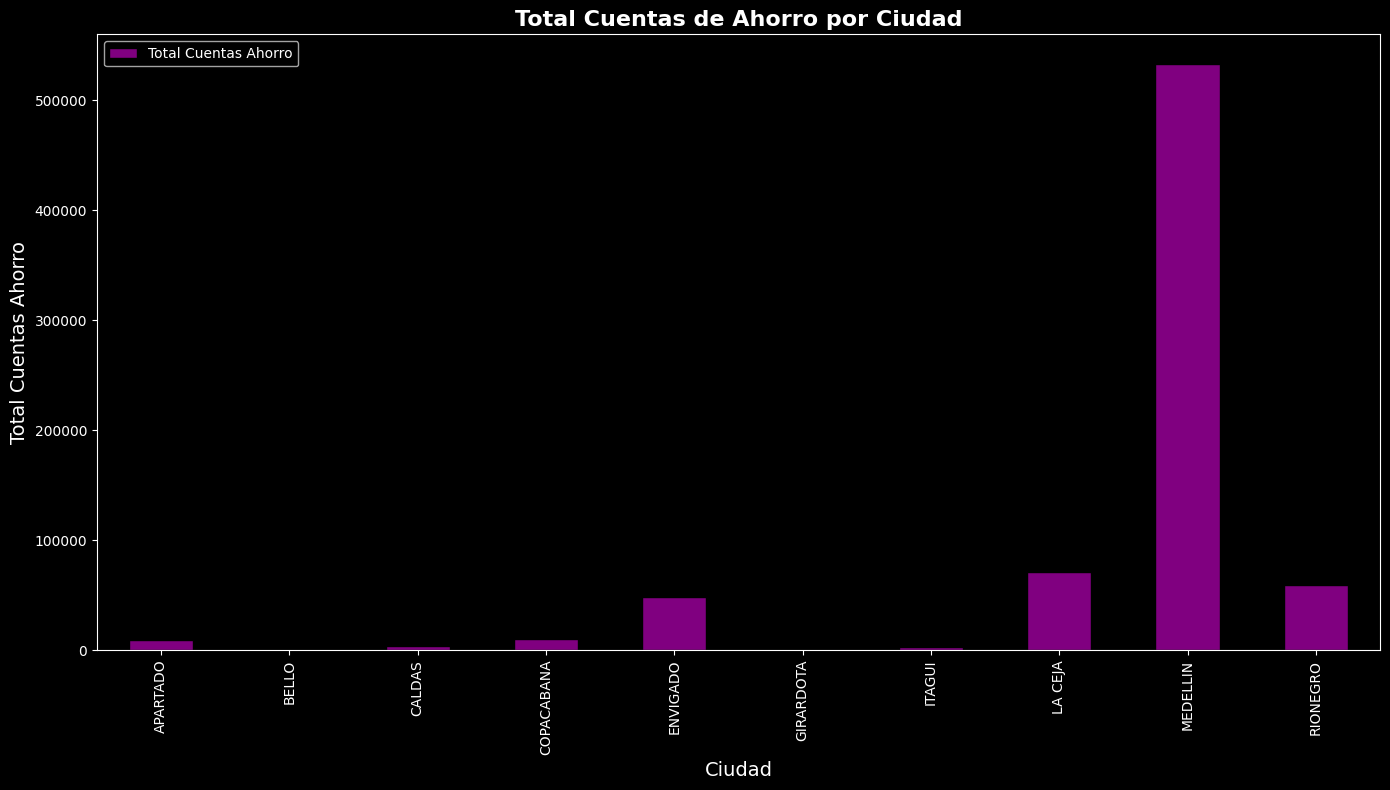

Resultados Totales:
    Ciudad  Total Cuentas Ahorro
  APARTADO                8819.0
     BELLO                   0.0
    CALDAS                4162.0
COPACABANA               10093.0
  ENVIGADO               48251.0
 GIRARDOTA                   0.0
    ITAGUI                3253.0
   LA CEJA               70941.0
  MEDELLIN              533249.0
  RIONEGRO               59558.0


In [71]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Crear la carpeta de salida si no existe
output_folder = "grafico_resultados"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# -------------------- CONFIGURAR DATOS -------------------- #
# Seleccionar las 10 ciudades más frecuentes excluyendo "TOTAL ANTIOQUIA"
top_cities = df_cards['desc_renglon'].value_counts().head(11).index  # Tomar las top 11 para luego excluir "TOTAL ANTIOQUIA"
top_cities = [city for city in top_cities if city != 'TOTAL ANTIOQUIA'][:10]  # Excluir TOTAL ANTIOQUIA y tomar solo 10

# Filtrar el DataFrame
df_filtered = df_cards[df_cards['desc_renglon'].isin(top_cities)]

# Seleccionar columnas necesarias y convertirlas a numéricas
columns_to_sum = ['_25_nro_ctas_ahorro_activas', '_24_saldo_ctas_ahorr_3smmlv', 
                  '_27_nro_ctas_ahorro_mujeres', '_29_nro_ctas_ahorro_hombres']
df_filtered[columns_to_sum] = df_filtered[columns_to_sum].apply(pd.to_numeric, errors='coerce').fillna(0)

# Agrupar por ciudad y calcular sumas
sum_data = df_filtered.groupby('desc_renglon')[columns_to_sum].sum().reset_index()
sum_data.rename(columns={'desc_renglon': 'Ciudad'}, inplace=True)

# Crear tablas de resultados
result_table_1 = sum_data[['Ciudad', '_25_nro_ctas_ahorro_activas', '_24_saldo_ctas_ahorr_3smmlv']]
result_table_1.columns = ['Ciudad', 'Cuentas Ahorro Activas', 'Saldo Cuentas Ahorro']

result_table_2 = sum_data[['Ciudad', '_27_nro_ctas_ahorro_mujeres', '_29_nro_ctas_ahorro_hombres']]
result_table_2.columns = ['Ciudad', 'Cuentas Ahorro Mujeres', 'Cuentas Ahorro Hombres']

result_table_total = sum_data[['Ciudad', '_25_nro_ctas_ahorro_activas', '_27_nro_ctas_ahorro_mujeres', '_29_nro_ctas_ahorro_hombres']]
result_table_total['Total Cuentas Ahorro'] = result_table_total['_25_nro_ctas_ahorro_activas'] + result_table_total['_27_nro_ctas_ahorro_mujeres'] + result_table_total['_29_nro_ctas_ahorro_hombres']
result_table_total = result_table_total[['Ciudad', 'Total Cuentas Ahorro']]

# -------------------- GRÁFICOS -------------------- #
# Función para guardar y mostrar gráficos
def save_and_show_plot(fig, filename):
    save_path = os.path.join(output_folder, filename)
    fig.savefig(save_path, format='png')
    plt.show()

# Gráfico 1: Cuentas Ahorro Activas vs Saldo Cuentas Ahorro
fig, ax = plt.subplots(figsize=(14, 8))
result_table_1.plot(x='Ciudad', y=['Cuentas Ahorro Activas', 'Saldo Cuentas Ahorro'], kind='bar',
                    color=['orange', 'lightgreen'], ax=ax, edgecolor='black')
ax.set_title('Total Cuentas de Ahorro Activas vs Saldo Cuentas Ahorro', fontsize=16, fontweight='bold')
ax.set_xlabel('Ciudad', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=14)
ax.legend(['Cuentas Ahorro Activas', 'Saldo Cuentas Ahorro'], fontsize=12)
plt.tight_layout()
save_and_show_plot(fig, "grafico_cuentas_ahorro_vs_saldo.png")

print("Resultados Gráfico 1:")
print(result_table_1.to_string(index=False))

# Gráfico 2: Cuentas de Ahorro Mujeres vs Hombres
fig, ax = plt.subplots(figsize=(14, 8))
result_table_2.plot(x='Ciudad', y=['Cuentas Ahorro Mujeres', 'Cuentas Ahorro Hombres'], kind='bar',
                    color=['pink', 'blue'], ax=ax, edgecolor='black')
ax.set_title('Cuentas de Ahorro: Mujeres vs Hombres', fontsize=16, fontweight='bold')
ax.set_xlabel('Ciudad', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=14)
ax.legend(['Cuentas Ahorro Mujeres', 'Cuentas Ahorro Hombres'], fontsize=12)
plt.tight_layout()
save_and_show_plot(fig, "grafico_cuentas_mujeres_vs_hombres.png")

print("Resultados Gráfico 2:")
print(result_table_2.to_string(index=False))

# Gráfico 3: Total Cuentas Ahorro
fig, ax = plt.subplots(figsize=(14, 8))
result_table_total.plot(x='Ciudad', y='Total Cuentas Ahorro', kind='bar', color='purple', ax=ax, edgecolor='black')
ax.set_title('Total Cuentas de Ahorro por Ciudad', fontsize=16, fontweight='bold')
ax.set_xlabel('Ciudad', fontsize=14)
ax.set_ylabel('Total Cuentas Ahorro', fontsize=14)
plt.tight_layout()
save_and_show_plot(fig, "grafico_total_cuentas_ahorro.png")

print("Resultados Totales:")
print(result_table_total.to_string(index=False))


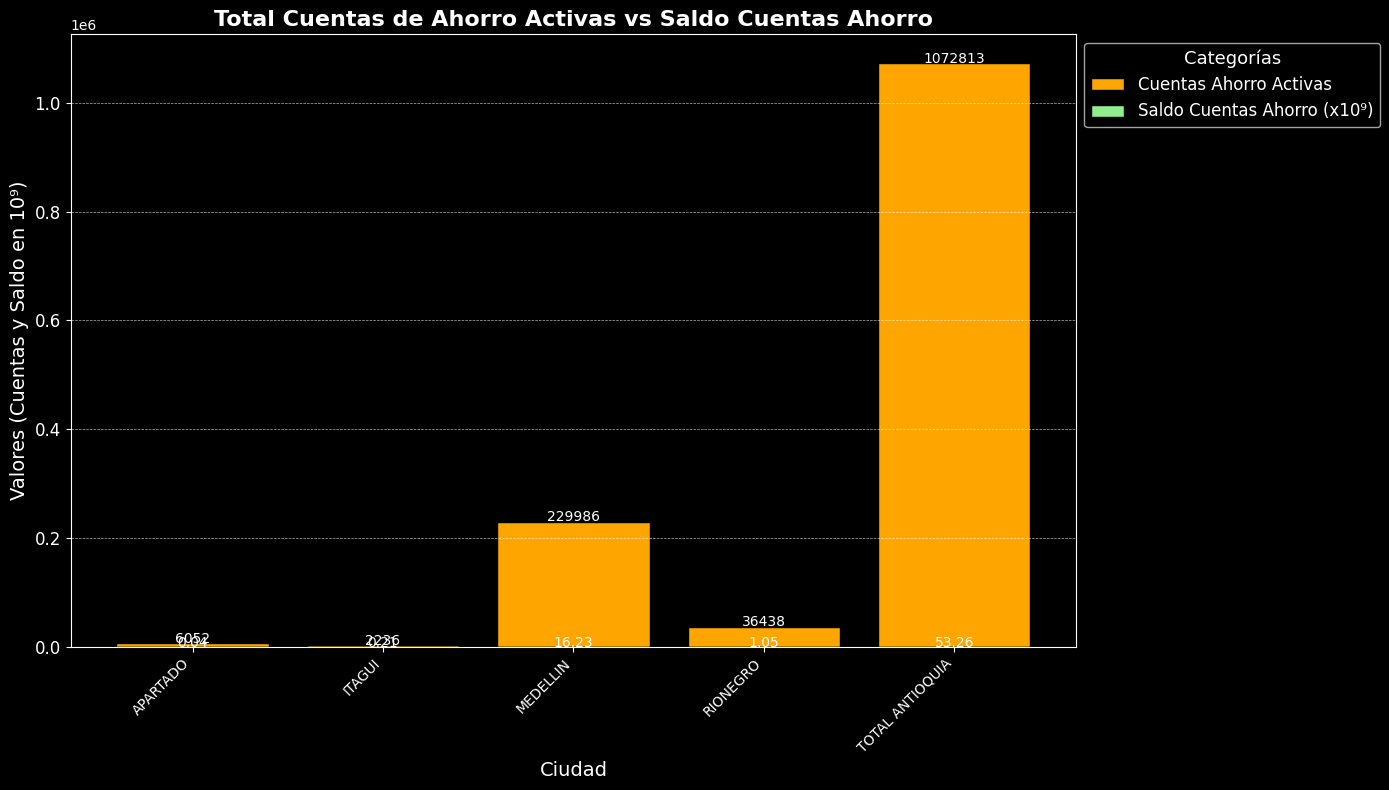

Resultados Gráfico 1:
            Ciudad  Cuentas Ahorro Activas  Saldo Cuentas Ahorro (x10⁹)
0         APARTADO                  6052.0                     0.044734
1           ITAGUI                  2236.0                     0.211813
2         MEDELLIN                229986.0                    16.229962
3         RIONEGRO                 36438.0                     1.045113
4  TOTAL ANTIOQUIA               1072813.0                    53.264922


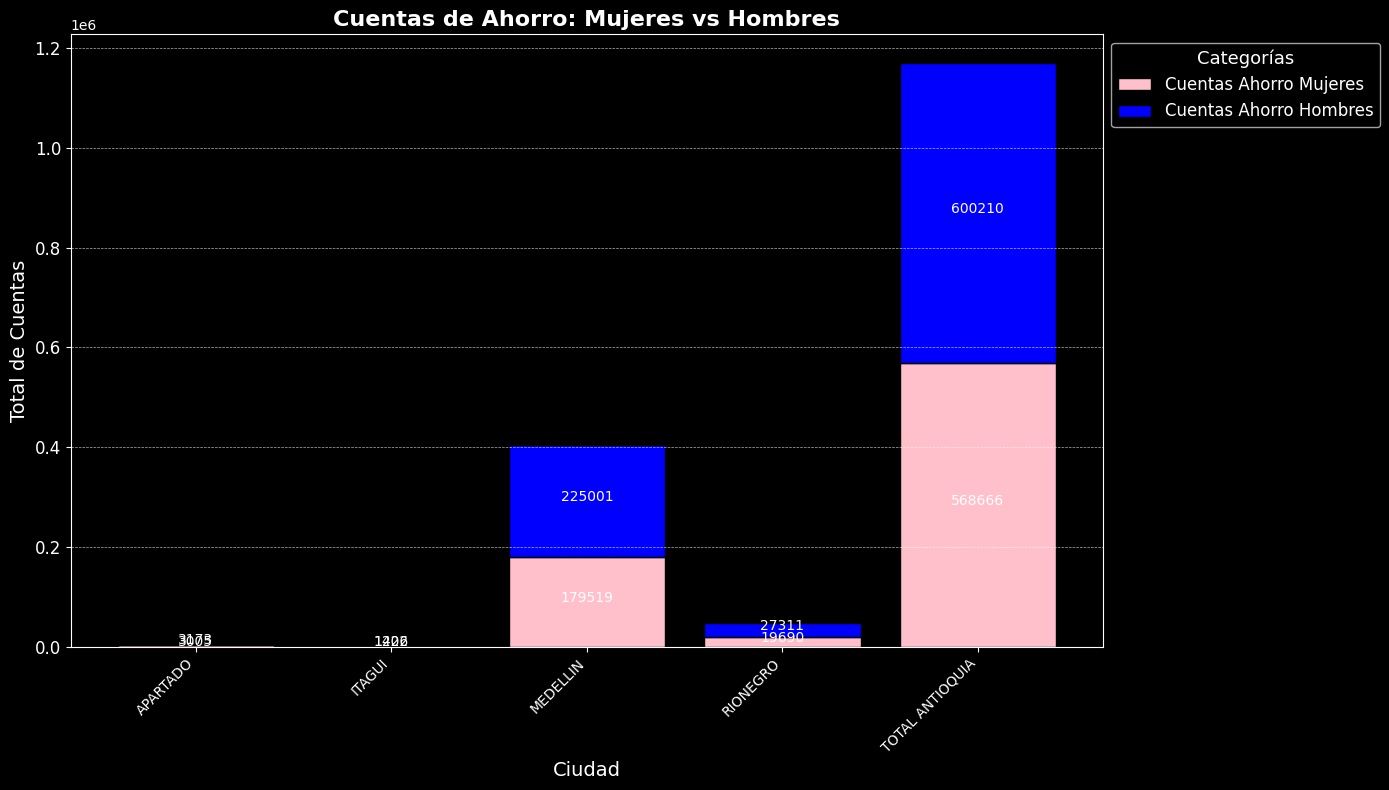

Resultados Gráfico 2:
            Ciudad  Cuentas Ahorro Mujeres  Cuentas Ahorro Hombres
0         APARTADO                  3005.0                  3173.0
1           ITAGUI                  1426.0                  1202.0
2         MEDELLIN                179519.0                225001.0
3         RIONEGRO                 19690.0                 27311.0
4  TOTAL ANTIOQUIA                568666.0                600210.0


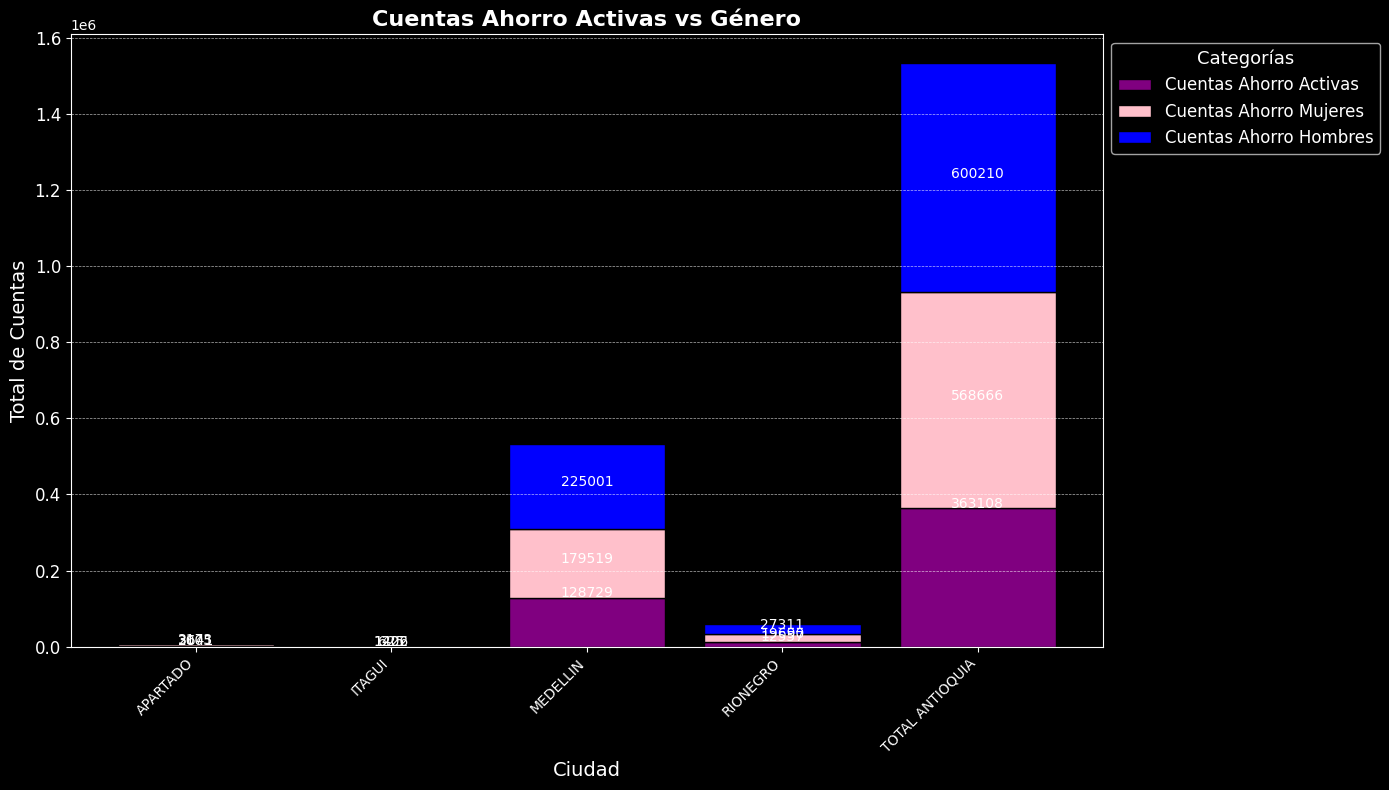

Resultados Gráfico 3:
            Ciudad  Cuentas Ahorro Activas  Cuentas Ahorro Mujeres  \
0         APARTADO                  2641.0                  3005.0   
1           ITAGUI                   625.0                  1426.0   
2         MEDELLIN                128729.0                179519.0   
3         RIONEGRO                 12557.0                 19690.0   
4  TOTAL ANTIOQUIA                363108.0                568666.0   

   Cuentas Ahorro Hombres  
0                  3173.0  
1                  1202.0  
2                225001.0  
3                 27311.0  
4                600210.0  


In [69]:


# Crear la carpeta de salida si no existe
output_folder = "grafico_resultados"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Suponemos que df_cards ya está definido
# Filtrar las 5 ciudades principales con base en desc_renglon
top_cities = df_cards['desc_renglon'].value_counts().head(5).index

# Filtrar el DataFrame original
df_filtered = df_cards[df_cards['desc_renglon'].isin(top_cities)]

# Agrupar por ciudad para calcular las métricas necesarias
data = df_filtered.groupby('desc_renglon').agg({
    '_19_nro_ctas_ahorro_hasta': 'sum',
    '_24_saldo_ctas_ahorr_3smmlv': 'sum',
    '_27_nro_ctas_ahorro_mujeres': 'sum',
    '_29_nro_ctas_ahorro_hombres': 'sum',
    '_25_nro_ctas_ahorro_activas': 'sum'
}).reset_index()
data.rename(columns={'desc_renglon': 'Ciudad'}, inplace=True)

def save_and_show_plot(fig, filename):
    save_path = os.path.join(output_folder, filename)
    fig.savefig(save_path, format='png')
    plt.show()

# Gráfico 1: Total Cuentas de Ahorro Activas vs Saldo Cuentas Ahorro
plt.figure(figsize=(14, 8))
bar1 = plt.bar(data['Ciudad'], data['_19_nro_ctas_ahorro_hasta'], color='orange', label='Cuentas Ahorro Activas', edgecolor='black')
bar2 = plt.bar(data['Ciudad'], data['_24_saldo_ctas_ahorr_3smmlv'] / 1e9, color='lightgreen', label='Saldo Cuentas Ahorro (x10⁹)', edgecolor='black')

# Estilo profesional
plt.title("Total Cuentas de Ahorro Activas vs Saldo Cuentas Ahorro", fontsize=16, fontweight='bold')
plt.xlabel("Ciudad", fontsize=14)
plt.ylabel("Valores (Cuentas y Saldo en 10⁹)", fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12, title="Categorías", title_fontsize=13, loc='upper left', bbox_to_anchor=(1, 1))

# Añadir valores a las barras
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 1000, f'{int(height)}', ha='center', fontsize=10)

for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0.05, f'{height:.2f}', ha='center', fontsize=10)

plt.tight_layout()
save_and_show_plot(plt.gcf(), "grafico_cuentas_ahorro_vs_saldo.png")

# Crear un DataFrame de resultados para Gráfico 1
result_table_1 = pd.DataFrame({
    "Ciudad": data['Ciudad'],
    "Cuentas Ahorro Activas": data['_19_nro_ctas_ahorro_hasta'],
    "Saldo Cuentas Ahorro (x10⁹)": data['_24_saldo_ctas_ahorr_3smmlv'] / 1e9
})

# Mostrar resultados
print("Resultados Gráfico 1:")
print(result_table_1)

# Gráfico 2: Cuentas de Ahorro Mujeres vs Hombres
plt.figure(figsize=(14, 8))
bar3 = plt.bar(data['Ciudad'], data['_27_nro_ctas_ahorro_mujeres'], color='pink', label='Cuentas Ahorro Mujeres', edgecolor='black')
bar4 = plt.bar(data['Ciudad'], data['_29_nro_ctas_ahorro_hombres'], bottom=data['_27_nro_ctas_ahorro_mujeres'], color='blue', label='Cuentas Ahorro Hombres', edgecolor='black')

# Estilo profesional
plt.title("Cuentas de Ahorro: Mujeres vs Hombres", fontsize=16, fontweight='bold')
plt.xlabel("Ciudad", fontsize=14)
plt.ylabel("Total de Cuentas", fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12, title="Categorías", title_fontsize=13, loc='upper left', bbox_to_anchor=(1, 1))

# Añadir valores a las barras
for rect in bar3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height / 2, f'{int(height)}', ha='center', fontsize=10)

for rect, bottom in zip(bar4, data['_27_nro_ctas_ahorro_mujeres']):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, bottom + height / 2, f'{int(height)}', ha='center', fontsize=10)

plt.tight_layout()
save_and_show_plot(plt.gcf(), "grafico_cuentas_mujeres_vs_hombres.png")

# Crear un DataFrame de resultados para Gráfico 2
result_table_2 = pd.DataFrame({
    "Ciudad": data['Ciudad'],
    "Cuentas Ahorro Mujeres": data['_27_nro_ctas_ahorro_mujeres'],
    "Cuentas Ahorro Hombres": data['_29_nro_ctas_ahorro_hombres']
})

# Mostrar resultados
print("Resultados Gráfico 2:")
print(result_table_2)

# Gráfico 3: Cuentas Ahorro Activas vs Género
plt.figure(figsize=(14, 8))
bar5 = plt.bar(data['Ciudad'], data['_25_nro_ctas_ahorro_activas'], color='purple', label='Cuentas Ahorro Activas', edgecolor='black')
bar6 = plt.bar(data['Ciudad'], data['_27_nro_ctas_ahorro_mujeres'], bottom=data['_25_nro_ctas_ahorro_activas'], color='pink', label='Cuentas Ahorro Mujeres', edgecolor='black')
bar7 = plt.bar(data['Ciudad'], data['_29_nro_ctas_ahorro_hombres'], bottom=data['_25_nro_ctas_ahorro_activas'] + data['_27_nro_ctas_ahorro_mujeres'], color='blue', label='Cuentas Ahorro Hombres', edgecolor='black')

# Estilo profesional
plt.title("Cuentas Ahorro Activas vs Género", fontsize=16, fontweight='bold')
plt.xlabel("Ciudad", fontsize=14)
plt.ylabel("Total de Cuentas", fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12, title="Categorías", title_fontsize=13, loc='upper left', bbox_to_anchor=(1, 1))

# Añadir valores a las barras
for rect in bar5:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 1000, f'{int(height)}', ha='center', fontsize=10)

for rect, bottom in zip(bar6, data['_25_nro_ctas_ahorro_activas']):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, bottom + height / 2, f'{int(height)}', ha='center', fontsize=10)

for rect, bottom in zip(bar7, data['_25_nro_ctas_ahorro_activas'] + data['_27_nro_ctas_ahorro_mujeres']):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, bottom + height / 2, f'{int(height)}', ha='center', fontsize=10)

plt.tight_layout()
save_and_show_plot(plt.gcf(), "grafico_cuentas_activas_vs_genero.png")

# Crear un DataFrame de resultados para Gráfico 3
result_table_3 = pd.DataFrame({
    "Ciudad": data['Ciudad'],
    "Cuentas Ahorro Activas": data['_25_nro_ctas_ahorro_activas'],
    "Cuentas Ahorro Mujeres": data['_27_nro_ctas_ahorro_mujeres'],
    "Cuentas Ahorro Hombres": data['_29_nro_ctas_ahorro_hombres']
})

# Mostrar resultados
print("Resultados Gráfico 3:")
print(result_table_3)


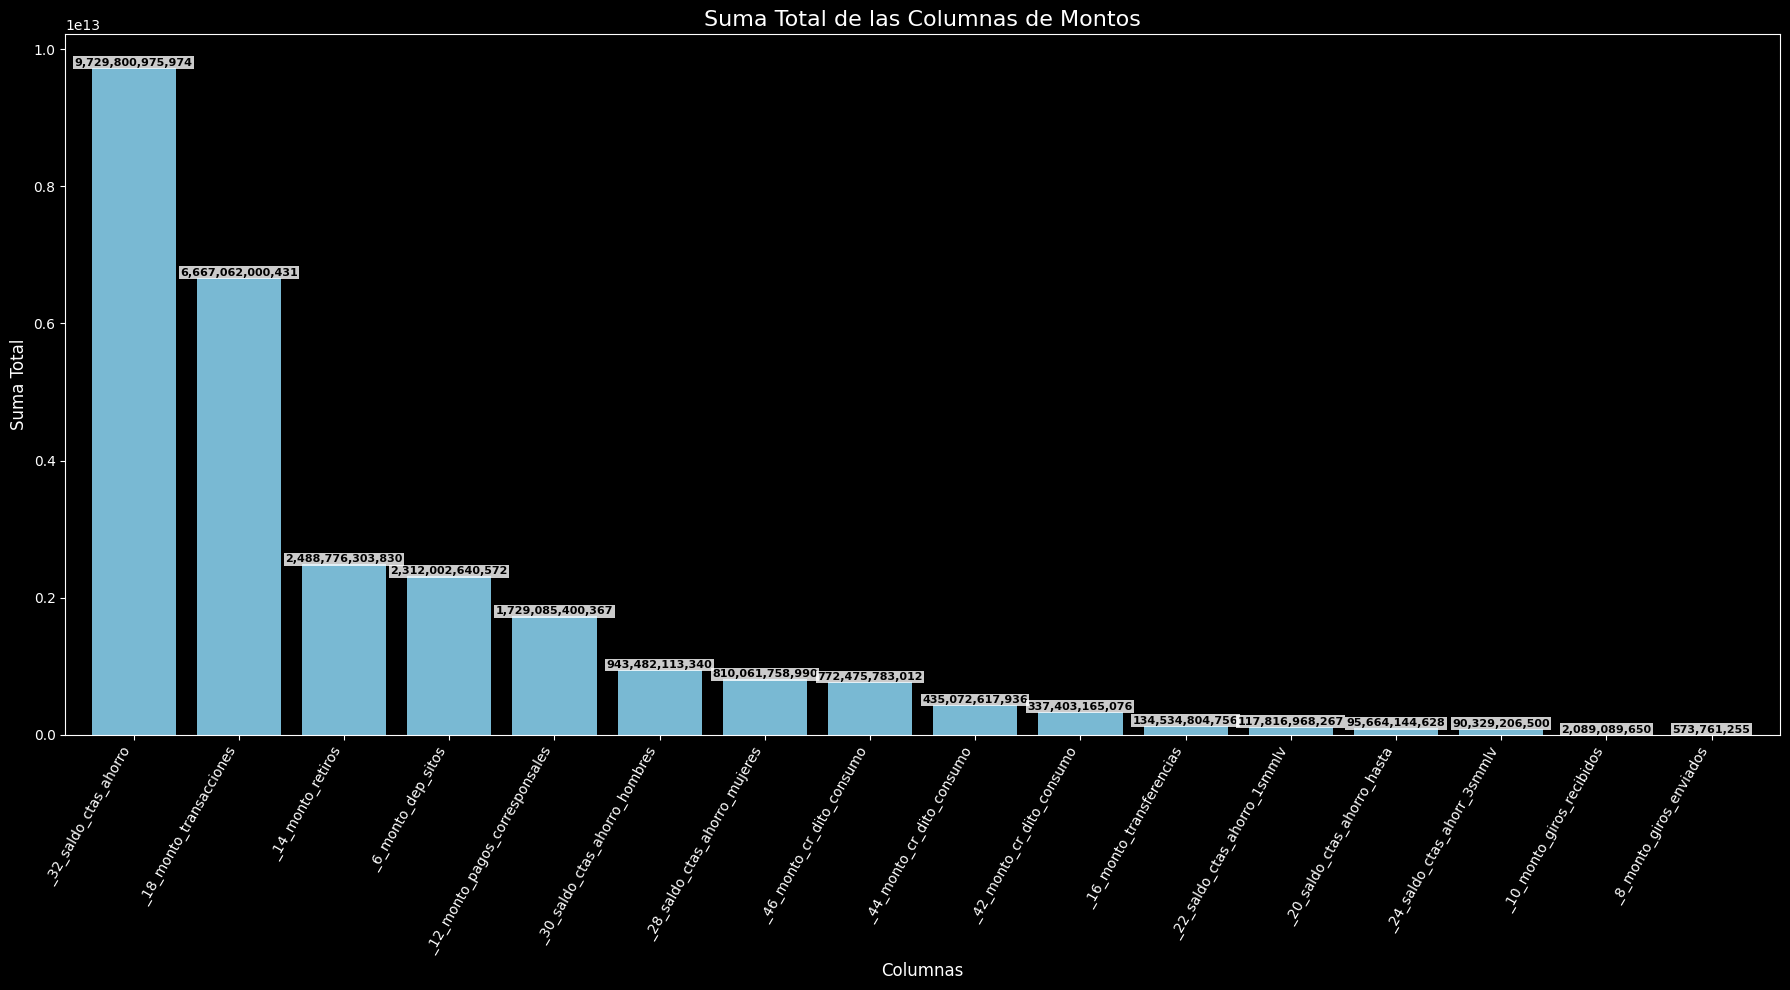

Suma Total de las Columnas de Montos:
_32_saldo_ctas_ahorro             9.729801e+12
_18_monto_transacciones           6.667062e+12
_14_monto_retiros                 2.488776e+12
_6_monto_dep_sitos                2.312003e+12
_12_monto_pagos_corresponsales    1.729085e+12
_30_saldo_ctas_ahorro_hombres     9.434821e+11
_28_saldo_ctas_ahorro_mujeres     8.100618e+11
_46_monto_cr_dito_consumo         7.724758e+11
_44_monto_cr_dito_consumo         4.350726e+11
_42_monto_cr_dito_consumo         3.374032e+11
_16_monto_transferencias          1.345348e+11
_22_saldo_ctas_ahorro_1smmlv      1.178170e+11
_20_saldo_ctas_ahorro_hasta       9.566414e+10
_24_saldo_ctas_ahorr_3smmlv       9.032921e+10
_10_monto_giros_recibidos         2.089090e+09
_8_monto_giros_enviados           5.737613e+08
dtype: float64


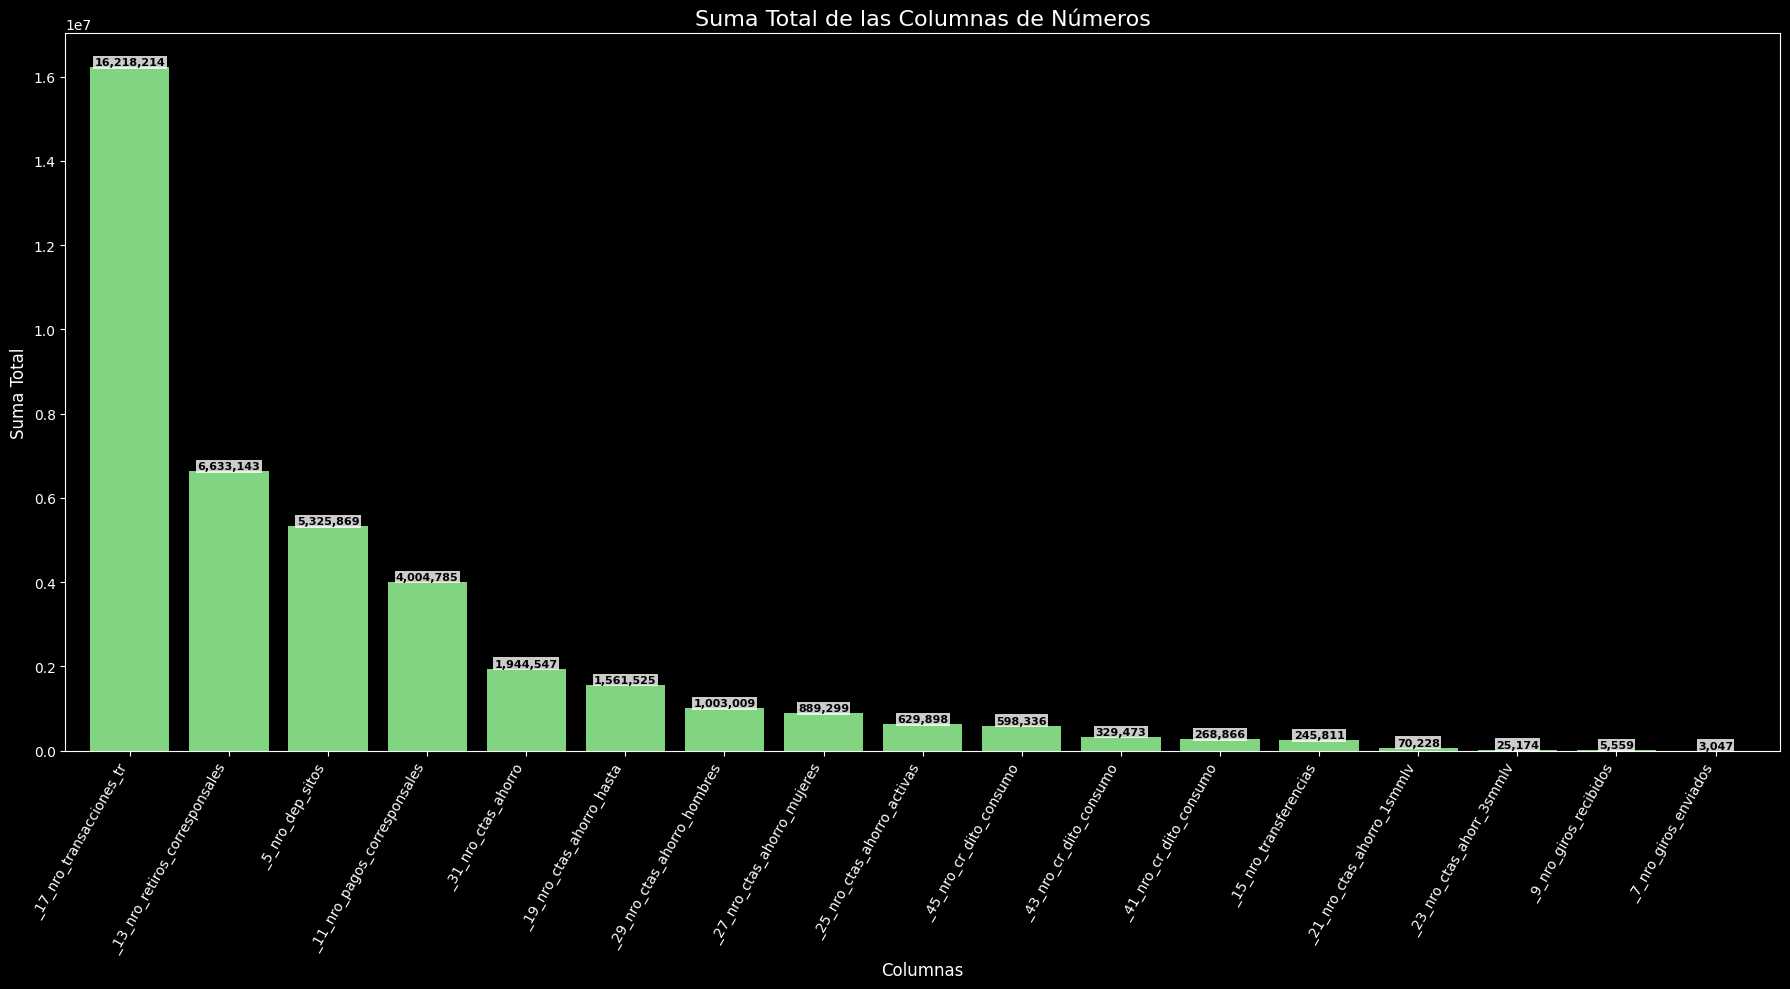

Suma Total de las Columnas de Números:
_17_nro_transacciones_tr          16218214.0
_13_nro_retiros_corresponsales     6633143.0
_5_nro_dep_sitos                   5325869.0
_11_nro_pagos_corresponsales       4004785.0
_31_nro_ctas_ahorro                1944547.0
_19_nro_ctas_ahorro_hasta          1561525.0
_29_nro_ctas_ahorro_hombres        1003009.0
_27_nro_ctas_ahorro_mujeres         889299.0
_25_nro_ctas_ahorro_activas         629898.0
_45_nro_cr_dito_consumo             598336.0
_43_nro_cr_dito_consumo             329473.0
_41_nro_cr_dito_consumo             268866.0
_15_nro_transferencias              245811.0
_21_nro_ctas_ahorro_1smmlv           70228.0
_23_nro_ctas_ahorr_3smmlv            25174.0
_9_nro_giros_recibidos                5559.0
_7_nro_giros_enviados                 3047.0
dtype: float64


In [62]:


# Crear la carpeta de salida si no existe
output_folder = "grafico_resultados"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Listas de columnas para montos y números
columns_monto = [
    '_6_monto_dep_sitos', '_8_monto_giros_enviados', '_10_monto_giros_recibidos',
    '_12_monto_pagos_corresponsales', '_14_monto_retiros', '_16_monto_transferencias',
    '_18_monto_transacciones', '_20_saldo_ctas_ahorro_hasta', '_22_saldo_ctas_ahorro_1smmlv',
    '_24_saldo_ctas_ahorr_3smmlv', '_28_saldo_ctas_ahorro_mujeres', '_30_saldo_ctas_ahorro_hombres',
    '_32_saldo_ctas_ahorro', '_42_monto_cr_dito_consumo', '_44_monto_cr_dito_consumo',
    '_46_monto_cr_dito_consumo'
]

columns_nro = [
    '_5_nro_dep_sitos', '_7_nro_giros_enviados', '_9_nro_giros_recibidos',
    '_11_nro_pagos_corresponsales', '_13_nro_retiros_corresponsales', '_15_nro_transferencias',
    '_17_nro_transacciones_tr', '_19_nro_ctas_ahorro_hasta', '_21_nro_ctas_ahorro_1smmlv',
    '_23_nro_ctas_ahorr_3smmlv', '_25_nro_ctas_ahorro_activas', '_27_nro_ctas_ahorro_mujeres',
    '_29_nro_ctas_ahorro_hombres', '_31_nro_ctas_ahorro', '_41_nro_cr_dito_consumo',
    '_43_nro_cr_dito_consumo', '_45_nro_cr_dito_consumo'
]

# Convertir las columnas a numéricas si no lo son
for col in columns_monto + columns_nro:
    if col in df_cards.columns:
        df_cards[col] = pd.to_numeric(df_cards[col], errors='coerce').fillna(0)

# Calcular la suma total de las columnas para cada categoría
monto_totals = df_cards[columns_monto].sum()
nro_totals = df_cards[columns_nro].sum()

# Función para agregar valores totales al gráfico
def add_labels(ax, totals):
    for i, total in enumerate(totals):
        if total > 0:  # Agregar solo valores mayores a 0
            ax.text(
                i, total, f"{total:,.0f}",
                ha='center', va='bottom', fontsize=8, color='black', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1)
            )

# Función para guardar y mostrar gráficos
def save_and_show_plot(fig, filename):
    save_path = os.path.join(output_folder, filename)
    fig.savefig(save_path, format='png')
    plt.show()

# Gráfico de montos
fig, ax = plt.subplots(figsize=(18, 10))
monto_totals.sort_values(ascending=False).plot(
    kind='bar', color='skyblue', alpha=0.9, ax=ax, width=0.8
)
add_labels(ax, monto_totals.sort_values(ascending=False))

# Ajustes del gráfico
ax.set_title("Suma Total de las Columnas de Montos", fontsize=16)
ax.set_xlabel("Columnas", fontsize=12)
ax.set_ylabel("Suma Total", fontsize=12)
ax.set_xticklabels(
    monto_totals.sort_values(ascending=False).index, rotation=60, ha='right', fontsize=10
)
plt.tight_layout()
save_and_show_plot(fig, "grafico_montos_totales.png")

# Imprimir resultados
print("Suma Total de las Columnas de Montos:")
print(monto_totals.sort_values(ascending=False))

# Gráfico de números
fig, ax = plt.subplots(figsize=(18, 10))
nro_totals.sort_values(ascending=False).plot(
    kind='bar', color='lightgreen', alpha=0.9, ax=ax, width=0.8
)
add_labels(ax, nro_totals.sort_values(ascending=False))

# Ajustes del gráfico
ax.set_title("Suma Total de las Columnas de Números", fontsize=16)
ax.set_xlabel("Columnas", fontsize=12)
ax.set_ylabel("Suma Total", fontsize=12)
ax.set_xticklabels(
    nro_totals.sort_values(ascending=False).index, rotation=60, ha='right', fontsize=10
)
plt.tight_layout()
save_and_show_plot(fig, "grafico_numeros_totales.png")

# Imprimir resultados
print("Suma Total de las Columnas de Números:")
print(nro_totals.sort_values(ascending=False))
